# Similar User Grouping

In [1]:
from Funcs.Utility import *
PATH_SAVE = '/var/nfs_share/Stress_Detection_D-1/Intermediate/Multi_task/'

In [3]:
LABELS_PROC = pd.read_csv(os.path.join(PATH_INTERMEDIATE, 'proc','LABELS_PROC.csv'), index_col=['pcode','timestamp'],parse_dates=True)
PARTICIPANTS = pd.read_csv(os.path.join(PATH_INTERMEDIATE, 'proc', 'PARTICIPANT_INFO.csv'),index_col = 'pcode')

In [4]:
PINFO = PARTICIPANTS.assign(
    BFI_OPN=lambda x: x['openness'],
    BFI_CON=lambda x: x['conscientiousness'],
    BFI_NEU=lambda x: x['neuroticism'],
    BFI_EXT=lambda x: x['extraversion'],
    BFI_AGR=lambda x: x['agreeableness'],
)[[
    'BFI_OPN', 'BFI_CON', 'BFI_NEU', 'BFI_EXT', 'BFI_AGR'
]]
PINFO = pd.get_dummies(PINFO, prefix_sep='=', dtype=bool)

In [5]:
list_pid = set(LABELS_PROC.index.get_level_values('pcode').values)
PINFO_valid = PINFO.loc[PINFO.index.isin(list_pid)]

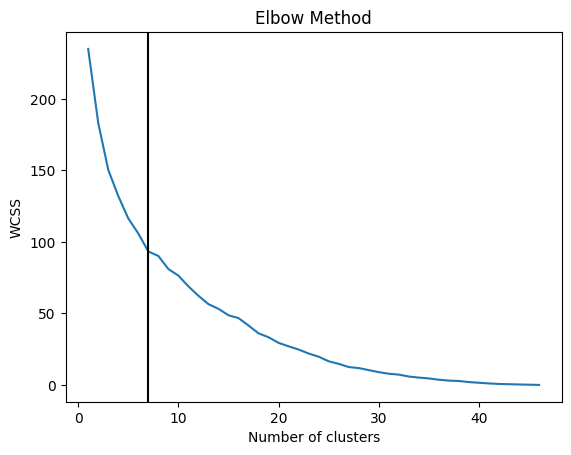

In [5]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt

df = PINFO_valid
# assuming df is your DataFrame and it only contains numerical columns
# standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# determine the optimal number of clusters
wcss = []
for i in range(1, 47):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 47), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.axvline(x=7, color = 'black')
plt.show()

/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppre

For n_clusters = 2 The average silhouette_score is: 0.20007904072507748
For n_clusters = 3 The average silhouette_score is: 0.18207688081116147
For n_clusters = 4 The average silhouette_score is: 0.15230324951691143
For n_clusters = 5 The average silhouette_score is: 0.17109878790989194
For n_clusters = 6 The average silhouette_score is: 0.18893184685514983
For n_clusters = 7 The average silhouette_score is: 0.20406461319873104
For n_clusters = 8 The average silhouette_score is: 0.16191109929810843
For n_clusters = 9 The average silhouette_score is: 0.1929668290704
For n_clusters = 10 The average silhouette_score is: 0.16109991955720734
For n_clusters = 11 The average silhouette_score is: 0.18927646010920737
For n_clusters = 12 The average silhouette_score is: 0.18857895707120223
For n_clusters = 13 The average silhouette_score is: 0.16549672580229413
For n_clusters = 14 The average silhouette_score is: 0.19326360018718633
For n_clusters = 15 The average silhouette_score is: 0.17920576

/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppre

For n_clusters = 21 The average silhouette_score is: 0.19892567641047718
For n_clusters = 22 The average silhouette_score is: 0.22485020117636964
For n_clusters = 23 The average silhouette_score is: 0.2333983260813784
For n_clusters = 24 The average silhouette_score is: 0.23605202482534546
For n_clusters = 25 The average silhouette_score is: 0.24658161715415056
For n_clusters = 26 The average silhouette_score is: 0.23277984983717195
For n_clusters = 27 The average silhouette_score is: 0.21755160830971207
For n_clusters = 28 The average silhouette_score is: 0.20735486014379834
For n_clusters = 29 The average silhouette_score is: 0.21501603893671792
For n_clusters = 30 The average silhouette_score is: 0.19992372620188342
For n_clusters = 31 The average silhouette_score is: 0.19604411935684823


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppre

For n_clusters = 32 The average silhouette_score is: 0.18104972293541008
For n_clusters = 33 The average silhouette_score is: 0.19842576897700087
For n_clusters = 34 The average silhouette_score is: 0.18990969706131744
For n_clusters = 35 The average silhouette_score is: 0.19386493934513416
For n_clusters = 36 The average silhouette_score is: 0.17200601945439875
For n_clusters = 37 The average silhouette_score is: 0.17361608097121287
For n_clusters = 38 The average silhouette_score is: 0.16495891569461438
For n_clusters = 39 The average silhouette_score is: 0.14808102591361536


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppre

For n_clusters = 40 The average silhouette_score is: 0.14285922326571168
For n_clusters = 41 The average silhouette_score is: 0.13561574161437723
For n_clusters = 42 The average silhouette_score is: 0.11773806178919842
For n_clusters = 43 The average silhouette_score is: 0.10121478373885218
For n_clusters = 44 The average silhouette_score is: 0.08014847997536938
For n_clusters = 45 The average silhouette_score is: 0.06342951088098067
For n_clusters = 46 The average silhouette_score is: 0.0425531914893617


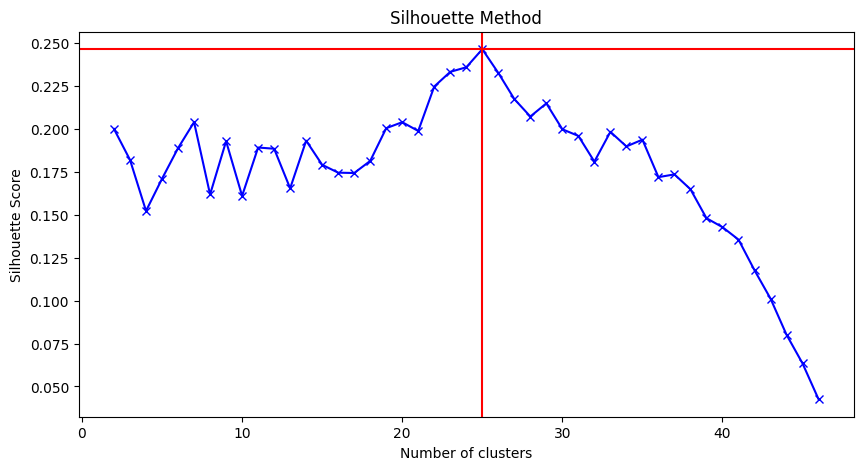

In [6]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

silhouette_scores = [] # holds the silhouette scores for each k
range_n_clusters = list(range(2, 47))

maxi = 0
p_num = 0
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(df_scaled)
    
    silhouette_avg = silhouette_score(df_scaled, preds)
    silhouette_scores.append(silhouette_avg)
    print("For n_clusters =", n_clusters, "The average silhouette_score is:", silhouette_avg)
    if silhouette_avg >= maxi:
        maxi = silhouette_avg
        p_num = n_clusters

# Plot
plt.figure(figsize=(10, 5))
plt.plot(range_n_clusters, silhouette_scores, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')
plt.axhline(y=maxi, color='r')
plt.axvline(x=p_num, color='r')
plt.show()

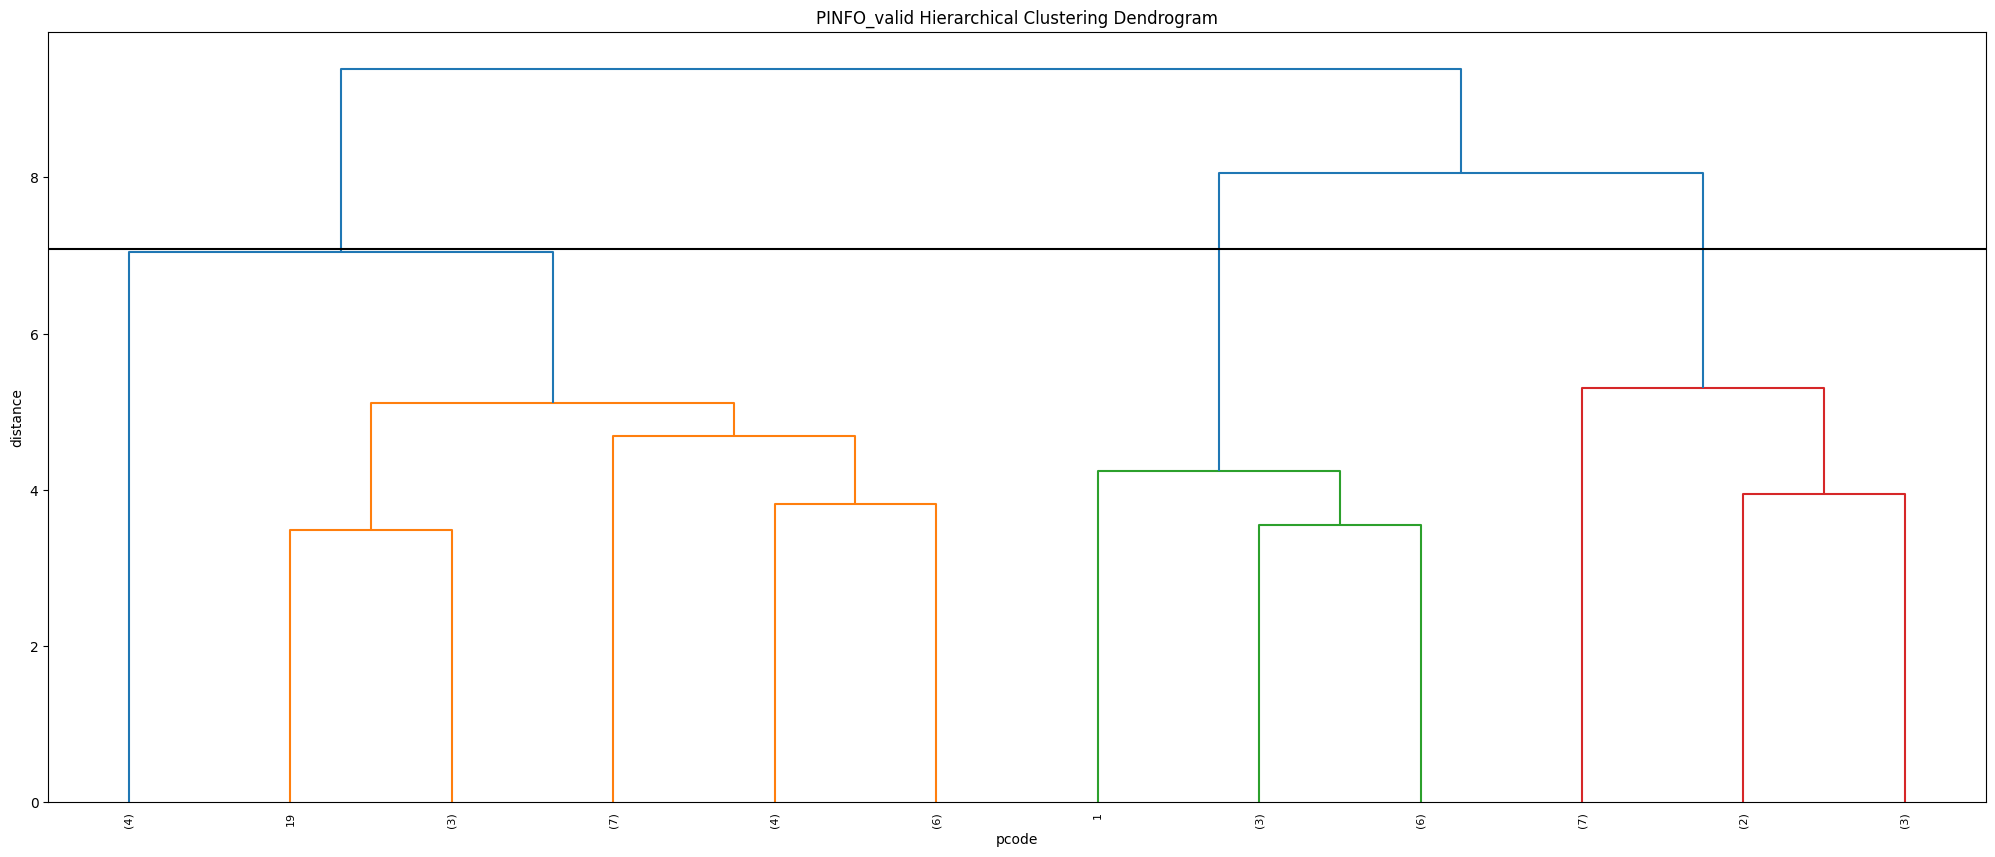

In [7]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

# generate the linkage matrix
Z = linkage(df_scaled, 'ward')

# set cut-off to 150, max_d as in max_distance
max_d = 7.08                # max_d as in max_distance

plt.figure(figsize=(25, 10))
plt.title('PINFO_valid Hierarchical Clustering Dendrogram')
plt.xlabel('pcode')
plt.ylabel('distance')

dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,                   # show only the last p merged clusters
    leaf_rotation=90.,      # rotates the x axis labels
    leaf_font_size=8.,      # font size for the x axis labels
)
plt.axhline(y=max_d, c='k')
plt.show()

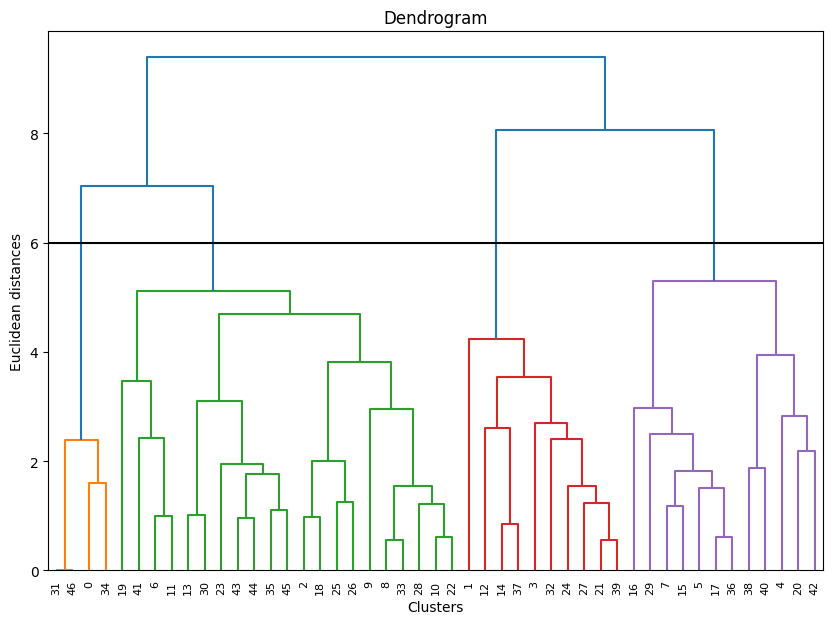

In [8]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(df_scaled, 'ward')

plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title('Dendrogram')
plt.xlabel('Clusters')
plt.ylabel('Euclidean distances')
plt.axhline(y=6, c='k')
plt.show()

In [9]:
import scipy
import scipy.cluster.vq
import scipy.spatial.distance
import numpy as np

dst = scipy.spatial.distance.euclidean

def gap(data, refs=None, nrefs=20, ks=range(1,11)):
    """
    Compute the Gap statistic for an nxm dataset in data.
    Either give a precomputed set of reference distributions in refs as an (n,m,k) scipy array,
    or state the number k of reference distributions in nrefs for automatic generation with a
    uniformed distribution within the bounding box of data.
    Give the list of k-values for which you want to compute the statistic in ks.
    """
    shape = data.shape
    if refs==None:
        tops = data.max(axis=0)
        bots = data.min(axis=0)
        dists = scipy.matrix(scipy.diag(tops-bots))

        rands = np.random.random_sample(size=(shape[0],shape[1],nrefs))
        for i in range(nrefs):
            rands[:,:,i] = rands[:,:,i]*dists+bots
    else:
        rands = refs

    gaps = np.zeros((len(ks),))
    for (i,k) in enumerate(ks):
        (kmc,kml) = scipy.cluster.vq.kmeans2(data, k)
        disp = sum([dst(data[m,:],kmc[kml[m],:]) for m in range(shape[0])])

        refdisps = np.zeros((rands.shape[2],))
        for j in range(rands.shape[2]):
            (kmc,kml) = scipy.cluster.vq.kmeans2(rands[:,:,j], k)
            refdisps[j] = sum([dst(rands[m,:,j],kmc[kml[m],:]) for m in range(shape[0])])
        gaps[i] = np.log(np.mean(refdisps))-np.log(disp)
    return gaps

/tmp/ipykernel_549828/2613602973.py:20: DeprecationWarning: scipy.diag is deprecated and will be removed in SciPy 2.0.0, use numpy.diag instead
  dists = scipy.matrix(scipy.diag(tops-bots))
/home/panyu/.conda/envs/sci-data/lib/python3.9/site-packages/scipy/cluster/vq.py:602: UserWarning: One of the clusters is empty. Re-run kmeans with a different initialization.
  warnings.warn("One of the clusters is empty. "


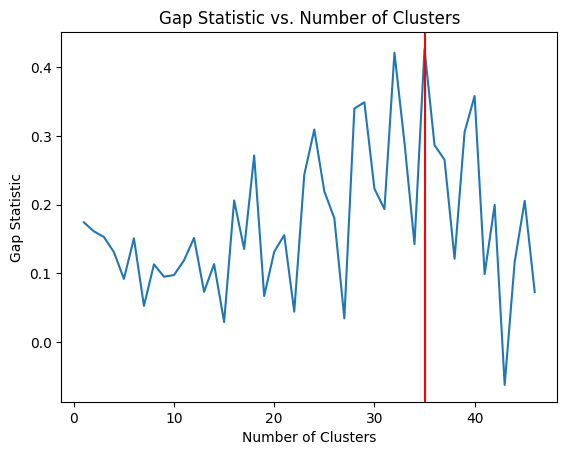

Optimal number of clusters according to Gap statistic: 35


In [10]:
gaps = gap(df_scaled, ks=range(1,47))
plt.plot(range(1,47), gaps)
plt.ylabel("Gap Statistic")
plt.xlabel("Number of Clusters")
plt.title("Gap Statistic vs. Number of Clusters")
plt.axvline(x=np.argmax(gaps) + 1, color='r')
plt.show()
optimal_k = np.argmax(gaps) + 1
print("Optimal number of clusters according to Gap statistic:", optimal_k)

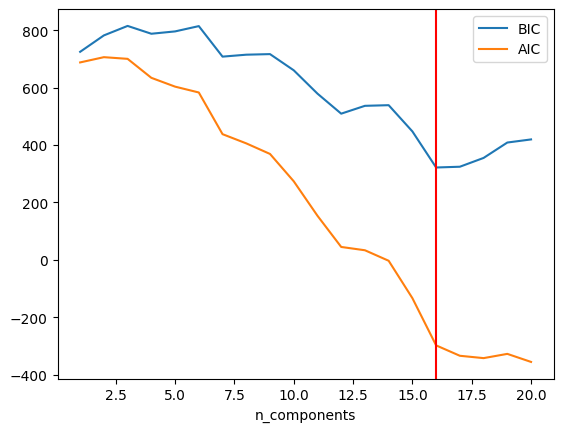

In [11]:
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import numpy as np

n_components = np.arange(1, 21)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(df_scaled)
          for n in n_components]

plt.plot(n_components, [m.bic(df_scaled) for m in models], label='BIC')
plt.plot(n_components, [m.aic(df_scaled) for m in models], label='AIC')
plt.legend(loc='best')
plt.axvline(16, color='r')
plt.xlabel('n_components');

Optimal Number of Clusters via all methods:

Elbow: 7 Silhoutte Score: 2 Hierarchical Clustering (Dendrogram): 4 Gap Statistics : 39 AIC and BIC from GMM: 16

In [6]:
#add the optimal numbe rof clusters determined through the above methods
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
# kmeans = KMeans(n_clusters=5,init='k-means++', max_iter=300, n_init=10, random_state=60)
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10)
pred_y = kmeans.fit_predict(df_scaled)

NameError: name 'df_scaled' is not defined

In [7]:
df['cluster'] = pred_y

NameError: name 'pred_y' is not defined

In [9]:
df.to_csv(os.path.join(PATH_INTERMEDIATE,  'similar_user_5.csv'))

# Data Splitting

In [8]:
p = os.path.join(PATH_INTERMEDIATE, 'feat', 'stress-fixed.pkl')
X, y, groups, t, datetimes = load(p)
similar_user = pd.read_csv(os.path.join(PATH_INTERMEDIATE,  'similar_user_5.csv'))

In [9]:
#Divide the features into different categories
feat_current = X.loc[:,[('#VAL' in str(x)) or ('ESM#LastLabel' in str(x)) for x in X.keys()]]  
feat_dsc = X.loc[:,[('#DSC' in str(x))  for x in X.keys()]]  
feat_yesterday = X.loc[:,[('Yesterday' in str(x))  for x in X.keys()]]  
feat_today = X.loc[:,[('Today' in str(x))  for x in X.keys()]]  
feat_sleep = X.loc[:,[('Sleep' in str(x))  for x in X.keys()]]  
feat_time = X.loc[:,[('Time' in str(x))  for x in X.keys()]]  
feat_pif = X.loc[:,[('PIF' in str(x))  for x in X.keys()]]  
feat_ImmediatePast = X.loc[:,[('ImmediatePast_15' in str(x))  for x in X.keys()]]
#Divide the time window features into sensor/past stress label
feat_current_sensor = X.loc[:,[('#VAL' in str(x))  for x in X.keys()]]  
feat_current_ESM = X.loc[:,[('ESM#LastLabel' in str(x)) for x in X.keys()]]  
feat_ImmediatePast_sensor = feat_ImmediatePast.loc[:,[('ESM' not in str(x)) for x in feat_ImmediatePast.keys()]]  
feat_ImmediatePast_ESM = feat_ImmediatePast.loc[:,[('ESM'  in str(x)) for x in feat_ImmediatePast.keys()]]  
feat_today_sensor = feat_today.loc[:,[('ESM' not in str(x))  for x in feat_today.keys()]]  
feat_today_ESM = feat_today.loc[:,[('ESM'  in str(x)) for x in feat_today.keys()]]  
feat_yesterday_sensor = feat_yesterday.loc[:,[('ESM' not in str(x)) for x in feat_yesterday.keys()]]  
feat_yesterday_ESM = feat_yesterday.loc[:,[('ESM'  in str(x)) for x in feat_yesterday.keys()]]

In [10]:
feat_baseline = pd.concat([ feat_time,feat_dsc,feat_current_sensor, feat_ImmediatePast_sensor],axis=1)
feat_final = pd.concat([feat_baseline ], axis=1)
X = feat_final

In [11]:
# Convert groups to a pandas DataFrame
groups_df = pd.DataFrame(groups, columns=['pcode'])

# Ensure the data types of the 'pcode' and 'pcode' columns are the same
groups_df['pcode'] = groups_df['pcode'].astype(str)
similar_user['pcode'] = similar_user['pcode'].astype(str)

# Create a new Series that maps Pcode to cluster label
cluster_map = similar_user.set_index('pcode')['cluster']

# Create the 'cluster' column in the 'groups' DataFrame
groups_df['cluster'] = groups_df['pcode'].map(cluster_map)

In [12]:
# Add the 'cluster' column from 'groups_df' to 'X' as the first column
X.insert(0, 'cluster', groups_df['cluster'])

In [13]:
import pandas as pd
import numpy as np

# Assuming your DataFrame is df and the numpy array is y

# Get unique clusters
clusters = X['cluster'].unique()

# Create a dictionary to store each cluster's DataFrame
cluster_dfs = {}
cluster_labels = {}
cluster_groups = {}

for cluster in clusters:
    # Get the data for the current cluster
    cluster_dfs[cluster] = X[X['cluster'] == cluster]
    
    # Get the corresponding labels for the current cluster
    cluster_labels[cluster] = y[X['cluster'] == cluster]
    
    cluster_groups[cluster] = groups_df[X['cluster'] == cluster]

In [14]:
clusters = similar_user['cluster'].unique()

cluster_similarity = {}

for cluster in clusters:
    # Get the data for the current cluster
    cluster_similarity[cluster] = similar_user[similar_user['cluster'] == cluster]

In [15]:
def process_dataframe(X):
    """
    Process the input DataFrame 'X':
    1. Set column names as a range from 0 to the number of columns.
    2. Replace boolean values with 1 for True and 0 for False.

    Parameters:
        X (pandas.DataFrame): The input DataFrame.

    Returns:
        pandas.DataFrame: The processed DataFrame.
    """
    # Set column names as a range from 0 to the number of columns
    X.columns = range(X.shape[1])

    # Replace boolean values with 1 for True and 0 for False
#     X = X * 1

    return X

def save_data_to_data_file(X, y, filename):
    if not os.path.exists(PATH_SAVE):
        os.makedirs(PATH_SAVE)

    file_path = os.path.join(PATH_SAVE, filename)

    with open(file_path, 'w') as f:
        for i in range(len(X)):
            line = str(y.iloc[i].values[0])  # get the value of the series
            for col in X.columns:
                line += " {}:{}".format(col, X[col].iloc[i])
            f.write(line + '\n')

In [29]:
import os
import pandas as pd
import numpy as np
import ray
from sklearn.model_selection import LeaveOneGroupOut

def split_train_test(df, labels, train_idx, test_idx):
    train_X = df.iloc[train_idx]
    train_y = labels.iloc[train_idx]
    test_X = df.iloc[test_idx]
    test_y = labels.iloc[test_idx]
    return train_X, train_y, test_X, test_y

@ray.remote
def process_and_save_split(train_idx, test_idx, all_data, all_labels, all_groups, process_dataframe, save_data_to_data_file):
    train_X, train_y, test_X, test_y = split_train_test(all_data, all_labels, train_idx, test_idx)
    
    # Process dataframes
    train_X = process_dataframe(train_X)
    test_X = process_dataframe(test_X)

    # Drop the first column for ST_XGboost
    train_X = train_X.iloc[:, 1:]
    test_X = test_X.iloc[:, 1:]

    subject = all_groups.iloc[test_idx[0]]

    save_data_to_data_file(train_X, train_y, f'{subject}_train.data')
    save_data_to_data_file(test_X, test_y, f'{subject}_val.data')

# Combine all cluster_similarity DataFrames to get a list of subjects
combined_similarity = pd.concat(cluster_similarity)

# Create a full dataset and corresponding labels and groups
all_data = []
all_labels = []
all_groups = []

for y in range(5):
    all_data.append(cluster_dfs[y])
    all_labels.append(pd.DataFrame(cluster_labels[y], index=cluster_dfs[y].index))
    all_groups.append(cluster_groups[y]['pcode'])

all_data = pd.concat(all_data)
all_labels = pd.concat(all_labels)
all_groups = pd.concat(all_groups)

# Initialize LeaveOneGroupOut cross-validator
logo = LeaveOneGroupOut()

with on_ray():
    # Iterate over train-test splits provided by the cross-validator
    futures = [process_and_save_split.remote(train_idx, test_idx, all_data, all_labels, all_groups, process_dataframe, save_data_to_data_file) 
               for train_idx, test_idx in logo.split(all_data, all_labels, all_groups)]

    ray.get(futures)


2023-09-07 10:31:20,247	INFO worker.py:1452 -- Connecting to existing Ray cluster at address: 192.168.1.28:6379...
2023-09-07 10:31:20,257	INFO worker.py:1627 -- Connected to Ray cluster. View the dashboard at 127.0.0.1:8265 


w/ LASSO

In [30]:
# import os
# import pandas as pd
# import numpy as np
# import ray
# from sklearn.model_selection import LeaveOneGroupOut
# from sklearn.linear_model import Lasso
# from sklearn.feature_selection import SelectFromModel

# def split_train_test(df, labels, train_idx, test_idx):
#     train_X = df.iloc[train_idx]
#     train_y = labels.iloc[train_idx]
#     test_X = df.iloc[test_idx]
#     test_y = labels.iloc[test_idx]
#     return train_X, train_y, test_X, test_y

# @ray.remote
# def process_and_save_split(train_idx, test_idx, all_data, all_labels, all_groups, process_dataframe, save_data_to_data_file):
#     train_X, train_y, test_X, test_y = split_train_test(all_data, all_labels, train_idx, test_idx)

#     # LASSO feature selection
#     alpha = 0.01  # Regularization strength; higher values give fewer features
#     lasso = Lasso(alpha=alpha, fit_intercept=False, random_state=42)
#     selector = SelectFromModel(lasso)
#     selector.fit(train_X, train_y)

#     # Transform the datasets to retain only the selected features
#     train_X = pd.DataFrame(selector.transform(train_X), columns=train_X.columns[selector.get_support()])
#     test_X = pd.DataFrame(selector.transform(test_X), columns=test_X.columns[selector.get_support()])

#     # Process dataframes
#     train_X = process_dataframe(train_X)
#     test_X = process_dataframe(test_X)

#     # Drop the first column for ST_XGboost
#     train_X = train_X.iloc[:, 1:]
#     test_X = test_X.iloc[:, 1:]

#     subject = all_groups.iloc[test_idx[0]]

#     save_data_to_data_file(train_X, train_y, f'{subject}_train.data')
#     save_data_to_data_file(test_X, test_y, f'{subject}_val.data')


# # Combine all cluster_similarity DataFrames to get a list of subjects
# combined_similarity = pd.concat(cluster_similarity)

# # Create a full dataset and corresponding labels and groups
# all_data = []
# all_labels = []
# all_groups = []

# for y in range(5):
#     all_data.append(cluster_dfs[y])
#     all_labels.append(pd.DataFrame(cluster_labels[y], index=cluster_dfs[y].index))
#     all_groups.append(cluster_groups[y]['pcode'])

# all_data = pd.concat(all_data)
# all_labels = pd.concat(all_labels)
# all_groups = pd.concat(all_groups)

# # Initialize LeaveOneGroupOut cross-validator
# logo = LeaveOneGroupOut()

# with on_ray():
#     # Iterate over train-test splits provided by the cross-validator
#     futures = [process_and_save_split.remote(train_idx, test_idx, all_data, all_labels, all_groups, process_dataframe, save_data_to_data_file) 
#                for train_idx, test_idx in logo.split(all_data, all_labels, all_groups)]

#     ray.get(futures)


# Model Training & Evaluation

In [15]:
PATH_RESULTS = '/var/nfs_share/Stress_Detection_D-1/Results/'

In [18]:
import xgboost as xgb
import random
import ray
from sklearn.metrics import roc_auc_score, precision_recall_fscore_support, log_loss, accuracy_score, f1_score, precision_score, recall_score, roc_curve, auc
import numpy as np
import os
import pickle

def mkdir(path):
    path = path.strip()
    isExists = os.path.exists(path)
    if not isExists:
        os.makedirs(path)
        return True
    else:
        return False

random.seed(seed)

folder = PATH_RESULTS
mkdir(folder)
data_folder = PATH_SAVE

# fout = open(folder+'result_baseline_multi_task.csv', 'a')

final_total_auc = np.empty(0)
final_total_logloss = np.empty(0)
final_total_f1_macro = np.empty(0)
final_total_f1_pos_label = np.empty(0)
final_total_accuracy = np.empty(0)
final_total_precision = np.empty(0)
final_total_recall = np.empty(0)

combined_similarity = pd.concat(cluster_similarity)

@ray.remote
def train_and_evaluate(subject, param, data_folder):
    print("start training & evaluation for {}".format(subject))

    dtrain = xgb.DMatrix(data_folder + '{}_train.data'.format(subject))
    dtest = xgb.DMatrix(data_folder + '{}_val.data'.format(subject))
    deval = xgb.DMatrix(data_folder + '{}_val.data'.format(subject))

    evallist = [(dtrain, 'train'), (deval, 'eval')]
    bst = xgb.train(param, dtrain, 1000, early_stopping_rounds=200, evals=evallist)
    
    y_real = dtest.get_label()
    y_score = bst.predict(dtest, ntree_limit=bst.best_ntree_limit)
    y_pred = [1 if score >= 0.475 else 0 for score in y_score]

    all_roc_auc = roc_auc_score(y_true=y_real, y_score=y_score, average=None)
    all_logloss = log_loss(y_real, y_score)
    accuracy = accuracy_score(y_real, y_pred)

    pre, rec, f1, _ = precision_recall_fscore_support(y_true=y_real, y_pred=y_pred, pos_label=1, average='macro', zero_division=0)
    precision = pre
    recall = rec
    f1_macro = f1

    _, _, f1_pos, _ = precision_recall_fscore_support(y_true=y_real, y_pred=y_pred, pos_label=1, average='binary', zero_division=0)
    f1_pos_label = f1_pos
    print("finish training & evaluation for {}".format(subject))

    return subject, all_roc_auc, all_logloss, accuracy, precision, recall, f1_macro, f1_pos_label

with on_ray(): # Initialize Ray

    # Using Ray to parallelize training
    futures = [train_and_evaluate.remote(subject, param, data_folder) for subject in combined_similarity['pcode'].unique()]
    results = ray.get(futures)

    for result in results:
        subject, all_roc_auc, all_logloss, accuracy, precision, recall, f1_macro, f1_pos_label = result
    #     fout.write("Round{}, ROCAUC{}, LOGLOSS{}, ACCURACY{}, PRECISION{}, RECALL{}, F1 MACRO{}, F1 POSITIVE LABEL{},\n".format(subject, all_roc_auc, all_logloss, accuracy, precision, recall, f1_macro, f1_pos_label))

        # Append to final metric arrays
        final_total_auc = np.append(final_total_auc, all_roc_auc)
        final_total_logloss = np.append(final_total_logloss, all_logloss)
        final_total_accuracy = np.append(final_total_accuracy, accuracy)
        final_total_precision = np.append(final_total_precision, precision)
        final_total_recall = np.append(final_total_recall, recall)
        final_total_f1_macro = np.append(final_total_f1_macro, f1_macro)
        final_total_f1_pos_label = np.append(final_total_f1_pos_label, f1_pos_label)

    # fout.write("TOTAL All round, ROCAUC{}, LOGLOSS{}, ACCURACY{}, PRECISION{}, RECALL{}, F1 MACRO{}, F1 POSITIVE LABEL{},\n".format(np.mean(final_total_auc), np.mean(final_total_logloss), np.mean(final_total_accuracy), np.mean(final_total_precision), np.mean(final_total_recall), np.mean(final_total_f1_macro), np.mean(final_total_f1_pos_label)))
    # fout.close()
    print("TOTAL All round, ROCAUC{}, LOGLOSS{}, ACCURACY{}, PRECISION{}, RECALL{}, F1 MACRO{}, F1 POSITIVE LABEL{},\n".format(np.mean(final_total_auc), np.mean(final_total_logloss), np.mean(final_total_accuracy), np.mean(final_total_precision), np.mean(final_total_recall), np.mean(final_total_f1_macro), np.mean(final_total_f1_pos_label)))

2023-09-10 22:03:07,133	INFO worker.py:1452 -- Connecting to existing Ray cluster at address: 192.168.1.28:6379...
2023-09-10 22:03:07,189	INFO worker.py:1627 -- Connected to Ray cluster. View the dashboard at 127.0.0.1:8265 


(train_and_evaluate pid=20666) start training & evaluation for P26
(train_and_evaluate pid=20666) [22:03:11] WARNING: ../src/learner.cc:339: No visible GPU is found, setting `gpu_id` to -1
(train_and_evaluate pid=20666) [22:03:11] WARNING: ../src/learner.cc:767: 
(train_and_evaluate pid=20666) Parameters: { "baseline_alpha", "baseline_lambda", "debug", "early_stopping_rounds", "how_task_split", "max_neg_sample_ratio", "min_task_gain", "n_estimators", "silent", "task_gain_margin", "task_num_for_OLF", "task_num_for_init_vec", "tasks_list_", "use_task_gain_self", "when_task_split", "which_task_value" } are not used.
(train_and_evaluate pid=20666) 
(train_and_evaluate pid=25594, ip=192.168.1.27) start training & evaluation for P57 [repeated 27x across cluster] (Ray deduplicates logs by default. Set RAY_DEDUP_LOGS=0 to disable log deduplication, or see https://docs.ray.io/en/master/ray-observability/ray-logging.html#log-deduplication for more options.)
(train_and_evaluate pid=20672) [22:03:

RayTaskError(XGBoostError): [36mray::train_and_evaluate()[39m (pid=20663, ip=192.168.1.52)
  File "/tmp/ipykernel_20538/1017329633.py", line 45, in train_and_evaluate
  File "/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py", line 620, in inner_f
    return func(**kwargs)
  File "/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/training.py", line 185, in train
    bst.update(dtrain, i, obj)
  File "/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py", line 1918, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py", line 279, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [22:03:12] ../src/gbm/gbtree.cc:625: Check failed: common::AllVisibleGPUs() >= 1 (0 vs. 1) : No visible GPU is found for XGBoost.
Stack trace:
  [bt] (0) /home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/lib/libxgboost.so(+0x2a7e13) [0x7f052e8a7e13]
  [bt] (1) /home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/lib/libxgboost.so(+0x2ab120) [0x7f052e8ab120]
  [bt] (2) /home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/lib/libxgboost.so(+0x2ab52a) [0x7f052e8ab52a]
  [bt] (3) /home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/lib/libxgboost.so(+0x2e03c7) [0x7f052e8e03c7]
  [bt] (4) /home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/lib/libxgboost.so(XGBoosterUpdateOneIter+0x70) [0x7f052e73c5a0]
  [bt] (5) /home/panyu/miniconda3/envs/sci-data/lib/python3.9/lib-dynload/../../libffi.so.8(+0x6a4a) [0x7f0a93eb9a4a]
  [bt] (6) /home/panyu/miniconda3/envs/sci-data/lib/python3.9/lib-dynload/../../libffi.so.8(+0x5fea) [0x7f0a93eb8fea]
  [bt] (7) /home/panyu/miniconda3/envs/sci-data/lib/python3.9/lib-dynload/_ctypes.cpython-39-x86_64-linux-gnu.so(+0x132ad) [0x7f0a93ed22ad]
  [bt] (8) /home/panyu/miniconda3/envs/sci-data/lib/python3.9/lib-dynload/_ctypes.cpython-39-x86_64-linux-gnu.so(+0x12954) [0x7f0a93ed1954]

In [16]:
from xgboost_ray import RayDMatrix, RayParams, train
import random
from sklearn.metrics import (roc_auc_score, precision_recall_fscore_support,
                             log_loss, accuracy_score, f1_score, precision_score,
                             recall_score, roc_curve, auc)
import numpy as np
import os
import pickle
import ray
import pandas as pd
from sklearn.datasets import load_svmlight_file
from xgboost import DMatrix


def mkdir(path):
    path = path.strip()
    isExists = os.path.exists(path)
    if not isExists:
        os.makedirs(path)
        return True
    else:
        return False

random.seed(seed)

folder = PATH_RESULTS
mkdir(folder)
data_folder = PATH_SAVE

final_total_auc = np.empty(0)
final_total_logloss = np.empty(0)
final_total_f1_macro = np.empty(0)
final_total_f1_pos_label = np.empty(0)
final_total_accuracy = np.empty(0)
final_total_precision = np.empty(0)
final_total_recall = np.empty(0)

combined_similarity = pd.concat(cluster_similarity)

def train_and_evaluate(subject, param, data_folder):
    print("start training & evaluation for {}".format(subject))


    # Load the data using sklearn's load_svmlight_file function
    train_data, train_label = load_svmlight_file(data_folder + '{}_train.data'.format(subject))
    test_data, test_label = load_svmlight_file(data_folder + '{}_val.data'.format(subject))
    eval_data, eval_label = load_svmlight_file(data_folder + '{}_val.data'.format(subject))

    # Convert to dense format (if needed)
    train_data = train_data.toarray()
    test_data = test_data.toarray()
    eval_data = eval_data.toarray()

    # Now use Ray's DMatrix
    dtrain = RayDMatrix(train_data, label=train_label)
    dtest = RayDMatrix(test_data, label=test_label)
    deval = RayDMatrix(eval_data, label=eval_label)

    evallist = [(dtrain, 'train'), (deval, 'eval')]
    
    ray_params = RayParams(
        num_actors=2,  # Two GPUs, hence two actors
        gpus_per_actor=1,
        max_actor_restarts=1,
        cpus_per_actor=10  # Adjust based on how Ray distributes tasks on nodes
    )

    # Your train function call remains the same:
    bst = train(param, dtrain, num_boost_round=1000, evals=evallist, early_stopping_rounds=200, ray_params=ray_params)
    
    # Convert RayDMatrix to DMatrix for prediction
    dtest_xgb = DMatrix(test_data, label=test_label)
    
    y_real = test_label  # Use the labels directly
    y_score = bst.predict(dtest_xgb, ntree_limit=bst.best_ntree_limit)
    y_pred = [1 if score >= 0.475 else 0 for score in y_score]

    all_roc_auc = roc_auc_score(y_true=y_real, y_score=y_score, average=None)
    all_logloss = log_loss(y_real, y_score)
    accuracy = accuracy_score(y_real, y_pred)

    pre, rec, f1, _ = precision_recall_fscore_support(y_true=y_real, y_pred=y_pred, pos_label=1, average='macro', zero_division=0)
    precision = pre
    recall = rec
    f1_macro = f1

    _, _, f1_pos, _ = precision_recall_fscore_support(y_true=y_real, y_pred=y_pred, pos_label=1, average='binary', zero_division=0)
    f1_pos_label = f1_pos
    print("finish training & evaluation for {}".format(subject))

    return subject, all_roc_auc, all_logloss, accuracy, precision, recall, f1_macro, f1_pos_label

with on_ray():
    results = [train_and_evaluate(subject, param, data_folder) for subject in combined_similarity['pcode'].unique()]

    for result in results:
        subject, all_roc_auc, all_logloss, accuracy, precision, recall, f1_macro, f1_pos_label = result
        # Append to final metric arrays
        final_total_auc = np.append(final_total_auc, all_roc_auc)
        final_total_logloss = np.append(final_total_logloss, all_logloss)
        final_total_accuracy = np.append(final_total_accuracy, accuracy)
        final_total_precision = np.append(final_total_precision, precision)
        final_total_recall = np.append(final_total_recall, recall)
        final_total_f1_macro = np.append(final_total_f1_macro, f1_macro)
        final_total_f1_pos_label = np.append(final_total_f1_pos_label, f1_pos_label)

    print("TOTAL All round, ROCAUC{}, LOGLOSS{}, ACCURACY{}, PRECISION{}, RECALL{}, F1 MACRO{}, F1 POSITIVE LABEL{},\n".format(np.mean(final_total_auc), np.mean(final_total_logloss), np.mean(final_total_accuracy), np.mean(final_total_precision), np.mean(final_total_recall), np.mean(final_total_f1_macro), np.mean(final_total_f1_pos_label)))

2023-09-11 08:48:31,128	INFO worker.py:1452 -- Connecting to existing Ray cluster at address: 192.168.1.28:6379...
2023-09-11 08:48:31,177	INFO worker.py:1627 -- Connected to Ray cluster. View the dashboard at 127.0.0.1:8265 


start training & evaluation for P01


2023-09-11 08:48:32,002	INFO main.py:1126 -- [RayXGBoost] Created 2 new actors (2 total actors). Waiting until actors are ready for training.
2023-09-11 08:48:33,318	INFO main.py:1177 -- [RayXGBoost] Starting XGBoost training.
(_RemoteRayXGBoostActor pid=27922, ip=192.168.1.27) [08:48:33] task [xgboost.ray]:140182911723456 got new rank 0
(_RemoteRayXGBoostActor pid=27922, ip=192.168.1.27) [08:48:34] WARNING: ../src/learner.cc:767: 
(_RemoteRayXGBoostActor pid=27922, ip=192.168.1.27) Parameters: { "baseline_alpha", "baseline_lambda", "debug", "early_stopping_rounds", "how_task_split", "max_neg_sample_ratio", "min_task_gain", "n_estimators", "silent", "task_gain_margin", "task_num_for_OLF", "task_num_for_init_vec", "tasks_list_", "use_task_gain_self", "when_task_split", "which_task_value" } are not used.
(_RemoteRayXGBoostActor pid=27922, ip=192.168.1.27) 


[0]	train-auc:0.80138	eval-auc:0.39355
[1]	train-auc:0.84592	eval-auc:0.43871
[2]	train-auc:0.88400	eval-auc:0.60323
[3]	train-auc:0.91288	eval-auc:0.61290
[4]	train-auc:0.93561	eval-auc:0.56774
[5]	train-auc:0.95063	eval-auc:0.60000
[6]	train-auc:0.95434	eval-auc:0.59355
[7]	train-auc:0.96414	eval-auc:0.59355
[8]	train-auc:0.97553	eval-auc:0.67742
[9]	train-auc:0.97987	eval-auc:0.69677
[10]	train-auc:0.98319	eval-auc:0.67097
[11]	train-auc:0.98944	eval-auc:0.60645
[12]	train-auc:0.99247	eval-auc:0.57419
[13]	train-auc:0.99506	eval-auc:0.58065
[14]	train-auc:0.99653	eval-auc:0.61290
[15]	train-auc:0.99767	eval-auc:0.60645
[16]	train-auc:0.99823	eval-auc:0.66452
[17]	train-auc:0.99865	eval-auc:0.66452
[18]	train-auc:0.99871	eval-auc:0.67097
[19]	train-auc:0.99900	eval-auc:0.63871
[20]	train-auc:0.99942	eval-auc:0.66452
[21]	train-auc:0.99952	eval-auc:0.67742
[22]	train-auc:0.99960	eval-auc:0.72258
[23]	train-auc:0.99967	eval-auc:0.72258
[24]	train-auc:0.99972	eval-auc:0.72258
[25]	train

2023-09-11 08:49:03,679	INFO main.py:1254 -- Training in progress (30 seconds since last restart).


[100]	train-auc:1.00000	eval-auc:0.69677
[101]	train-auc:1.00000	eval-auc:0.69677
[102]	train-auc:1.00000	eval-auc:0.70968
[103]	train-auc:1.00000	eval-auc:0.70323
[104]	train-auc:1.00000	eval-auc:0.69032
[105]	train-auc:1.00000	eval-auc:0.69032
[106]	train-auc:1.00000	eval-auc:0.70323
[107]	train-auc:1.00000	eval-auc:0.71613
[108]	train-auc:1.00000	eval-auc:0.70323
[109]	train-auc:1.00000	eval-auc:0.70323
[110]	train-auc:1.00000	eval-auc:0.69677
[111]	train-auc:1.00000	eval-auc:0.69677
[112]	train-auc:1.00000	eval-auc:0.70968
[113]	train-auc:1.00000	eval-auc:0.70968
[114]	train-auc:1.00000	eval-auc:0.70323
[115]	train-auc:1.00000	eval-auc:0.72258
[116]	train-auc:1.00000	eval-auc:0.73548
[117]	train-auc:1.00000	eval-auc:0.70968
[118]	train-auc:1.00000	eval-auc:0.70968
[119]	train-auc:1.00000	eval-auc:0.74194
[120]	train-auc:1.00000	eval-auc:0.73548
[121]	train-auc:1.00000	eval-auc:0.74194
[122]	train-auc:1.00000	eval-auc:0.74194
[123]	train-auc:1.00000	eval-auc:0.76129
[124]	train-auc:

2023-09-11 08:49:25,419	INFO main.py:1694 -- [RayXGBoost] Finished XGBoost training on training data with total N=2,579 in 53.75 seconds (52.07 pure XGBoost training time).
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


finish training & evaluation for P01
start training & evaluation for P53


2023-09-11 08:49:26,144	INFO main.py:1126 -- [RayXGBoost] Created 2 new actors (2 total actors). Waiting until actors are ready for training.
2023-09-11 08:49:27,558	INFO main.py:1177 -- [RayXGBoost] Starting XGBoost training.
(_RemoteRayXGBoostActor pid=27984, ip=192.168.1.27) [08:49:27] task [xgboost.ray]:140290866335120 got new rank 0 [repeated 2x across cluster] (Ray deduplicates logs by default. Set RAY_DEDUP_LOGS=0 to disable log deduplication, or see https://docs.ray.io/en/master/ray-observability/ray-logging.html#log-deduplication for more options.)
(_RemoteRayXGBoostActor pid=34896) [08:49:27] task [xgboost.ray]:140290866335120 got new rank 0
(_RemoteRayXGBoostActor pid=34896) [08:49:27] task [xgboost.ray]:140290866335120 got new rank 0
(_RemoteRayXGBoostActor pid=34896) [08:49:27] task [xgboost.ray]:140290866335120 got new rank 0
(_RemoteRayXGBoostActor pid=36056) [08:49:28] WARNING: ../src/learner.cc:767: 
(_RemoteRayXGBoostActor pid=36056) Parameters: { "baseline_alpha", "b

[0]	train-auc:0.79738	eval-auc:0.62623
[1]	train-auc:0.84455	eval-auc:0.58110
[2]	train-auc:0.88220	eval-auc:0.61848
[3]	train-auc:0.91094	eval-auc:0.58251
[4]	train-auc:0.93539	eval-auc:0.59238
[5]	train-auc:0.94125	eval-auc:0.60226
[6]	train-auc:0.95463	eval-auc:0.60367
[7]	train-auc:0.96454	eval-auc:0.61213
[8]	train-auc:0.97065	eval-auc:0.62482
[9]	train-auc:0.97492	eval-auc:0.61354
[10]	train-auc:0.98211	eval-auc:0.58674
[11]	train-auc:0.98538	eval-auc:0.59661
[12]	train-auc:0.98761	eval-auc:0.57969
[13]	train-auc:0.99229	eval-auc:0.59944
[14]	train-auc:0.99288	eval-auc:0.59379
[15]	train-auc:0.99452	eval-auc:0.60649
[16]	train-auc:0.99608	eval-auc:0.61354
[17]	train-auc:0.99677	eval-auc:0.59944
[18]	train-auc:0.99787	eval-auc:0.60649
[19]	train-auc:0.99835	eval-auc:0.59944
[20]	train-auc:0.99865	eval-auc:0.59803
[21]	train-auc:0.99885	eval-auc:0.61495
[22]	train-auc:0.99935	eval-auc:0.60085
[23]	train-auc:0.99953	eval-auc:0.59661
[24]	train-auc:0.99962	eval-auc:0.59520
[25]	train

2023-09-11 08:49:57,877	INFO main.py:1254 -- Training in progress (30 seconds since last restart).


[100]	train-auc:1.00000	eval-auc:0.62059
[101]	train-auc:1.00000	eval-auc:0.61636
[102]	train-auc:1.00000	eval-auc:0.61636
[103]	train-auc:1.00000	eval-auc:0.61636
[104]	train-auc:1.00000	eval-auc:0.61636
[105]	train-auc:1.00000	eval-auc:0.62059
[106]	train-auc:1.00000	eval-auc:0.62059
[107]	train-auc:1.00000	eval-auc:0.62623
[108]	train-auc:1.00000	eval-auc:0.61072
[109]	train-auc:1.00000	eval-auc:0.61213
[110]	train-auc:1.00000	eval-auc:0.61636
[111]	train-auc:1.00000	eval-auc:0.61777
[112]	train-auc:1.00000	eval-auc:0.62059
[113]	train-auc:1.00000	eval-auc:0.62200
[114]	train-auc:1.00000	eval-auc:0.62200
[115]	train-auc:1.00000	eval-auc:0.62764
[116]	train-auc:1.00000	eval-auc:0.62764
[117]	train-auc:1.00000	eval-auc:0.62906
[118]	train-auc:1.00000	eval-auc:0.62764
[119]	train-auc:1.00000	eval-auc:0.63047
[120]	train-auc:1.00000	eval-auc:0.63047
[121]	train-auc:1.00000	eval-auc:0.62906
[122]	train-auc:1.00000	eval-auc:0.62764
[123]	train-auc:1.00000	eval-auc:0.63047
[124]	train-auc:

Process Process-2:
Traceback (most recent call last):
  File "/home/panyu/miniconda3/envs/sci-data/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/home/panyu/miniconda3/envs/sci-data/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost_ray/main.py", line 229, in run
    self.accept_workers(nworker)
  File "/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/tracker.py", line 336, in accept_workers
    fd, s_addr = self.sock.accept()
  File "/home/panyu/miniconda3/envs/sci-data/lib/python3.9/socket.py", line 293, in accept
    fd, addr = self._accept()
KeyboardInterrupt
(_RemoteRayXGBoostActor pid=27984, ip=192.168.1.27) [08:50:05] WARNING: ../rabit/src/allreduce_base.cc:242: Connection refused
(_RemoteRayXGBoostActor pid=27984, ip=192.168.1.27) Retry connecting to IP(retry time: 1): [192.168

KeyboardInterrupt: 

In [36]:
import xgboost as xgb
import random
import ray
from sklearn.metrics import roc_auc_score, precision_recall_fscore_support, log_loss, accuracy_score, f1_score, precision_score, recall_score, roc_curve, auc
import numpy as np
import os
import pickle

def mkdir(path):
    path = path.strip()
    isExists = os.path.exists(path)
    if not isExists:
        os.makedirs(path)
        return True
    else:
        return False

def find_best_threshold(y_true, y_probs):
    best_threshold = 0
    best_f1 = 0
    thresholds = np.arange(0, 1.01, 0.01)
    for threshold in thresholds:
        y_pred = (y_probs > threshold).astype(int)
        current_f1 = f1_score(y_true, y_pred)
        if current_f1 > best_f1:
            best_f1 = current_f1
            best_threshold = threshold
    return best_threshold

@ray.remote
def train_and_evaluate(subject, param, data_folder):
    print("start training & evaluation for {}".format(subject))

    dtrain = xgb.DMatrix(data_folder + '{}_train.data'.format(subject))
    dtest = xgb.DMatrix(data_folder + '{}_val.data'.format(subject))
    deval = xgb.DMatrix(data_folder + '{}_val.data'.format(subject))

    evallist = [(dtrain, 'train'), (deval, 'eval')]
    bst = xgb.train(param, dtrain, 1000, early_stopping_rounds=200, evals=evallist)
    
    y_real = dtest.get_label()
    y_score = bst.predict(dtest, ntree_limit=bst.best_ntree_limit)
    best_threshold = find_best_threshold(y_real, y_score)
    y_pred = (y_score > best_threshold).astype(int)

    all_roc_auc = roc_auc_score(y_true=y_real, y_score=y_score, average=None)
    all_logloss = log_loss(y_real, y_score)
    accuracy = accuracy_score(y_real, y_pred)

    pre, rec, f1, _ = precision_recall_fscore_support(y_true=y_real, y_pred=y_pred, pos_label=1, average='macro', zero_division=0)
    precision = pre
    recall = rec
    f1_macro = f1

    _, _, f1_pos, _ = precision_recall_fscore_support(y_true=y_real, y_pred=y_pred, pos_label=1, average='binary', zero_division=0)
    f1_pos_label = f1_pos
    print("finish training & evaluation for {}".format(subject))

    return subject, all_roc_auc, all_logloss, accuracy, precision, recall, f1_macro, f1_pos_label, best_threshold

random.seed(seed)

folder = PATH_RESULTS
mkdir(folder)
data_folder = PATH_SAVE

final_total_auc = np.empty(0)
final_total_logloss = np.empty(0)
final_total_f1_macro = np.empty(0)
final_total_f1_pos_label = np.empty(0)
final_total_accuracy = np.empty(0)
final_total_precision = np.empty(0)
final_total_recall = np.empty(0)

combined_similarity = pd.concat(cluster_similarity)

with on_ray(): # Initialize Ray

    futures = [train_and_evaluate.remote(subject, param, data_folder) for subject in combined_similarity['pcode'].unique()]
    results = ray.get(futures)

    with open(os.path.join(data_folder, "best_thresholds_results.csv"), 'w') as threshold_file:
        threshold_file.write("Subject,Best_Threshold\n")

        for result in results:
            subject, all_roc_auc, all_logloss, accuracy, precision, recall, f1_macro, f1_pos_label, best_threshold = result
            threshold_file.write(f"{subject},{best_threshold}\n")

            final_total_auc = np.append(final_total_auc, all_roc_auc)
            final_total_logloss = np.append(final_total_logloss, all_logloss)
            final_total_accuracy = np.append(final_total_accuracy, accuracy)
            final_total_precision = np.append(final_total_precision, precision)
            final_total_recall = np.append(final_total_recall, recall)
            final_total_f1_macro = np.append(final_total_f1_macro, f1_macro)
            final_total_f1_pos_label = np.append(final_total_f1_pos_label, f1_pos_label)

    print("TOTAL All round, ROCAUC{}, LOGLOSS{}, ACCURACY{}, PRECISION{}, RECALL{}, F1 MACRO{}, F1 POSITIVE LABEL{},\n".format(np.mean(final_total_auc), np.mean(final_total_logloss), np.mean(final_total_accuracy), np.mean(final_total_precision), np.mean(final_total_recall), np.mean(final_total_f1_macro), np.mean(final_total_f1_pos_label)))

2023-09-07 12:11:16,109	INFO worker.py:1452 -- Connecting to existing Ray cluster at address: 192.168.1.28:6379...
2023-09-07 12:11:16,118	INFO worker.py:1627 -- Connected to Ray cluster. View the dashboard at 127.0.0.1:8265 


(train_and_evaluate pid=1269892) start training & evaluation for P01
(train_and_evaluate pid=1269892) [12:11:17] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1667849527992/work/src/learner.cc:767: 
(train_and_evaluate pid=1269892) Parameters: { "baseline_alpha", "baseline_lambda", "debug", "early_stopping_rounds", "how_task_split", "max_neg_sample_ratio", "min_task_gain", "n_estimators", "silent", "task_gain_margin", "task_num_for_OLF", "task_num_for_init_vec", "tasks_list_", "use_task_gain_self", "when_task_split", "which_task_value" } are not used.
(train_and_evaluate pid=1269892) 
(train_and_evaluate pid=378197, ip=192.168.1.27) start training & evaluation for P32 [repeated 27x across cluster]
(train_and_evaluate pid=378197, ip=192.168.1.27) [12:11:20] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1667849527992/work/src/learner.cc:767:  [repeated 27x across cluster]
(train_and_evaluate pid=378197, ip=192.168.1.27) Parameters: { "baseline_alph

(train_and_evaluate pid=1269895) [51]	train-auc:1.00000	eval-auc:0.39947 [repeated 26x across cluster]
(train_and_evaluate pid=1269897) [52]	train-auc:1.00000	eval-auc:0.61093 [repeated 31x across cluster]
(train_and_evaluate pid=1270058) [53]	train-auc:1.00000	eval-auc:0.49831 [repeated 27x across cluster]
(train_and_evaluate pid=1269897) [54]	train-auc:1.00000	eval-auc:0.62623 [repeated 28x across cluster]
(train_and_evaluate pid=1269891) [57]	train-auc:1.00000	eval-auc:0.54074 [repeated 27x across cluster]
(train_and_evaluate pid=1269899) [57]	train-auc:1.00000	eval-auc:0.49832 [repeated 28x across cluster]
(train_and_evaluate pid=378047, ip=192.168.1.27) [50]	train-auc:1.00000	eval-auc:0.41369 [repeated 27x across cluster]
(train_and_evaluate pid=1269895) [58]	train-auc:1.00000	eval-auc:0.37302 [repeated 26x across cluster]
(train_and_evaluate pid=1269897) [60]	train-auc:1.00000	eval-auc:0.65027 [repeated 27x across cluster]
(train_and_evaluate pid=1270137) [60]	train-auc:1.00000	e

(train_and_evaluate pid=378053, ip=192.168.1.27) [107]	train-auc:1.00000	eval-auc:0.67778 [repeated 36x across cluster]
(train_and_evaluate pid=1270058) [130]	train-auc:1.00000	eval-auc:0.45508 [repeated 39x across cluster]
(train_and_evaluate pid=378046, ip=192.168.1.27) [111]	train-auc:1.00000	eval-auc:0.48661 [repeated 34x across cluster]
(train_and_evaluate pid=1270058) [133]	train-auc:1.00000	eval-auc:0.45593 [repeated 41x across cluster]
(train_and_evaluate pid=378049, ip=192.168.1.27) [115]	train-auc:1.00000	eval-auc:0.80286 [repeated 33x across cluster]
(train_and_evaluate pid=1269895) [135]	train-auc:1.00000	eval-auc:0.45767 [repeated 39x across cluster]
(train_and_evaluate pid=378045, ip=192.168.1.27) [116]	train-auc:1.00000	eval-auc:0.51389 [repeated 38x across cluster]
(train_and_evaluate pid=378220, ip=192.168.1.27) [115]	train-auc:1.00000	eval-auc:0.54521 [repeated 37x across cluster]
(train_and_evaluate pid=1269897) [139]	train-auc:1.00000	eval-auc:0.73115 [repeated 33x 

(train_and_evaluate pid=1269899) /home/panyu/.conda/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
(train_and_evaluate pid=1269899)   warnings.warn(


(train_and_evaluate pid=1269899) finish training & evaluation for P39
(train_and_evaluate pid=1269899) start training & evaluation for P47
(train_and_evaluate pid=1269899) [12:25:06] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1667849527992/work/src/learner.cc:767: 
(train_and_evaluate pid=1269899) Parameters: { "baseline_alpha", "baseline_lambda", "debug", "early_stopping_rounds", "how_task_split", "max_neg_sample_ratio", "min_task_gain", "n_estimators", "silent", "task_gain_margin", "task_num_for_OLF", "task_num_for_init_vec", "tasks_list_", "use_task_gain_self", "when_task_split", "which_task_value" } are not used.
(train_and_evaluate pid=1270137) [193]	train-auc:1.00000	eval-auc:0.55357 [repeated 43x across cluster]
(train_and_evaluate pid=1270141) [199]	train-auc:1.00000	eval-auc:0.64400 [repeated 43x across cluster]
(train_and_evaluate pid=1270058) [197]	train-auc:1.00000	eval-auc:0.46271 [repeated 37x across cluster]


(train_and_evaluate pid=1269889)   warnings.warn(
(train_and_evaluate pid=1269889)   warnings.warn(


(train_and_evaluate pid=1269889) finish training & evaluation for P52
(train_and_evaluate pid=1269889) start training & evaluation for P48
(train_and_evaluate pid=1269889) [12:25:20] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1667849527992/work/src/learner.cc:767: 
(train_and_evaluate pid=1269889) Parameters: { "baseline_alpha", "baseline_lambda", "debug", "early_stopping_rounds", "how_task_split", "max_neg_sample_ratio", "min_task_gain", "n_estimators", "silent", "task_gain_margin", "task_num_for_OLF", "task_num_for_init_vec", "tasks_list_", "use_task_gain_self", "when_task_split", "which_task_value" } are not used.


(train_and_evaluate pid=1269891) /home/panyu/.conda/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
(train_and_evaluate pid=1269891)   warnings.warn(


(train_and_evaluate pid=1269898) [199]	train-auc:1.00000	eval-auc:0.60494 [repeated 44x across cluster]
(train_and_evaluate pid=1269980) finish training & evaluation for P45 [repeated 2x across cluster]
(train_and_evaluate pid=1269980) start training & evaluation for P57 [repeated 2x across cluster]
(train_and_evaluate pid=1269980) [12:25:23] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1667849527992/work/src/learner.cc:767:  [repeated 2x across cluster]
(train_and_evaluate pid=1269980) Parameters: { "baseline_alpha", "baseline_lambda", "debug", "early_stopping_rounds", "how_task_split", "max_neg_sample_ratio", "min_task_gain", "n_estimators", "silent", "task_gain_margin", "task_num_for_OLF", "task_num_for_init_vec", "tasks_list_", "use_task_gain_self", "when_task_split", "which_task_value" } are not used. [repeated 2x across cluster]


(train_and_evaluate pid=1270033) /home/panyu/.conda/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead. [repeated 2x across cluster]
(train_and_evaluate pid=1270033)   warnings.warn( [repeated 2x across cluster]


(train_and_evaluate pid=378331, ip=192.168.1.27) [167]	train-auc:1.00000	eval-auc:0.43098 [repeated 43x across cluster]
(train_and_evaluate pid=1270058) finish training & evaluation for P49 [repeated 2x across cluster]
(train_and_evaluate pid=1270058) start training & evaluation for P06 [repeated 2x across cluster]
(train_and_evaluate pid=1270058) [12:25:28] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1667849527992/work/src/learner.cc:767:  [repeated 2x across cluster]
(train_and_evaluate pid=1270058) Parameters: { "baseline_alpha", "baseline_lambda", "debug", "early_stopping_rounds", "how_task_split", "max_neg_sample_ratio", "min_task_gain", "n_estimators", "silent", "task_gain_margin", "task_num_for_OLF", "task_num_for_init_vec", "tasks_list_", "use_task_gain_self", "when_task_split", "which_task_value" } are not used. [repeated 2x across cluster]


(train_and_evaluate pid=1269898) /home/panyu/.conda/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead. [repeated 2x across cluster]
(train_and_evaluate pid=1269898)   warnings.warn( [repeated 2x across cluster]


(train_and_evaluate pid=378049, ip=192.168.1.27) [169]	train-auc:1.00000	eval-auc:0.80286 [repeated 40x across cluster]
(train_and_evaluate pid=1269898) [170]	train-auc:1.00000	eval-auc:0.32540
(train_and_evaluate pid=1269898) [170]	train-auc:1.00000	eval-auc:0.32540
(train_and_evaluate pid=1269898) [170]	train-auc:1.00000	eval-auc:0.32540
(train_and_evaluate pid=1269898) [170]	train-auc:1.00000	eval-auc:0.32540


(train_and_evaluate pid=1270137)   warnings.warn(
(train_and_evaluate pid=1270137)   warnings.warn(


(train_and_evaluate pid=1270137) finish training & evaluation for P70
(train_and_evaluate pid=1270137) start training & evaluation for P69
(train_and_evaluate pid=1270137) [12:25:39] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1667849527992/work/src/learner.cc:767: 
(train_and_evaluate pid=1270137) Parameters: { "baseline_alpha", "baseline_lambda", "debug", "early_stopping_rounds", "how_task_split", "max_neg_sample_ratio", "min_task_gain", "n_estimators", "silent", "task_gain_margin", "task_num_for_OLF", "task_num_for_init_vec", "tasks_list_", "use_task_gain_self", "when_task_split", "which_task_value" } are not used.
(train_and_evaluate pid=1270033) [1]	train-auc:0.85218	eval-auc:0.34519 [repeated 36x across cluster]
(train_and_evaluate pid=1269898) [1]	train-auc:0.85378	eval-auc:0.69715 [repeated 38x across cluster]


(train_and_evaluate pid=1269893) /home/panyu/.conda/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
(train_and_evaluate pid=1269893)   warnings.warn(


(train_and_evaluate pid=1269893) finish training & evaluation for P23
(train_and_evaluate pid=1269893) start training & evaluation for P72
(train_and_evaluate pid=1269893) [12:25:46] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1667849527992/work/src/learner.cc:767: 
(train_and_evaluate pid=1269893) Parameters: { "baseline_alpha", "baseline_lambda", "debug", "early_stopping_rounds", "how_task_split", "max_neg_sample_ratio", "min_task_gain", "n_estimators", "silent", "task_gain_margin", "task_num_for_OLF", "task_num_for_init_vec", "tasks_list_", "use_task_gain_self", "when_task_split", "which_task_value" } are not used.
(train_and_evaluate pid=1269892) [208]	train-auc:1.00000	eval-auc:0.76176 [repeated 36x across cluster]
(train_and_evaluate pid=1269896) [169]	train-auc:1.00000	eval-auc:0.71481
(train_and_evaluate pid=1269896) [169]	train-auc:1.00000	eval-auc:0.71481
(train_and_evaluate pid=1269896) [169]	train-auc:1.00000	eval-auc:0.71481
(train_and_evaluate pid=12

(train_and_evaluate pid=1269895) /home/panyu/.conda/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead. [repeated 2x across cluster]
(train_and_evaluate pid=1269895)   warnings.warn( [repeated 2x across cluster]


(train_and_evaluate pid=1269895) finish training & evaluation for P02
(train_and_evaluate pid=1269895) start training & evaluation for P09
(train_and_evaluate pid=1269895) [12:26:01] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1667849527992/work/src/learner.cc:767: 
(train_and_evaluate pid=1269895) Parameters: { "baseline_alpha", "baseline_lambda", "debug", "early_stopping_rounds", "how_task_split", "max_neg_sample_ratio", "min_task_gain", "n_estimators", "silent", "task_gain_margin", "task_num_for_OLF", "task_num_for_init_vec", "tasks_list_", "use_task_gain_self", "when_task_split", "which_task_value" } are not used.
(train_and_evaluate pid=378049, ip=192.168.1.27) [177]	train-auc:1.00000	eval-auc:0.80000 [repeated 36x across cluster]


(train_and_evaluate pid=1269890)   warnings.warn(
(train_and_evaluate pid=1269890)   warnings.warn(


(train_and_evaluate pid=1269890) finish training & evaluation for P60
(train_and_evaluate pid=1269890) start training & evaluation for P13
(train_and_evaluate pid=1269890) [12:26:09] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1667849527992/work/src/learner.cc:767: 
(train_and_evaluate pid=1269890) Parameters: { "baseline_alpha", "baseline_lambda", "debug", "early_stopping_rounds", "how_task_split", "max_neg_sample_ratio", "min_task_gain", "n_estimators", "silent", "task_gain_margin", "task_num_for_OLF", "task_num_for_init_vec", "tasks_list_", "use_task_gain_self", "when_task_split", "which_task_value" } are not used.
(train_and_evaluate pid=1269894) [222]	train-auc:1.00000	eval-auc:0.62720 [repeated 38x across cluster]
(train_and_evaluate pid=1269890) [0]	train-auc:0.80295	eval-auc:0.50690 [repeated 32x across cluster]
(train_and_evaluate pid=1269897) [218]	train-auc:1.00000	eval-auc:0.70273 [repeated 35x across cluster]
(train_and_evaluate pid=1269895) [3]	train

(train_and_evaluate pid=1269894) /home/panyu/.conda/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
(train_and_evaluate pid=1269894)   warnings.warn(


(train_and_evaluate pid=1269894) finish training & evaluation for P53
(train_and_evaluate pid=1269894) start training & evaluation for P19
(train_and_evaluate pid=1269894) [12:27:12] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1667849527992/work/src/learner.cc:767: 
(train_and_evaluate pid=1269894) Parameters: { "baseline_alpha", "baseline_lambda", "debug", "early_stopping_rounds", "how_task_split", "max_neg_sample_ratio", "min_task_gain", "n_estimators", "silent", "task_gain_margin", "task_num_for_OLF", "task_num_for_init_vec", "tasks_list_", "use_task_gain_self", "when_task_split", "which_task_value" } are not used.
(train_and_evaluate pid=1269897) [238]	train-auc:1.00000	eval-auc:0.70820 [repeated 37x across cluster]
(train_and_evaluate pid=1269897) [240]	train-auc:1.00000	eval-auc:0.70820 [repeated 33x across cluster]
(train_and_evaluate pid=1269893) [18]	train-auc:0.99848	eval-auc:0.39796 [repeated 39x across cluster]
(train_and_evaluate pid=378047, ip=192.16

(train_and_evaluate pid=378331, ip=192.168.1.27)   warnings.warn(
(train_and_evaluate pid=378331, ip=192.168.1.27)   warnings.warn(


(train_and_evaluate pid=378331, ip=192.168.1.27) finish training & evaluation for P35
(train_and_evaluate pid=378331, ip=192.168.1.27) start training & evaluation for P33
(train_and_evaluate pid=378331, ip=192.168.1.27) [12:27:35] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1667849527992/work/src/learner.cc:767: 
(train_and_evaluate pid=378331, ip=192.168.1.27) Parameters: { "baseline_alpha", "baseline_lambda", "debug", "early_stopping_rounds", "how_task_split", "max_neg_sample_ratio", "min_task_gain", "n_estimators", "silent", "task_gain_margin", "task_num_for_OLF", "task_num_for_init_vec", "tasks_list_", "use_task_gain_self", "when_task_split", "which_task_value" } are not used.


(train_and_evaluate pid=378235, ip=192.168.1.27) /home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
(train_and_evaluate pid=378235, ip=192.168.1.27)   warnings.warn(


(train_and_evaluate pid=1269896) [19]	train-auc:0.99885	eval-auc:0.45614 [repeated 38x across cluster]
(train_and_evaluate pid=378235, ip=192.168.1.27) [203]	train-auc:1.00000	eval-auc:0.52183
(train_and_evaluate pid=378235, ip=192.168.1.27) [203]	train-auc:1.00000	eval-auc:0.52183
(train_and_evaluate pid=378235, ip=192.168.1.27) [251]	train-auc:1.00000	eval-auc:0.64667
(train_and_evaluate pid=378235, ip=192.168.1.27) [251]	train-auc:1.00000	eval-auc:0.64667
(train_and_evaluate pid=1269896) [20]	train-auc:0.99913	eval-auc:0.46540 [repeated 39x across cluster]


(train_and_evaluate pid=378046, ip=192.168.1.27)   warnings.warn(
(train_and_evaluate pid=378046, ip=192.168.1.27)   warnings.warn(


(train_and_evaluate pid=378046, ip=192.168.1.27) finish training & evaluation for P03
(train_and_evaluate pid=378046, ip=192.168.1.27) start training & evaluation for P50
(train_and_evaluate pid=1270141) [253]	train-auc:1.00000	eval-auc:0.64800 [repeated 33x across cluster]
(train_and_evaluate pid=378046, ip=192.168.1.27) [12:27:47] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1667849527992/work/src/learner.cc:767: 
(train_and_evaluate pid=378046, ip=192.168.1.27) Parameters: { "baseline_alpha", "baseline_lambda", "debug", "early_stopping_rounds", "how_task_split", "max_neg_sample_ratio", "min_task_gain", "n_estimators", "silent", "task_gain_margin", "task_num_for_OLF", "task_num_for_init_vec", "tasks_list_", "use_task_gain_self", "when_task_split", "which_task_value" } are not used.


(train_and_evaluate pid=378053, ip=192.168.1.27) /home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
(train_and_evaluate pid=378053, ip=192.168.1.27)   warnings.warn(


(train_and_evaluate pid=378220, ip=192.168.1.27) finish training & evaluation for P30 [repeated 2x across cluster]
(train_and_evaluate pid=378220, ip=192.168.1.27) start training & evaluation for P77 [repeated 2x across cluster]
(train_and_evaluate pid=1269896) [22]	train-auc:0.99964	eval-auc:0.45029 [repeated 34x across cluster]
(train_and_evaluate pid=378220, ip=192.168.1.27) [12:27:51] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1667849527992/work/src/learner.cc:767:  [repeated 2x across cluster]
(train_and_evaluate pid=378220, ip=192.168.1.27) Parameters: { "baseline_alpha", "baseline_lambda", "debug", "early_stopping_rounds", "how_task_split", "max_neg_sample_ratio", "min_task_gain", "n_estimators", "silent", "task_gain_margin", "task_num_for_OLF", "task_num_for_init_vec", "tasks_list_", "use_task_gain_self", "when_task_split", "which_task_value" } are not used. [repeated 2x across cluster]


(train_and_evaluate pid=378047, ip=192.168.1.27) /home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead. [repeated 2x across cluster]
(train_and_evaluate pid=378047, ip=192.168.1.27)   warnings.warn( [repeated 2x across cluster]


(train_and_evaluate pid=378047, ip=192.168.1.27) [252]	train-auc:1.00000	eval-auc:0.73981
(train_and_evaluate pid=378047, ip=192.168.1.27) [252]	train-auc:1.00000	eval-auc:0.73981
(train_and_evaluate pid=1269892) [252]	train-auc:1.00000	eval-auc:0.73981 [repeated 35x across cluster]
(train_and_evaluate pid=378047, ip=192.168.1.27) [257]	train-auc:1.00000	eval-auc:0.64800
(train_and_evaluate pid=378047, ip=192.168.1.27) [257]	train-auc:1.00000	eval-auc:0.64800
(train_and_evaluate pid=1269980) [29]	train-auc:0.99998	eval-auc:0.42593 [repeated 33x across cluster]
(train_and_evaluate pid=1269895) [22]	train-auc:0.99948	eval-auc:0.59309 [repeated 33x across cluster]


(train_and_evaluate pid=378121, ip=192.168.1.27)   warnings.warn(
(train_and_evaluate pid=378121, ip=192.168.1.27)   warnings.warn(


(train_and_evaluate pid=378121, ip=192.168.1.27) finish training & evaluation for P28
(train_and_evaluate pid=1270033) [31]	train-auc:0.99960	eval-auc:0.41333 [repeated 34x across cluster]


(train_and_evaluate pid=378045, ip=192.168.1.27) /home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
(train_and_evaluate pid=378045, ip=192.168.1.27)   warnings.warn(


(train_and_evaluate pid=378045, ip=192.168.1.27) finish training & evaluation for P78 [repeated 2x across cluster]
(train_and_evaluate pid=378048, ip=192.168.1.27) [216]	train-auc:1.00000	eval-auc:0.71839 [repeated 30x across cluster]


(train_and_evaluate pid=1270141) /home/panyu/.conda/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead. [repeated 2x across cluster]
(train_and_evaluate pid=1270141)   warnings.warn( [repeated 2x across cluster]


(train_and_evaluate pid=1270141) [37]	train-auc:0.99998	eval-auc:0.56458
(train_and_evaluate pid=378330, ip=192.168.1.27) finish training & evaluation for P40
(train_and_evaluate pid=1269895) [25]	train-auc:0.99978	eval-auc:0.54521 [repeated 31x across cluster]
(train_and_evaluate pid=378049, ip=192.168.1.27) [219]	train-auc:1.00000	eval-auc:0.81143 [repeated 30x across cluster]
(train_and_evaluate pid=378197, ip=192.168.1.27) [220]	train-auc:1.00000	eval-auc:0.74375 [repeated 27x across cluster]
(train_and_evaluate pid=378047, ip=192.168.1.27) [6]	train-auc:0.96384	eval-auc:0.66518 [repeated 29x across cluster]
(train_and_evaluate pid=378197, ip=192.168.1.27) [224]	train-auc:1.00000	eval-auc:0.74219 [repeated 31x across cluster]
(train_and_evaluate pid=378047, ip=192.168.1.27) [8]	train-auc:0.97823	eval-auc:0.62946 [repeated 32x across cluster]
(train_and_evaluate pid=1269891) [41]	train-auc:1.00000	eval-auc:0.54239 [repeated 30x across cluster]
(train_and_evaluate pid=378235, ip=192.

(train_and_evaluate pid=378197, ip=192.168.1.27) /home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead. [repeated 2x across cluster]
(train_and_evaluate pid=378197, ip=192.168.1.27)   warnings.warn( [repeated 2x across cluster]


(train_and_evaluate pid=378197, ip=192.168.1.27) finish training & evaluation for P32
(train_and_evaluate pid=1269891) [77]	train-auc:1.00000	eval-auc:0.50870 [repeated 33x across cluster]
(train_and_evaluate pid=378053, ip=192.168.1.27) [46]	train-auc:1.00000	eval-auc:0.70788 [repeated 33x across cluster]
(train_and_evaluate pid=1269891) [80]	train-auc:1.00000	eval-auc:0.50217 [repeated 37x across cluster]
(train_and_evaluate pid=378047, ip=192.168.1.27) [46]	train-auc:1.00000	eval-auc:0.59375 [repeated 35x across cluster]
(train_and_evaluate pid=1269899) [85]	train-auc:1.00000	eval-auc:0.51042 [repeated 31x across cluster]
(train_and_evaluate pid=378046, ip=192.168.1.27) [51]	train-auc:1.00000	eval-auc:0.52557 [repeated 35x across cluster]


(train_and_evaluate pid=1269897)   warnings.warn(
(train_and_evaluate pid=1269897)   warnings.warn(


(train_and_evaluate pid=1269897) finish training & evaluation for P26
(train_and_evaluate pid=378047, ip=192.168.1.27) [50]	train-auc:1.00000	eval-auc:0.59821 [repeated 36x across cluster]
(train_and_evaluate pid=1270058) [84]	train-auc:1.00000	eval-auc:0.34796 [repeated 30x across cluster]
(train_and_evaluate pid=378049, ip=192.168.1.27) [316]	train-auc:1.00000	eval-auc:0.82286 [repeated 35x across cluster]
(train_and_evaluate pid=378049, ip=192.168.1.27) [319]	train-auc:1.00000	eval-auc:0.82000 [repeated 35x across cluster]
(train_and_evaluate pid=378047, ip=192.168.1.27) [56]	train-auc:1.00000	eval-auc:0.62946 [repeated 30x across cluster]


(train_and_evaluate pid=378049, ip=192.168.1.27) /home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
(train_and_evaluate pid=378049, ip=192.168.1.27)   warnings.warn(


(train_and_evaluate pid=378049, ip=192.168.1.27) finish training & evaluation for P12
(train_and_evaluate pid=1269899) [95]	train-auc:1.00000	eval-auc:0.52778 [repeated 35x across cluster]
(train_and_evaluate pid=1269889) [94]	train-auc:1.00000	eval-auc:0.58187 [repeated 35x across cluster]
(train_and_evaluate pid=378047, ip=192.168.1.27) [62]	train-auc:1.00000	eval-auc:0.64286 [repeated 37x across cluster]
(train_and_evaluate pid=378047, ip=192.168.1.27) [64]	train-auc:1.00000	eval-auc:0.63839 [repeated 35x across cluster]
(train_and_evaluate pid=378220, ip=192.168.1.27) [69]	train-auc:1.00000	eval-auc:0.38750 [repeated 35x across cluster]
(train_and_evaluate pid=378053, ip=192.168.1.27) [72]	train-auc:1.00000	eval-auc:0.69689 [repeated 36x across cluster]
(train_and_evaluate pid=1270137) [97]	train-auc:1.00000	eval-auc:0.41497 [repeated 38x across cluster]
(train_and_evaluate pid=1269891) [105]	train-auc:1.00000	eval-auc:0.48696 [repeated 34x across cluster]
(train_and_evaluate pid=1

(train_and_evaluate pid=378048, ip=192.168.1.27)   warnings.warn(
(train_and_evaluate pid=378048, ip=192.168.1.27)   warnings.warn(


(train_and_evaluate pid=378048, ip=192.168.1.27) finish training & evaluation for P75
(train_and_evaluate pid=1270058) [124]	train-auc:1.00000	eval-auc:0.32653 [repeated 35x across cluster]
(train_and_evaluate pid=1270137) [124]	train-auc:1.00000	eval-auc:0.41950 [repeated 39x across cluster]
(train_and_evaluate pid=1269899) [134]	train-auc:1.00000	eval-auc:0.53542 [repeated 43x across cluster]
(train_and_evaluate pid=378220, ip=192.168.1.27) [116]	train-auc:1.00000	eval-auc:0.46042 [repeated 40x across cluster]
(train_and_evaluate pid=378235, ip=192.168.1.27) [120]	train-auc:1.00000	eval-auc:0.52649 [repeated 43x across cluster]
(train_and_evaluate pid=378235, ip=192.168.1.27) [123]	train-auc:1.00000	eval-auc:0.52145 [repeated 37x across cluster]
(train_and_evaluate pid=378220, ip=192.168.1.27) [125]	train-auc:1.00000	eval-auc:0.43750 [repeated 43x across cluster]
(train_and_evaluate pid=1269889) [143]	train-auc:1.00000	eval-auc:0.52339 [repeated 43x across cluster]
(train_and_evaluat

(train_and_evaluate pid=378046, ip=192.168.1.27) /home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
(train_and_evaluate pid=378046, ip=192.168.1.27)   warnings.warn(


(train_and_evaluate pid=378046, ip=192.168.1.27) finish training & evaluation for P50
(train_and_evaluate pid=378053, ip=192.168.1.27) [203]	train-auc:1.00000	eval-auc:0.66117 [repeated 46x across cluster]


(train_and_evaluate pid=378235, ip=192.168.1.27) /home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead. [repeated 3x across cluster]
(train_and_evaluate pid=378235, ip=192.168.1.27)   warnings.warn( [repeated 3x across cluster]


(train_and_evaluate pid=378331, ip=192.168.1.27) finish training & evaluation for P33 [repeated 2x across cluster]
(train_and_evaluate pid=1270033) [180]	train-auc:1.00000	eval-auc:0.51111 [repeated 48x across cluster]
(train_and_evaluate pid=378235, ip=192.168.1.27) [214]	train-auc:1.00000	eval-auc:0.67411
(train_and_evaluate pid=378047, ip=192.168.1.27) [219]	train-auc:1.00000	eval-auc:0.66071 [repeated 52x across cluster]
(train_and_evaluate pid=378047, ip=192.168.1.27) [234]	train-auc:1.00000	eval-auc:0.66518 [repeated 55x across cluster]
(train_and_evaluate pid=378047, ip=192.168.1.27) [249]	train-auc:1.00000	eval-auc:0.66518 [repeated 56x across cluster]
(train_and_evaluate pid=1270033) [188]	train-auc:1.00000	eval-auc:0.49778 [repeated 55x across cluster]


(train_and_evaluate pid=378053, ip=192.168.1.27)   warnings.warn(
(train_and_evaluate pid=378053, ip=192.168.1.27)   warnings.warn(


(train_and_evaluate pid=378053, ip=192.168.1.27) finish training & evaluation for P61


(train_and_evaluate pid=378047, ip=192.168.1.27) /home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
(train_and_evaluate pid=378047, ip=192.168.1.27)   warnings.warn(


(train_and_evaluate pid=1269890) [177]	train-auc:1.00000	eval-auc:0.53103 [repeated 107x across cluster]
(train_and_evaluate pid=378047, ip=192.168.1.27) [189]	train-auc:1.00000	eval-auc:0.40892
(train_and_evaluate pid=1270033) [192]	train-auc:1.00000	eval-auc:0.49481 [repeated 27x across cluster]
(train_and_evaluate pid=1270033) [194]	train-auc:1.00000	eval-auc:0.49481 [repeated 26x across cluster]
(train_and_evaluate pid=1270033) [196]	train-auc:1.00000	eval-auc:0.50222 [repeated 27x across cluster]
(train_and_evaluate pid=1269889) [204]	train-auc:1.00000	eval-auc:0.54094 [repeated 28x across cluster]


(train_and_evaluate pid=1269889)   warnings.warn(
(train_and_evaluate pid=1269889)   warnings.warn(


(train_and_evaluate pid=1269889) finish training & evaluation for P48
(train_and_evaluate pid=1269899) [207]	train-auc:1.00000	eval-auc:0.55000 [repeated 27x across cluster]
(train_and_evaluate pid=1269895) [195]	train-auc:1.00000	eval-auc:0.57447 [repeated 28x across cluster]


(train_and_evaluate pid=1269893) /home/panyu/.conda/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
(train_and_evaluate pid=1269893)   warnings.warn(


(train_and_evaluate pid=1269893) finish training & evaluation for P72
(train_and_evaluate pid=1270033) [205]	train-auc:1.00000	eval-auc:0.50963 [repeated 27x across cluster]
(train_and_evaluate pid=1269896) finish training & evaluation for P76 [repeated 4x across cluster]


(train_and_evaluate pid=1269980) /home/panyu/.conda/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead. [repeated 5x across cluster]
(train_and_evaluate pid=1269980)   warnings.warn( [repeated 5x across cluster]


(train_and_evaluate pid=1269899) [217]	train-auc:1.00000	eval-auc:0.54236 [repeated 28x across cluster]
(train_and_evaluate pid=1269980) [215]	train-auc:1.00000	eval-auc:0.47500
(train_and_evaluate pid=1270033) [214]	train-auc:1.00000	eval-auc:0.50963 [repeated 28x across cluster]


(train_and_evaluate pid=1269895)   warnings.warn(
(train_and_evaluate pid=1269895)   warnings.warn(


(train_and_evaluate pid=1269895) finish training & evaluation for P09


(train_and_evaluate pid=1269890) /home/panyu/.conda/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
(train_and_evaluate pid=1269890)   warnings.warn(


(train_and_evaluate pid=1269899) [228]	train-auc:1.00000	eval-auc:0.54236 [repeated 26x across cluster]
(train_and_evaluate pid=1269899) finish training & evaluation for P47 [repeated 2x across cluster]
(train_and_evaluate pid=1270033) [230]	train-auc:1.00000	eval-auc:0.48889 [repeated 31x across cluster]


(train_and_evaluate pid=1269894) /home/panyu/.conda/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead. [repeated 2x across cluster]
(train_and_evaluate pid=1269894)   warnings.warn( [repeated 2x across cluster]


(train_and_evaluate pid=1269894) finish training & evaluation for P19
(train_and_evaluate pid=1270033) [248]	train-auc:1.00000	eval-auc:0.47704 [repeated 35x across cluster]
(train_and_evaluate pid=1269891) [408]	train-auc:1.00000	eval-auc:0.47704
(train_and_evaluate pid=1270033) finish training & evaluation for P66


(train_and_evaluate pid=1270033) /home/panyu/.conda/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead. [repeated 2x across cluster]
(train_and_evaluate pid=1270033)   warnings.warn( [repeated 2x across cluster]


TOTAL All round, ROCAUC0.6467266640603159, LOGLOSS0.6754086248889357, ACCURACY0.6209668062637486, PRECISION0.5885905898301856, RECALL0.6421191026011751, F1 MACRO0.5440494749074349, F1 POSITIVE LABEL0.5773451551032603,

(train_and_evaluate pid=1270033) [408]	train-auc:1.00000	eval-auc:0.47704 [repeated 167x across cluster]


In [17]:
from xgboost_ray import RayDMatrix, RayParams, train
import random
from sklearn.metrics import (roc_auc_score, precision_recall_fscore_support,
                             log_loss, accuracy_score, f1_score, precision_score,
                             recall_score, roc_curve, auc)
import numpy as np
import os
import pickle
import ray
import pandas as pd
from sklearn.datasets import load_svmlight_file
from xgboost import DMatrix


def mkdir(path):
    path = path.strip()
    isExists = os.path.exists(path)
    if not isExists:
        os.makedirs(path)
        return True
    else:
        return False

def find_best_threshold(y_true, y_probs):
    best_threshold = 0
    best_f1 = 0
    thresholds = np.arange(0, 1.01, 0.01)
    for threshold in thresholds:
        y_pred = (y_probs > threshold).astype(int)
        current_f1 = f1_score(y_true, y_pred)
        if current_f1 > best_f1:
            best_f1 = current_f1
            best_threshold = threshold
    return best_threshold

random.seed(seed)

folder = PATH_RESULTS
mkdir(folder)
data_folder = PATH_SAVE

final_total_auc = np.empty(0)
final_total_logloss = np.empty(0)
final_total_f1_macro = np.empty(0)
final_total_f1_pos_label = np.empty(0)
final_total_accuracy = np.empty(0)
final_total_precision = np.empty(0)
final_total_recall = np.empty(0)

combined_similarity = pd.concat(cluster_similarity)

def train_and_evaluate(subject, param, data_folder):

    print("start training & evaluation for {}".format(subject))


    # Load the data using sklearn's load_svmlight_file function
    train_data, train_label = load_svmlight_file(data_folder + '{}_train.data'.format(subject))
    test_data, test_label = load_svmlight_file(data_folder + '{}_val.data'.format(subject))
    eval_data, eval_label = load_svmlight_file(data_folder + '{}_val.data'.format(subject))

    # Convert to dense format (if needed)
    train_data = train_data.toarray()
    test_data = test_data.toarray()
    eval_data = eval_data.toarray()

    # Now use Ray's DMatrix
    dtrain = RayDMatrix(train_data, label=train_label)
    dtest = RayDMatrix(test_data, label=test_label)
    deval = RayDMatrix(eval_data, label=eval_label)

    evallist = [(dtrain, 'train'), (deval, 'eval')]
    
    ray_params = RayParams(
        num_actors=2,  # Two GPUs, hence two actors
        gpus_per_actor=1,
        max_actor_restarts=1,
        cpus_per_actor=10  # Adjust based on how Ray distributes tasks on nodes
    )

    # Your train function call remains the same:
    bst = train(param, dtrain, num_boost_round=1000, evals=evallist, early_stopping_rounds=200, ray_params=ray_params)
    
    # Convert RayDMatrix to DMatrix for prediction
    dtest_xgb = DMatrix(test_data, label=test_label)
    
    y_real = test_label  # Use the labels directly
    y_score = bst.predict(dtest_xgb, ntree_limit=bst.best_ntree_limit)
    best_threshold = find_best_threshold(y_real, y_score)
    y_pred = [1 if score >= best_threshold else 0 for score in y_score]

    all_roc_auc = roc_auc_score(y_true=y_real, y_score=y_score, average=None)
    all_logloss = log_loss(y_real, y_score)
    accuracy = accuracy_score(y_real, y_pred)

    pre, rec, f1, _ = precision_recall_fscore_support(y_true=y_real, y_pred=y_pred, pos_label=1, average='macro', zero_division=0)
    precision = pre
    recall = rec
    f1_macro = f1

    _, _, f1_pos, _ = precision_recall_fscore_support(y_true=y_real, y_pred=y_pred, pos_label=1, average='binary', zero_division=0)
    f1_pos_label = f1_pos
    print("finish training & evaluation for {}".format(subject))

    return subject, all_roc_auc, all_logloss, accuracy, precision, recall, f1_macro, f1_pos_label

with on_ray():
    results = [train_and_evaluate(subject, param, data_folder) for subject in combined_similarity['pcode'].unique()]

    for result in results:
        subject, all_roc_auc, all_logloss, accuracy, precision, recall, f1_macro, f1_pos_label = result
        # Append to final metric arrays
        final_total_auc = np.append(final_total_auc, all_roc_auc)
        final_total_logloss = np.append(final_total_logloss, all_logloss)
        final_total_accuracy = np.append(final_total_accuracy, accuracy)
        final_total_precision = np.append(final_total_precision, precision)
        final_total_recall = np.append(final_total_recall, recall)
        final_total_f1_macro = np.append(final_total_f1_macro, f1_macro)
        final_total_f1_pos_label = np.append(final_total_f1_pos_label, f1_pos_label)

    print("TOTAL All round, ROCAUC{}, LOGLOSS{}, ACCURACY{}, PRECISION{}, RECALL{}, F1 MACRO{}, F1 POSITIVE LABEL{},\n".format(np.mean(final_total_auc), np.mean(final_total_logloss), np.mean(final_total_accuracy), np.mean(final_total_precision), np.mean(final_total_recall), np.mean(final_total_f1_macro), np.mean(final_total_f1_pos_label)))

2023-09-11 09:12:23,752	INFO worker.py:1452 -- Connecting to existing Ray cluster at address: 192.168.1.28:6379...
2023-09-11 09:12:23,761	INFO worker.py:1627 -- Connected to Ray cluster. View the dashboard at 127.0.0.1:8265 


start training & evaluation for P01


2023-09-11 09:12:24,562	INFO main.py:1126 -- [RayXGBoost] Created 2 new actors (2 total actors). Waiting until actors are ready for training.
2023-09-11 09:12:25,877	INFO main.py:1177 -- [RayXGBoost] Starting XGBoost training.
(_RemoteRayXGBoostActor pid=28070, ip=192.168.1.27) [09:12:26] task [xgboost.ray]:140052965734336 got new rank 0
(_RemoteRayXGBoostActor pid=37107) [09:12:26] WARNING: ../src/learner.cc:767: 
(_RemoteRayXGBoostActor pid=37107) Parameters: { "baseline_alpha", "baseline_lambda", "debug", "early_stopping_rounds", "how_task_split", "max_neg_sample_ratio", "min_task_gain", "n_estimators", "silent", "task_gain_margin", "task_num_for_OLF", "task_num_for_init_vec", "tasks_list_", "use_task_gain_self", "when_task_split", "which_task_value" } are not used.
(_RemoteRayXGBoostActor pid=37107) 


[0]	train-auc:0.80138	eval-auc:0.39355
[1]	train-auc:0.84592	eval-auc:0.43871
[2]	train-auc:0.88400	eval-auc:0.60323
[3]	train-auc:0.91288	eval-auc:0.61290
[4]	train-auc:0.93561	eval-auc:0.56774
[5]	train-auc:0.95063	eval-auc:0.60000
[6]	train-auc:0.95434	eval-auc:0.59355
[7]	train-auc:0.96414	eval-auc:0.59355
[8]	train-auc:0.97553	eval-auc:0.67742
[9]	train-auc:0.97987	eval-auc:0.69677
[10]	train-auc:0.98319	eval-auc:0.67097
[11]	train-auc:0.98944	eval-auc:0.60645
[12]	train-auc:0.99247	eval-auc:0.57419
[13]	train-auc:0.99506	eval-auc:0.58065
[14]	train-auc:0.99653	eval-auc:0.61290
[15]	train-auc:0.99767	eval-auc:0.60645
[16]	train-auc:0.99823	eval-auc:0.66452
[17]	train-auc:0.99865	eval-auc:0.66452
[18]	train-auc:0.99871	eval-auc:0.67097
[19]	train-auc:0.99900	eval-auc:0.63871
[20]	train-auc:0.99942	eval-auc:0.66452
[21]	train-auc:0.99952	eval-auc:0.67742
[22]	train-auc:0.99960	eval-auc:0.72258
[23]	train-auc:0.99967	eval-auc:0.72258
[24]	train-auc:0.99972	eval-auc:0.72258
[25]	train

2023-09-11 09:12:56,231	INFO main.py:1254 -- Training in progress (30 seconds since last restart).


[100]	train-auc:1.00000	eval-auc:0.69677
[101]	train-auc:1.00000	eval-auc:0.69677
[102]	train-auc:1.00000	eval-auc:0.70968
[103]	train-auc:1.00000	eval-auc:0.70323
[104]	train-auc:1.00000	eval-auc:0.69032
[105]	train-auc:1.00000	eval-auc:0.69032
[106]	train-auc:1.00000	eval-auc:0.70323
[107]	train-auc:1.00000	eval-auc:0.71613
[108]	train-auc:1.00000	eval-auc:0.70323
[109]	train-auc:1.00000	eval-auc:0.70323
[110]	train-auc:1.00000	eval-auc:0.69677
[111]	train-auc:1.00000	eval-auc:0.69677
[112]	train-auc:1.00000	eval-auc:0.70968
[113]	train-auc:1.00000	eval-auc:0.70968
[114]	train-auc:1.00000	eval-auc:0.70323
[115]	train-auc:1.00000	eval-auc:0.72258
[116]	train-auc:1.00000	eval-auc:0.73548
[117]	train-auc:1.00000	eval-auc:0.70968
[118]	train-auc:1.00000	eval-auc:0.70968
[119]	train-auc:1.00000	eval-auc:0.74194
[120]	train-auc:1.00000	eval-auc:0.73548
[121]	train-auc:1.00000	eval-auc:0.74194
[122]	train-auc:1.00000	eval-auc:0.74194
[123]	train-auc:1.00000	eval-auc:0.76129
[124]	train-auc:

2023-09-11 09:13:17,960	INFO main.py:1694 -- [RayXGBoost] Finished XGBoost training on training data with total N=2,579 in 53.72 seconds (52.06 pure XGBoost training time).
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


finish training & evaluation for P01
start training & evaluation for P53


2023-09-11 09:13:18,489	INFO main.py:1126 -- [RayXGBoost] Created 2 new actors (2 total actors). Waiting until actors are ready for training.
2023-09-11 09:13:19,805	INFO main.py:1177 -- [RayXGBoost] Starting XGBoost training.
(_RemoteRayXGBoostActor pid=28132, ip=192.168.1.27) [09:13:20] task [xgboost.ray]:140014227303872 got new rank 0 [repeated 2x across cluster]
(_RemoteRayXGBoostActor pid=28070, ip=192.168.1.27) [09:13:20] task [xgboost.ray]:140014227303872 got new rank 0
(_RemoteRayXGBoostActor pid=28070, ip=192.168.1.27) [09:13:20] task [xgboost.ray]:140014227303872 got new rank 0
(_RemoteRayXGBoostActor pid=28070, ip=192.168.1.27) [09:13:20] task [xgboost.ray]:140014227303872 got new rank 0
(_RemoteRayXGBoostActor pid=38257) [09:13:20] WARNING: ../src/learner.cc:767: 
(_RemoteRayXGBoostActor pid=38257) Parameters: { "baseline_alpha", "baseline_lambda", "debug", "early_stopping_rounds", "how_task_split", "max_neg_sample_ratio", "min_task_gain", "n_estimators", "silent", "task_ga

[0]	train-auc:0.79738	eval-auc:0.62623
[1]	train-auc:0.84455	eval-auc:0.58110
[2]	train-auc:0.88220	eval-auc:0.61848
[3]	train-auc:0.91094	eval-auc:0.58251
[4]	train-auc:0.93539	eval-auc:0.59238
[5]	train-auc:0.94125	eval-auc:0.60226
[6]	train-auc:0.95463	eval-auc:0.60367
[7]	train-auc:0.96454	eval-auc:0.61213
[8]	train-auc:0.97065	eval-auc:0.62482
[9]	train-auc:0.97492	eval-auc:0.61354
[10]	train-auc:0.98211	eval-auc:0.58674
[11]	train-auc:0.98538	eval-auc:0.59661
[12]	train-auc:0.98761	eval-auc:0.57969
[13]	train-auc:0.99229	eval-auc:0.59944
[14]	train-auc:0.99288	eval-auc:0.59379
[15]	train-auc:0.99452	eval-auc:0.60649
[16]	train-auc:0.99608	eval-auc:0.61354
[17]	train-auc:0.99677	eval-auc:0.59944
[18]	train-auc:0.99787	eval-auc:0.60649
[19]	train-auc:0.99835	eval-auc:0.59944
[20]	train-auc:0.99865	eval-auc:0.59803
[21]	train-auc:0.99885	eval-auc:0.61495
[22]	train-auc:0.99935	eval-auc:0.60085
[23]	train-auc:0.99953	eval-auc:0.59661
[24]	train-auc:0.99962	eval-auc:0.59520
[25]	train

2023-09-11 09:13:50,112	INFO main.py:1254 -- Training in progress (30 seconds since last restart).


[100]	train-auc:1.00000	eval-auc:0.62059
[101]	train-auc:1.00000	eval-auc:0.61636
[102]	train-auc:1.00000	eval-auc:0.61636
[103]	train-auc:1.00000	eval-auc:0.61636
[104]	train-auc:1.00000	eval-auc:0.61636
[105]	train-auc:1.00000	eval-auc:0.62059
[106]	train-auc:1.00000	eval-auc:0.62059
[107]	train-auc:1.00000	eval-auc:0.62623
[108]	train-auc:1.00000	eval-auc:0.61072
[109]	train-auc:1.00000	eval-auc:0.61213
[110]	train-auc:1.00000	eval-auc:0.61636
[111]	train-auc:1.00000	eval-auc:0.61777
[112]	train-auc:1.00000	eval-auc:0.62059
[113]	train-auc:1.00000	eval-auc:0.62200
[114]	train-auc:1.00000	eval-auc:0.62200
[115]	train-auc:1.00000	eval-auc:0.62764
[116]	train-auc:1.00000	eval-auc:0.62764
[117]	train-auc:1.00000	eval-auc:0.62906
[118]	train-auc:1.00000	eval-auc:0.62764
[119]	train-auc:1.00000	eval-auc:0.63047
[120]	train-auc:1.00000	eval-auc:0.63047
[121]	train-auc:1.00000	eval-auc:0.62906
[122]	train-auc:1.00000	eval-auc:0.62764
[123]	train-auc:1.00000	eval-auc:0.63047
[124]	train-auc:

[299]	train-auc:1.00000	eval-auc:0.65162
[300]	train-auc:1.00000	eval-auc:0.65444
[301]	train-auc:1.00000	eval-auc:0.65303
[302]	train-auc:1.00000	eval-auc:0.65303
[303]	train-auc:1.00000	eval-auc:0.65162
[304]	train-auc:1.00000	eval-auc:0.65021
[305]	train-auc:1.00000	eval-auc:0.65303
[306]	train-auc:1.00000	eval-auc:0.65444
[307]	train-auc:1.00000	eval-auc:0.65726
[308]	train-auc:1.00000	eval-auc:0.65303
[309]	train-auc:1.00000	eval-auc:0.65303
[310]	train-auc:1.00000	eval-auc:0.65162
[311]	train-auc:1.00000	eval-auc:0.65303
[312]	train-auc:1.00000	eval-auc:0.65444
[313]	train-auc:1.00000	eval-auc:0.65303
[314]	train-auc:1.00000	eval-auc:0.65162
[315]	train-auc:1.00000	eval-auc:0.65303
[316]	train-auc:1.00000	eval-auc:0.65444
[317]	train-auc:1.00000	eval-auc:0.65162
[318]	train-auc:1.00000	eval-auc:0.65303
[319]	train-auc:1.00000	eval-auc:0.65303
[320]	train-auc:1.00000	eval-auc:0.65303
[321]	train-auc:1.00000	eval-auc:0.65162
[322]	train-auc:1.00000	eval-auc:0.65162
[323]	train-auc:

2023-09-11 09:14:20,296	INFO main.py:1254 -- Training in progress (60 seconds since last restart).


[333]	train-auc:1.00000	eval-auc:0.65162
[334]	train-auc:1.00000	eval-auc:0.65444
[335]	train-auc:1.00000	eval-auc:0.65444
[336]	train-auc:1.00000	eval-auc:0.65726
[337]	train-auc:1.00000	eval-auc:0.65585
[338]	train-auc:1.00000	eval-auc:0.65444
[339]	train-auc:1.00000	eval-auc:0.65585
[340]	train-auc:1.00000	eval-auc:0.65585
[341]	train-auc:1.00000	eval-auc:0.65585
[342]	train-auc:1.00000	eval-auc:0.66008
[343]	train-auc:1.00000	eval-auc:0.66150
[344]	train-auc:1.00000	eval-auc:0.66150
[345]	train-auc:1.00000	eval-auc:0.66150
[346]	train-auc:1.00000	eval-auc:0.66008
[347]	train-auc:1.00000	eval-auc:0.65444
[348]	train-auc:1.00000	eval-auc:0.65585
[349]	train-auc:1.00000	eval-auc:0.65585
[350]	train-auc:1.00000	eval-auc:0.65444
[351]	train-auc:1.00000	eval-auc:0.65444
[352]	train-auc:1.00000	eval-auc:0.65726
[353]	train-auc:1.00000	eval-auc:0.65444
[354]	train-auc:1.00000	eval-auc:0.65726
[355]	train-auc:1.00000	eval-auc:0.65726
[356]	train-auc:1.00000	eval-auc:0.65726
[357]	train-auc:

2023-09-11 09:14:22,753	INFO main.py:1694 -- [RayXGBoost] Finished XGBoost training on training data with total N=2,543 in 64.29 seconds (62.92 pure XGBoost training time).
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


finish training & evaluation for P53
start training & evaluation for P60


2023-09-11 09:14:23,291	INFO main.py:1126 -- [RayXGBoost] Created 2 new actors (2 total actors). Waiting until actors are ready for training.
2023-09-11 09:14:24,606	INFO main.py:1177 -- [RayXGBoost] Starting XGBoost training.
(_RemoteRayXGBoostActor pid=28194, ip=192.168.1.27) [09:14:24] task [xgboost.ray]:140154038298752 got new rank 0 [repeated 2x across cluster]
(_RemoteRayXGBoostActor pid=28132, ip=192.168.1.27) [09:14:24] task [xgboost.ray]:140154038298752 got new rank 0
(_RemoteRayXGBoostActor pid=28132, ip=192.168.1.27) [09:14:24] task [xgboost.ray]:140154038298752 got new rank 0
(_RemoteRayXGBoostActor pid=28132, ip=192.168.1.27) [09:14:24] task [xgboost.ray]:140154038298752 got new rank 0
(_RemoteRayXGBoostActor pid=39979) [09:14:25] WARNING: ../src/learner.cc:767: 
(_RemoteRayXGBoostActor pid=39979) Parameters: { "baseline_alpha", "baseline_lambda", "debug", "early_stopping_rounds", "how_task_split", "max_neg_sample_ratio", "min_task_gain", "n_estimators", "silent", "task_ga

[0]	train-auc:0.79454	eval-auc:0.59804
[1]	train-auc:0.84823	eval-auc:0.51471
[2]	train-auc:0.89561	eval-auc:0.50490
[3]	train-auc:0.91869	eval-auc:0.38889
[4]	train-auc:0.93732	eval-auc:0.47386
[5]	train-auc:0.95379	eval-auc:0.49346
[6]	train-auc:0.96201	eval-auc:0.51634
[7]	train-auc:0.96883	eval-auc:0.56536
[8]	train-auc:0.97965	eval-auc:0.61765
[9]	train-auc:0.98509	eval-auc:0.61438
[10]	train-auc:0.99024	eval-auc:0.66667
[11]	train-auc:0.99305	eval-auc:0.67320
[12]	train-auc:0.99479	eval-auc:0.67974
[13]	train-auc:0.99593	eval-auc:0.65686
[14]	train-auc:0.99696	eval-auc:0.67320
[15]	train-auc:0.99751	eval-auc:0.65359
[16]	train-auc:0.99821	eval-auc:0.65686
[17]	train-auc:0.99839	eval-auc:0.66667
[18]	train-auc:0.99871	eval-auc:0.66667
[19]	train-auc:0.99924	eval-auc:0.68301
[20]	train-auc:0.99950	eval-auc:0.66993
[21]	train-auc:0.99961	eval-auc:0.67320
[22]	train-auc:0.99969	eval-auc:0.67320
[23]	train-auc:0.99975	eval-auc:0.65686
[24]	train-auc:0.99980	eval-auc:0.65033
[25]	train

2023-09-11 09:14:54,892	INFO main.py:1254 -- Training in progress (30 seconds since last restart).


[98]	train-auc:1.00000	eval-auc:0.61438
[99]	train-auc:1.00000	eval-auc:0.63072
[100]	train-auc:1.00000	eval-auc:0.63399
[101]	train-auc:1.00000	eval-auc:0.62745
[102]	train-auc:1.00000	eval-auc:0.63072
[103]	train-auc:1.00000	eval-auc:0.62418
[104]	train-auc:1.00000	eval-auc:0.61438
[105]	train-auc:1.00000	eval-auc:0.61765
[106]	train-auc:1.00000	eval-auc:0.61438
[107]	train-auc:1.00000	eval-auc:0.61438
[108]	train-auc:1.00000	eval-auc:0.61111
[109]	train-auc:1.00000	eval-auc:0.60784
[110]	train-auc:1.00000	eval-auc:0.61438
[111]	train-auc:1.00000	eval-auc:0.60131
[112]	train-auc:1.00000	eval-auc:0.60458
[113]	train-auc:1.00000	eval-auc:0.59804
[114]	train-auc:1.00000	eval-auc:0.60784
[115]	train-auc:1.00000	eval-auc:0.61111
[116]	train-auc:1.00000	eval-auc:0.61111
[117]	train-auc:1.00000	eval-auc:0.59804
[118]	train-auc:1.00000	eval-auc:0.61111
[119]	train-auc:1.00000	eval-auc:0.60458
[120]	train-auc:1.00000	eval-auc:0.61111
[121]	train-auc:1.00000	eval-auc:0.62092
[122]	train-auc:1.

2023-09-11 09:15:16,908	INFO main.py:1694 -- [RayXGBoost] Finished XGBoost training on training data with total N=2,558 in 53.65 seconds (52.29 pure XGBoost training time).
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


finish training & evaluation for P60
start training & evaluation for P80


2023-09-11 09:15:17,550	INFO main.py:1126 -- [RayXGBoost] Created 2 new actors (2 total actors). Waiting until actors are ready for training.
2023-09-11 09:15:18,864	INFO main.py:1177 -- [RayXGBoost] Starting XGBoost training.
(_RemoteRayXGBoostActor pid=28256, ip=192.168.1.27) [09:15:19] task [xgboost.ray]:139708340807616 got new rank 0 [repeated 2x across cluster]
(_RemoteRayXGBoostActor pid=28194, ip=192.168.1.27) [09:15:19] task [xgboost.ray]:139708340807616 got new rank 0
(_RemoteRayXGBoostActor pid=28194, ip=192.168.1.27) [09:15:19] task [xgboost.ray]:139708340807616 got new rank 0
(_RemoteRayXGBoostActor pid=28194, ip=192.168.1.27) [09:15:19] task [xgboost.ray]:139708340807616 got new rank 0
(_RemoteRayXGBoostActor pid=41217) [09:15:19] WARNING: ../src/learner.cc:767: 
(_RemoteRayXGBoostActor pid=41217) Parameters: { "baseline_alpha", "baseline_lambda", "debug", "early_stopping_rounds", "how_task_split", "max_neg_sample_ratio", "min_task_gain", "n_estimators", "silent", "task_ga

[0]	train-auc:0.80171	eval-auc:0.75758
[1]	train-auc:0.84905	eval-auc:0.74242
[2]	train-auc:0.90082	eval-auc:0.72538
[3]	train-auc:0.92428	eval-auc:0.71591
[4]	train-auc:0.94048	eval-auc:0.71212
[5]	train-auc:0.95753	eval-auc:0.69697
[6]	train-auc:0.97308	eval-auc:0.68939
[7]	train-auc:0.97647	eval-auc:0.68561
[8]	train-auc:0.98038	eval-auc:0.65530
[9]	train-auc:0.98437	eval-auc:0.64015
[10]	train-auc:0.98724	eval-auc:0.56818
[11]	train-auc:0.99175	eval-auc:0.57576
[12]	train-auc:0.99366	eval-auc:0.53788
[13]	train-auc:0.99513	eval-auc:0.53030
[14]	train-auc:0.99563	eval-auc:0.55682
[15]	train-auc:0.99668	eval-auc:0.53788
[16]	train-auc:0.99766	eval-auc:0.51894
[17]	train-auc:0.99813	eval-auc:0.50758
[18]	train-auc:0.99882	eval-auc:0.54545
[19]	train-auc:0.99914	eval-auc:0.57576
[20]	train-auc:0.99926	eval-auc:0.58712
[21]	train-auc:0.99936	eval-auc:0.59848
[22]	train-auc:0.99948	eval-auc:0.58712
[23]	train-auc:0.99963	eval-auc:0.59848
[24]	train-auc:0.99968	eval-auc:0.59848
[25]	train

2023-09-11 09:15:49,192	INFO main.py:1254 -- Training in progress (30 seconds since last restart).


[104]	train-auc:1.00000	eval-auc:0.62879
[105]	train-auc:1.00000	eval-auc:0.63258
[106]	train-auc:1.00000	eval-auc:0.61742
[107]	train-auc:1.00000	eval-auc:0.62500
[108]	train-auc:1.00000	eval-auc:0.62121
[109]	train-auc:1.00000	eval-auc:0.60985
[110]	train-auc:1.00000	eval-auc:0.60985
[111]	train-auc:1.00000	eval-auc:0.62121
[112]	train-auc:1.00000	eval-auc:0.62879
[113]	train-auc:1.00000	eval-auc:0.62500
[114]	train-auc:1.00000	eval-auc:0.61742
[115]	train-auc:1.00000	eval-auc:0.61742
[116]	train-auc:1.00000	eval-auc:0.60985
[117]	train-auc:1.00000	eval-auc:0.60606
[118]	train-auc:1.00000	eval-auc:0.60985
[119]	train-auc:1.00000	eval-auc:0.60985
[120]	train-auc:1.00000	eval-auc:0.60227
[121]	train-auc:1.00000	eval-auc:0.61364
[122]	train-auc:1.00000	eval-auc:0.60985
[123]	train-auc:1.00000	eval-auc:0.60227
[124]	train-auc:1.00000	eval-auc:0.60227
[125]	train-auc:1.00000	eval-auc:0.60227
[126]	train-auc:1.00000	eval-auc:0.59848
[127]	train-auc:1.00000	eval-auc:0.60227
[128]	train-auc:

2023-09-11 09:16:05,536	INFO main.py:1694 -- [RayXGBoost] Finished XGBoost training on training data with total N=2,572 in 48.02 seconds (46.65 pure XGBoost training time).
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


finish training & evaluation for P80
start training & evaluation for P02


2023-09-11 09:16:06,084	INFO main.py:1126 -- [RayXGBoost] Created 2 new actors (2 total actors). Waiting until actors are ready for training.
2023-09-11 09:16:07,500	INFO main.py:1177 -- [RayXGBoost] Starting XGBoost training.
(_RemoteRayXGBoostActor pid=28318, ip=192.168.1.27) [09:16:07] task [xgboost.ray]:139644403461568 got new rank 0 [repeated 2x across cluster]
(_RemoteRayXGBoostActor pid=28256, ip=192.168.1.27) [09:16:07] task [xgboost.ray]:139644403461568 got new rank 0
(_RemoteRayXGBoostActor pid=28256, ip=192.168.1.27) [09:16:07] task [xgboost.ray]:139644403461568 got new rank 0
(_RemoteRayXGBoostActor pid=28256, ip=192.168.1.27) [09:16:07] task [xgboost.ray]:139644403461568 got new rank 0
(_RemoteRayXGBoostActor pid=42306) [09:16:08] WARNING: ../src/learner.cc:767: 
(_RemoteRayXGBoostActor pid=42306) Parameters: { "baseline_alpha", "baseline_lambda", "debug", "early_stopping_rounds", "how_task_split", "max_neg_sample_ratio", "min_task_gain", "n_estimators", "silent", "task_ga

[0]	train-auc:0.80205	eval-auc:0.62570
[1]	train-auc:0.85137	eval-auc:0.52793
[2]	train-auc:0.89101	eval-auc:0.51955
[3]	train-auc:0.90678	eval-auc:0.46648
[4]	train-auc:0.93115	eval-auc:0.44413
[5]	train-auc:0.94670	eval-auc:0.46927
[6]	train-auc:0.95978	eval-auc:0.45810
[7]	train-auc:0.96976	eval-auc:0.48045
[8]	train-auc:0.97796	eval-auc:0.51955
[9]	train-auc:0.98036	eval-auc:0.52514
[10]	train-auc:0.98580	eval-auc:0.54190
[11]	train-auc:0.99018	eval-auc:0.54749
[12]	train-auc:0.99152	eval-auc:0.54749
[13]	train-auc:0.99365	eval-auc:0.60894
[14]	train-auc:0.99477	eval-auc:0.60335
[15]	train-auc:0.99583	eval-auc:0.59777
[16]	train-auc:0.99675	eval-auc:0.58659
[17]	train-auc:0.99720	eval-auc:0.60335
[18]	train-auc:0.99781	eval-auc:0.64804
[19]	train-auc:0.99848	eval-auc:0.60894
[20]	train-auc:0.99882	eval-auc:0.61453
[21]	train-auc:0.99909	eval-auc:0.60894
[22]	train-auc:0.99935	eval-auc:0.63128
[23]	train-auc:0.99940	eval-auc:0.60335
[24]	train-auc:0.99941	eval-auc:0.58101
[25]	train

2023-09-11 09:16:37,830	INFO main.py:1254 -- Training in progress (30 seconds since last restart).


[99]	train-auc:1.00000	eval-auc:0.46927
[100]	train-auc:1.00000	eval-auc:0.46927
[101]	train-auc:1.00000	eval-auc:0.50279
[102]	train-auc:1.00000	eval-auc:0.46927
[103]	train-auc:1.00000	eval-auc:0.46927
[104]	train-auc:1.00000	eval-auc:0.48603
[105]	train-auc:1.00000	eval-auc:0.49162
[106]	train-auc:1.00000	eval-auc:0.48603
[107]	train-auc:1.00000	eval-auc:0.48603
[108]	train-auc:1.00000	eval-auc:0.49162
[109]	train-auc:1.00000	eval-auc:0.48603
[110]	train-auc:1.00000	eval-auc:0.49721
[111]	train-auc:1.00000	eval-auc:0.49721
[112]	train-auc:1.00000	eval-auc:0.49162
[113]	train-auc:1.00000	eval-auc:0.50279
[114]	train-auc:1.00000	eval-auc:0.51397
[115]	train-auc:1.00000	eval-auc:0.50838
[116]	train-auc:1.00000	eval-auc:0.49721
[117]	train-auc:1.00000	eval-auc:0.49162
[118]	train-auc:1.00000	eval-auc:0.49162
[119]	train-auc:1.00000	eval-auc:0.48045
[120]	train-auc:1.00000	eval-auc:0.48603
[121]	train-auc:1.00000	eval-auc:0.48603
[122]	train-auc:1.00000	eval-auc:0.46927
[123]	train-auc:1

2023-09-11 09:16:57,044	INFO main.py:1694 -- [RayXGBoost] Finished XGBoost training on training data with total N=2,568 in 50.99 seconds (49.52 pure XGBoost training time).
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


finish training & evaluation for P02
start training & evaluation for P05


2023-09-11 09:16:57,587	INFO main.py:1126 -- [RayXGBoost] Created 2 new actors (2 total actors). Waiting until actors are ready for training.
2023-09-11 09:16:58,902	INFO main.py:1177 -- [RayXGBoost] Starting XGBoost training.
(_RemoteRayXGBoostActor pid=28381, ip=192.168.1.27) [09:16:59] task [xgboost.ray]:140031956465792 got new rank 0 [repeated 2x across cluster]
(_RemoteRayXGBoostActor pid=28318, ip=192.168.1.27) [09:16:59] task [xgboost.ray]:140031956465792 got new rank 0
(_RemoteRayXGBoostActor pid=28318, ip=192.168.1.27) [09:16:59] task [xgboost.ray]:140031956465792 got new rank 0
(_RemoteRayXGBoostActor pid=28318, ip=192.168.1.27) [09:16:59] task [xgboost.ray]:140031956465792 got new rank 0
(_RemoteRayXGBoostActor pid=43466) [09:16:59] WARNING: ../src/learner.cc:767: 
(_RemoteRayXGBoostActor pid=43466) Parameters: { "baseline_alpha", "baseline_lambda", "debug", "early_stopping_rounds", "how_task_split", "max_neg_sample_ratio", "min_task_gain", "n_estimators", "silent", "task_ga

[0]	train-auc:0.79295	eval-auc:0.61950
[1]	train-auc:0.84660	eval-auc:0.72484
[2]	train-auc:0.89244	eval-auc:0.69654
[3]	train-auc:0.92801	eval-auc:0.62264
[4]	train-auc:0.95162	eval-auc:0.60849
[5]	train-auc:0.95688	eval-auc:0.60220
[6]	train-auc:0.96439	eval-auc:0.61950
[7]	train-auc:0.97056	eval-auc:0.63836
[8]	train-auc:0.97760	eval-auc:0.62579
[9]	train-auc:0.98311	eval-auc:0.58805
[10]	train-auc:0.98660	eval-auc:0.57547
[11]	train-auc:0.99058	eval-auc:0.53459
[12]	train-auc:0.99180	eval-auc:0.51572
[13]	train-auc:0.99364	eval-auc:0.53774
[14]	train-auc:0.99563	eval-auc:0.54403
[15]	train-auc:0.99685	eval-auc:0.57862
[16]	train-auc:0.99785	eval-auc:0.56918
[17]	train-auc:0.99871	eval-auc:0.54717
[18]	train-auc:0.99927	eval-auc:0.55346
[19]	train-auc:0.99949	eval-auc:0.57547
[20]	train-auc:0.99955	eval-auc:0.56918
[21]	train-auc:0.99962	eval-auc:0.56604
[22]	train-auc:0.99971	eval-auc:0.58491
[23]	train-auc:0.99980	eval-auc:0.61006
[24]	train-auc:0.99981	eval-auc:0.58805
[25]	train

2023-09-11 09:17:29,214	INFO main.py:1254 -- Training in progress (30 seconds since last restart).


[101]	train-auc:1.00000	eval-auc:0.68239
[102]	train-auc:1.00000	eval-auc:0.67610
[103]	train-auc:1.00000	eval-auc:0.66981
[104]	train-auc:1.00000	eval-auc:0.67610
[105]	train-auc:1.00000	eval-auc:0.67610
[106]	train-auc:1.00000	eval-auc:0.67610
[107]	train-auc:1.00000	eval-auc:0.66981
[108]	train-auc:1.00000	eval-auc:0.66981
[109]	train-auc:1.00000	eval-auc:0.67925
[110]	train-auc:1.00000	eval-auc:0.67296
[111]	train-auc:1.00000	eval-auc:0.68239
[112]	train-auc:1.00000	eval-auc:0.68868
[113]	train-auc:1.00000	eval-auc:0.68553
[114]	train-auc:1.00000	eval-auc:0.69811
[115]	train-auc:1.00000	eval-auc:0.70126
[116]	train-auc:1.00000	eval-auc:0.68868
[117]	train-auc:1.00000	eval-auc:0.67610
[118]	train-auc:1.00000	eval-auc:0.67610
[119]	train-auc:1.00000	eval-auc:0.67925
[120]	train-auc:1.00000	eval-auc:0.68553
[121]	train-auc:1.00000	eval-auc:0.69182
[122]	train-auc:1.00000	eval-auc:0.69182
[123]	train-auc:1.00000	eval-auc:0.69182
[124]	train-auc:1.00000	eval-auc:0.69182
[125]	train-auc:

2023-09-11 09:17:45,924	INFO main.py:1694 -- [RayXGBoost] Finished XGBoost training on training data with total N=2,568 in 48.36 seconds (47.00 pure XGBoost training time).
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


finish training & evaluation for P05
start training & evaluation for P21


2023-09-11 09:17:46,464	INFO main.py:1126 -- [RayXGBoost] Created 2 new actors (2 total actors). Waiting until actors are ready for training.
2023-09-11 09:17:47,778	INFO main.py:1177 -- [RayXGBoost] Starting XGBoost training.
(_RemoteRayXGBoostActor pid=28464, ip=192.168.1.27) [09:17:48] task [xgboost.ray]:139665646312848 got new rank 0 [repeated 2x across cluster]
(_RemoteRayXGBoostActor pid=28381, ip=192.168.1.27) [09:17:48] task [xgboost.ray]:139665646312848 got new rank 0
(_RemoteRayXGBoostActor pid=28381, ip=192.168.1.27) [09:17:48] task [xgboost.ray]:139665646312848 got new rank 0
(_RemoteRayXGBoostActor pid=28381, ip=192.168.1.27) [09:17:48] task [xgboost.ray]:139665646312848 got new rank 0
(_RemoteRayXGBoostActor pid=44564) [09:17:48] WARNING: ../src/learner.cc:767: 
(_RemoteRayXGBoostActor pid=44564) Parameters: { "baseline_alpha", "baseline_lambda", "debug", "early_stopping_rounds", "how_task_split", "max_neg_sample_ratio", "min_task_gain", "n_estimators", "silent", "task_ga

[0]	train-auc:0.78662	eval-auc:0.51948
[1]	train-auc:0.84231	eval-auc:0.55195
[2]	train-auc:0.87847	eval-auc:0.49351
[3]	train-auc:0.89973	eval-auc:0.48539
[4]	train-auc:0.92488	eval-auc:0.46591
[5]	train-auc:0.93948	eval-auc:0.52110
[6]	train-auc:0.95935	eval-auc:0.44805
[7]	train-auc:0.96423	eval-auc:0.50325
[8]	train-auc:0.97001	eval-auc:0.54221
[9]	train-auc:0.97587	eval-auc:0.53571
[10]	train-auc:0.98234	eval-auc:0.52922
[11]	train-auc:0.98817	eval-auc:0.48701
[12]	train-auc:0.99028	eval-auc:0.50974
[13]	train-auc:0.99192	eval-auc:0.50974
[14]	train-auc:0.99270	eval-auc:0.54221
[15]	train-auc:0.99455	eval-auc:0.53247
[16]	train-auc:0.99539	eval-auc:0.51948
[17]	train-auc:0.99686	eval-auc:0.51623
[18]	train-auc:0.99753	eval-auc:0.52273
[19]	train-auc:0.99838	eval-auc:0.51623
[20]	train-auc:0.99911	eval-auc:0.49026
[21]	train-auc:0.99940	eval-auc:0.50649
[22]	train-auc:0.99953	eval-auc:0.51299
[23]	train-auc:0.99976	eval-auc:0.51948
[24]	train-auc:0.99981	eval-auc:0.53247
[25]	train

2023-09-11 09:18:18,104	INFO main.py:1254 -- Training in progress (30 seconds since last restart).


[100]	train-auc:1.00000	eval-auc:0.53247
[101]	train-auc:1.00000	eval-auc:0.53247
[102]	train-auc:1.00000	eval-auc:0.53571
[103]	train-auc:1.00000	eval-auc:0.52597
[104]	train-auc:1.00000	eval-auc:0.52922
[105]	train-auc:1.00000	eval-auc:0.52273
[106]	train-auc:1.00000	eval-auc:0.52273
[107]	train-auc:1.00000	eval-auc:0.51299
[108]	train-auc:1.00000	eval-auc:0.50649
[109]	train-auc:1.00000	eval-auc:0.51948
[110]	train-auc:1.00000	eval-auc:0.51948
[111]	train-auc:1.00000	eval-auc:0.52922
[112]	train-auc:1.00000	eval-auc:0.51948
[113]	train-auc:1.00000	eval-auc:0.52922
[114]	train-auc:1.00000	eval-auc:0.54870
[115]	train-auc:1.00000	eval-auc:0.56169
[116]	train-auc:1.00000	eval-auc:0.54545
[117]	train-auc:1.00000	eval-auc:0.54221
[118]	train-auc:1.00000	eval-auc:0.56169
[119]	train-auc:1.00000	eval-auc:0.57143
[120]	train-auc:1.00000	eval-auc:0.56818
[121]	train-auc:1.00000	eval-auc:0.57468
[122]	train-auc:1.00000	eval-auc:0.57143
[123]	train-auc:1.00000	eval-auc:0.57468
[124]	train-auc:

[299]	train-auc:1.00000	eval-auc:0.62013
[300]	train-auc:1.00000	eval-auc:0.62662
[301]	train-auc:1.00000	eval-auc:0.62338
[302]	train-auc:1.00000	eval-auc:0.62338
[303]	train-auc:1.00000	eval-auc:0.62338
[304]	train-auc:1.00000	eval-auc:0.62662
[305]	train-auc:1.00000	eval-auc:0.62338
[306]	train-auc:1.00000	eval-auc:0.62338
[307]	train-auc:1.00000	eval-auc:0.62662
[308]	train-auc:1.00000	eval-auc:0.62662
[309]	train-auc:1.00000	eval-auc:0.63312
[310]	train-auc:1.00000	eval-auc:0.62662
[311]	train-auc:1.00000	eval-auc:0.62662
[312]	train-auc:1.00000	eval-auc:0.62338
[313]	train-auc:1.00000	eval-auc:0.62662
[314]	train-auc:1.00000	eval-auc:0.62662
[315]	train-auc:1.00000	eval-auc:0.62987
[316]	train-auc:1.00000	eval-auc:0.62987
[317]	train-auc:1.00000	eval-auc:0.62662
[318]	train-auc:1.00000	eval-auc:0.62662
[319]	train-auc:1.00000	eval-auc:0.62987
[320]	train-auc:1.00000	eval-auc:0.62987
[321]	train-auc:1.00000	eval-auc:0.63312
[322]	train-auc:1.00000	eval-auc:0.63312
[323]	train-auc:

2023-09-11 09:18:48,287	INFO main.py:1254 -- Training in progress (60 seconds since last restart).


[327]	train-auc:1.00000	eval-auc:0.63312
[328]	train-auc:1.00000	eval-auc:0.63312
[329]	train-auc:1.00000	eval-auc:0.63312
[330]	train-auc:1.00000	eval-auc:0.63312
[331]	train-auc:1.00000	eval-auc:0.63312
[332]	train-auc:1.00000	eval-auc:0.63312
[333]	train-auc:1.00000	eval-auc:0.62987
[334]	train-auc:1.00000	eval-auc:0.62662
[335]	train-auc:1.00000	eval-auc:0.63312
[336]	train-auc:1.00000	eval-auc:0.63312
[337]	train-auc:1.00000	eval-auc:0.62662
[338]	train-auc:1.00000	eval-auc:0.63312
[339]	train-auc:1.00000	eval-auc:0.63312
[340]	train-auc:1.00000	eval-auc:0.63312
[341]	train-auc:1.00000	eval-auc:0.63312
[342]	train-auc:1.00000	eval-auc:0.62987
[343]	train-auc:1.00000	eval-auc:0.63312
[344]	train-auc:1.00000	eval-auc:0.63961
[345]	train-auc:1.00000	eval-auc:0.63961
[346]	train-auc:1.00000	eval-auc:0.63961
[347]	train-auc:1.00000	eval-auc:0.63636
[348]	train-auc:1.00000	eval-auc:0.63636
[349]	train-auc:1.00000	eval-auc:0.63636
[350]	train-auc:1.00000	eval-auc:0.63636
[351]	train-auc:

[526]	train-auc:1.00000	eval-auc:0.61364
[527]	train-auc:1.00000	eval-auc:0.61688
[528]	train-auc:1.00000	eval-auc:0.61039
[529]	train-auc:1.00000	eval-auc:0.61364
[530]	train-auc:1.00000	eval-auc:0.61364
[531]	train-auc:1.00000	eval-auc:0.61364
[532]	train-auc:1.00000	eval-auc:0.61039
[533]	train-auc:1.00000	eval-auc:0.61039
[534]	train-auc:1.00000	eval-auc:0.61039
[535]	train-auc:1.00000	eval-auc:0.61039
[536]	train-auc:1.00000	eval-auc:0.61039
[537]	train-auc:1.00000	eval-auc:0.60714
[538]	train-auc:1.00000	eval-auc:0.62013
[539]	train-auc:1.00000	eval-auc:0.62013
[540]	train-auc:1.00000	eval-auc:0.61688
[541]	train-auc:1.00000	eval-auc:0.62338
[542]	train-auc:1.00000	eval-auc:0.62338
[543]	train-auc:1.00000	eval-auc:0.62013
[544]	train-auc:1.00000	eval-auc:0.62013
[545]	train-auc:1.00000	eval-auc:0.62013
[546]	train-auc:1.00000	eval-auc:0.62013
[547]	train-auc:1.00000	eval-auc:0.62013
[548]	train-auc:1.00000	eval-auc:0.62013
[549]	train-auc:1.00000	eval-auc:0.62013
[550]	train-auc:

2023-09-11 09:19:05,097	INFO main.py:1694 -- [RayXGBoost] Finished XGBoost training on training data with total N=2,569 in 78.66 seconds (77.29 pure XGBoost training time).
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


finish training & evaluation for P21
start training & evaluation for P26


2023-09-11 09:19:05,676	INFO main.py:1126 -- [RayXGBoost] Created 2 new actors (2 total actors). Waiting until actors are ready for training.
2023-09-11 09:19:07,090	INFO main.py:1177 -- [RayXGBoost] Starting XGBoost training.
(_RemoteRayXGBoostActor pid=28527, ip=192.168.1.27) [09:19:07] task [xgboost.ray]:140603202907536 got new rank 0 [repeated 2x across cluster]
(_RemoteRayXGBoostActor pid=28464, ip=192.168.1.27) [09:19:07] task [xgboost.ray]:140603202907536 got new rank 0
(_RemoteRayXGBoostActor pid=28464, ip=192.168.1.27) [09:19:07] task [xgboost.ray]:140603202907536 got new rank 0
(_RemoteRayXGBoostActor pid=28464, ip=192.168.1.27) [09:19:07] task [xgboost.ray]:140603202907536 got new rank 0
(_RemoteRayXGBoostActor pid=28527, ip=192.168.1.27) [09:19:07] WARNING: ../src/learner.cc:767: 
(_RemoteRayXGBoostActor pid=28527, ip=192.168.1.27) Parameters: { "baseline_alpha", "baseline_lambda", "debug", "early_stopping_rounds", "how_task_split", "max_neg_sample_ratio", "min_task_gain", 

[0]	train-auc:0.80658	eval-auc:0.47528
[1]	train-auc:0.84296	eval-auc:0.57303
[2]	train-auc:0.88469	eval-auc:0.56517
[3]	train-auc:0.91553	eval-auc:0.58315
[4]	train-auc:0.93395	eval-auc:0.56966
[5]	train-auc:0.94979	eval-auc:0.56180
[6]	train-auc:0.96734	eval-auc:0.52360
[7]	train-auc:0.97439	eval-auc:0.50787
[8]	train-auc:0.98071	eval-auc:0.52584
[9]	train-auc:0.98179	eval-auc:0.53258
[10]	train-auc:0.98807	eval-auc:0.54382
[11]	train-auc:0.99127	eval-auc:0.55955
[12]	train-auc:0.99387	eval-auc:0.53483
[13]	train-auc:0.99503	eval-auc:0.53483
[14]	train-auc:0.99601	eval-auc:0.54831
[15]	train-auc:0.99649	eval-auc:0.55506
[16]	train-auc:0.99709	eval-auc:0.52809
[17]	train-auc:0.99804	eval-auc:0.55955
[18]	train-auc:0.99878	eval-auc:0.56180
[19]	train-auc:0.99898	eval-auc:0.57303
[20]	train-auc:0.99911	eval-auc:0.56404
[21]	train-auc:0.99944	eval-auc:0.59101
[22]	train-auc:0.99949	eval-auc:0.60674
[23]	train-auc:0.99956	eval-auc:0.60899
[24]	train-auc:0.99966	eval-auc:0.60449
[25]	train

2023-09-11 09:19:37,421	INFO main.py:1254 -- Training in progress (30 seconds since last restart).


[102]	train-auc:1.00000	eval-auc:0.60449
[103]	train-auc:1.00000	eval-auc:0.58876
[104]	train-auc:1.00000	eval-auc:0.60000
[105]	train-auc:1.00000	eval-auc:0.60225
[106]	train-auc:1.00000	eval-auc:0.60225
[107]	train-auc:1.00000	eval-auc:0.60225
[108]	train-auc:1.00000	eval-auc:0.60225
[109]	train-auc:1.00000	eval-auc:0.60899
[110]	train-auc:1.00000	eval-auc:0.59775
[111]	train-auc:1.00000	eval-auc:0.59775
[112]	train-auc:1.00000	eval-auc:0.59775
[113]	train-auc:1.00000	eval-auc:0.60225
[114]	train-auc:1.00000	eval-auc:0.60449
[115]	train-auc:1.00000	eval-auc:0.60674
[116]	train-auc:1.00000	eval-auc:0.60899
[117]	train-auc:1.00000	eval-auc:0.61348
[118]	train-auc:1.00000	eval-auc:0.60449
[119]	train-auc:1.00000	eval-auc:0.60449
[120]	train-auc:1.00000	eval-auc:0.61573
[121]	train-auc:1.00000	eval-auc:0.61798
[122]	train-auc:1.00000	eval-auc:0.61348
[123]	train-auc:1.00000	eval-auc:0.62247
[124]	train-auc:1.00000	eval-auc:0.61798
[125]	train-auc:1.00000	eval-auc:0.61573
[126]	train-auc:

[301]	train-auc:1.00000	eval-auc:0.63146
[302]	train-auc:1.00000	eval-auc:0.63371
[303]	train-auc:1.00000	eval-auc:0.63371
[304]	train-auc:1.00000	eval-auc:0.63371
[305]	train-auc:1.00000	eval-auc:0.62697
[306]	train-auc:1.00000	eval-auc:0.63146
[307]	train-auc:1.00000	eval-auc:0.63146
[308]	train-auc:1.00000	eval-auc:0.62921
[309]	train-auc:1.00000	eval-auc:0.63146
[310]	train-auc:1.00000	eval-auc:0.62921
[311]	train-auc:1.00000	eval-auc:0.62697
[312]	train-auc:1.00000	eval-auc:0.62472
[313]	train-auc:1.00000	eval-auc:0.62472
[314]	train-auc:1.00000	eval-auc:0.62472
[315]	train-auc:1.00000	eval-auc:0.62472
[316]	train-auc:1.00000	eval-auc:0.62247
[317]	train-auc:1.00000	eval-auc:0.62472
[318]	train-auc:1.00000	eval-auc:0.62921
[319]	train-auc:1.00000	eval-auc:0.62697
[320]	train-auc:1.00000	eval-auc:0.62472
[321]	train-auc:1.00000	eval-auc:0.62247
[322]	train-auc:1.00000	eval-auc:0.62697
[323]	train-auc:1.00000	eval-auc:0.62697
[324]	train-auc:1.00000	eval-auc:0.62697
[325]	train-auc:

2023-09-11 09:20:07,594	INFO main.py:1254 -- Training in progress (60 seconds since last restart).


[327]	train-auc:1.00000	eval-auc:0.62697
[328]	train-auc:1.00000	eval-auc:0.62697
[329]	train-auc:1.00000	eval-auc:0.63146
[330]	train-auc:1.00000	eval-auc:0.62697
[331]	train-auc:1.00000	eval-auc:0.62921
[332]	train-auc:1.00000	eval-auc:0.62697
[333]	train-auc:1.00000	eval-auc:0.63596
[334]	train-auc:1.00000	eval-auc:0.62472
[335]	train-auc:1.00000	eval-auc:0.62247
[336]	train-auc:1.00000	eval-auc:0.62247
[337]	train-auc:1.00000	eval-auc:0.62247
[338]	train-auc:1.00000	eval-auc:0.62247
[339]	train-auc:1.00000	eval-auc:0.62697
[340]	train-auc:1.00000	eval-auc:0.62697
[341]	train-auc:1.00000	eval-auc:0.62247
[342]	train-auc:1.00000	eval-auc:0.62022
[343]	train-auc:1.00000	eval-auc:0.62022
[344]	train-auc:1.00000	eval-auc:0.62472
[345]	train-auc:1.00000	eval-auc:0.62697
[346]	train-auc:1.00000	eval-auc:0.62921
[347]	train-auc:1.00000	eval-auc:0.63146
[348]	train-auc:1.00000	eval-auc:0.62697
[349]	train-auc:1.00000	eval-auc:0.63146
[350]	train-auc:1.00000	eval-auc:0.63146
[351]	train-auc:

2023-09-11 09:20:10,582	INFO main.py:1694 -- [RayXGBoost] Finished XGBoost training on training data with total N=2,543 in 64.94 seconds (63.48 pure XGBoost training time).
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


finish training & evaluation for P26
start training & evaluation for P39


2023-09-11 09:20:11,125	INFO main.py:1126 -- [RayXGBoost] Created 2 new actors (2 total actors). Waiting until actors are ready for training.
2023-09-11 09:20:12,438	INFO main.py:1177 -- [RayXGBoost] Starting XGBoost training.
(_RemoteRayXGBoostActor pid=28589, ip=192.168.1.27) [09:20:12] task [xgboost.ray]:140570760853632 got new rank 0 [repeated 2x across cluster]
(_RemoteRayXGBoostActor pid=47068) [09:20:12] task [xgboost.ray]:140570760853632 got new rank 0
(_RemoteRayXGBoostActor pid=47068) [09:20:12] task [xgboost.ray]:140570760853632 got new rank 0
(_RemoteRayXGBoostActor pid=47068) [09:20:12] task [xgboost.ray]:140570760853632 got new rank 0
(_RemoteRayXGBoostActor pid=48775) [09:20:13] WARNING: ../src/learner.cc:767: 
(_RemoteRayXGBoostActor pid=48775) Parameters: { "baseline_alpha", "baseline_lambda", "debug", "early_stopping_rounds", "how_task_split", "max_neg_sample_ratio", "min_task_gain", "n_estimators", "silent", "task_gain_margin", "task_num_for_OLF", "task_num_for_init_

[0]	train-auc:0.80245	eval-auc:0.59213
[1]	train-auc:0.84455	eval-auc:0.57753
[2]	train-auc:0.89167	eval-auc:0.53933
[3]	train-auc:0.91587	eval-auc:0.56742
[4]	train-auc:0.93437	eval-auc:0.56180
[5]	train-auc:0.95102	eval-auc:0.58427
[6]	train-auc:0.96050	eval-auc:0.60225
[7]	train-auc:0.96572	eval-auc:0.60000
[8]	train-auc:0.97355	eval-auc:0.62472
[9]	train-auc:0.97687	eval-auc:0.59326
[10]	train-auc:0.98336	eval-auc:0.58202
[11]	train-auc:0.98673	eval-auc:0.53258
[12]	train-auc:0.99038	eval-auc:0.54382
[13]	train-auc:0.99196	eval-auc:0.53483
[14]	train-auc:0.99380	eval-auc:0.48989
[15]	train-auc:0.99610	eval-auc:0.50787
[16]	train-auc:0.99669	eval-auc:0.50562
[17]	train-auc:0.99745	eval-auc:0.49213
[18]	train-auc:0.99792	eval-auc:0.49888
[19]	train-auc:0.99852	eval-auc:0.51461
[20]	train-auc:0.99895	eval-auc:0.48989
[21]	train-auc:0.99921	eval-auc:0.48090
[22]	train-auc:0.99952	eval-auc:0.50787
[23]	train-auc:0.99961	eval-auc:0.49663
[24]	train-auc:0.99970	eval-auc:0.49438
[25]	train

2023-09-11 09:20:42,789	INFO main.py:1254 -- Training in progress (30 seconds since last restart).


[101]	train-auc:1.00000	eval-auc:0.48539
[102]	train-auc:1.00000	eval-auc:0.48764
[103]	train-auc:1.00000	eval-auc:0.48989
[104]	train-auc:1.00000	eval-auc:0.48315
[105]	train-auc:1.00000	eval-auc:0.48539
[106]	train-auc:1.00000	eval-auc:0.48764
[107]	train-auc:1.00000	eval-auc:0.48090
[108]	train-auc:1.00000	eval-auc:0.48539
[109]	train-auc:1.00000	eval-auc:0.48090
[110]	train-auc:1.00000	eval-auc:0.48764
[111]	train-auc:1.00000	eval-auc:0.48989
[112]	train-auc:1.00000	eval-auc:0.49663
[113]	train-auc:1.00000	eval-auc:0.50562
[114]	train-auc:1.00000	eval-auc:0.49888
[115]	train-auc:1.00000	eval-auc:0.50112
[116]	train-auc:1.00000	eval-auc:0.49888
[117]	train-auc:1.00000	eval-auc:0.49663
[118]	train-auc:1.00000	eval-auc:0.50112
[119]	train-auc:1.00000	eval-auc:0.50337
[120]	train-auc:1.00000	eval-auc:0.49663
[121]	train-auc:1.00000	eval-auc:0.49888
[122]	train-auc:1.00000	eval-auc:0.49438
[123]	train-auc:1.00000	eval-auc:0.50562
[124]	train-auc:1.00000	eval-auc:0.51461
[125]	train-auc:

2023-09-11 09:21:00,323	INFO main.py:1694 -- [RayXGBoost] Finished XGBoost training on training data with total N=2,559 in 49.23 seconds (47.86 pure XGBoost training time).
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


finish training & evaluation for P39
start training & evaluation for P45


2023-09-11 09:21:00,868	INFO main.py:1126 -- [RayXGBoost] Created 2 new actors (2 total actors). Waiting until actors are ready for training.
2023-09-11 09:21:02,183	INFO main.py:1177 -- [RayXGBoost] Starting XGBoost training.
(_RemoteRayXGBoostActor pid=28651, ip=192.168.1.27) [09:21:02] task [xgboost.ray]:140410123726272 got new rank 0 [repeated 2x across cluster]
(_RemoteRayXGBoostActor pid=28589, ip=192.168.1.27) [09:21:02] task [xgboost.ray]:140410123726272 got new rank 0
(_RemoteRayXGBoostActor pid=28589, ip=192.168.1.27) [09:21:02] task [xgboost.ray]:140410123726272 got new rank 0
(_RemoteRayXGBoostActor pid=28589, ip=192.168.1.27) [09:21:02] task [xgboost.ray]:140410123726272 got new rank 0
(_RemoteRayXGBoostActor pid=28651, ip=192.168.1.27) [09:21:02] WARNING: ../src/learner.cc:767: 
(_RemoteRayXGBoostActor pid=28651, ip=192.168.1.27) Parameters: { "baseline_alpha", "baseline_lambda", "debug", "early_stopping_rounds", "how_task_split", "max_neg_sample_ratio", "min_task_gain", 

[0]	train-auc:0.78460	eval-auc:0.70739
[1]	train-auc:0.84395	eval-auc:0.67614
[2]	train-auc:0.88469	eval-auc:0.64773
[3]	train-auc:0.91318	eval-auc:0.65909
[4]	train-auc:0.92872	eval-auc:0.67614
[5]	train-auc:0.94589	eval-auc:0.67045
[6]	train-auc:0.96038	eval-auc:0.67045
[7]	train-auc:0.96726	eval-auc:0.65909
[8]	train-auc:0.97087	eval-auc:0.64773
[9]	train-auc:0.98022	eval-auc:0.72727
[10]	train-auc:0.98353	eval-auc:0.71023
[11]	train-auc:0.98785	eval-auc:0.71591
[12]	train-auc:0.98952	eval-auc:0.67614
[13]	train-auc:0.99211	eval-auc:0.69318
[14]	train-auc:0.99404	eval-auc:0.72159
[15]	train-auc:0.99527	eval-auc:0.73864
[16]	train-auc:0.99556	eval-auc:0.72727
[17]	train-auc:0.99659	eval-auc:0.75568
[18]	train-auc:0.99733	eval-auc:0.76136
[19]	train-auc:0.99751	eval-auc:0.75568
[20]	train-auc:0.99811	eval-auc:0.73864
[21]	train-auc:0.99834	eval-auc:0.74432
[22]	train-auc:0.99879	eval-auc:0.70455
[23]	train-auc:0.99890	eval-auc:0.67045
[24]	train-auc:0.99909	eval-auc:0.67045
[25]	train

2023-09-11 09:21:32,519	INFO main.py:1254 -- Training in progress (30 seconds since last restart).


[101]	train-auc:1.00000	eval-auc:0.52273
[102]	train-auc:1.00000	eval-auc:0.52273
[103]	train-auc:1.00000	eval-auc:0.52273
[104]	train-auc:1.00000	eval-auc:0.53977
[105]	train-auc:1.00000	eval-auc:0.53977
[106]	train-auc:1.00000	eval-auc:0.53977
[107]	train-auc:1.00000	eval-auc:0.55114
[108]	train-auc:1.00000	eval-auc:0.56818
[109]	train-auc:1.00000	eval-auc:0.56250
[110]	train-auc:1.00000	eval-auc:0.54545
[111]	train-auc:1.00000	eval-auc:0.55114
[112]	train-auc:1.00000	eval-auc:0.53409
[113]	train-auc:1.00000	eval-auc:0.52841
[114]	train-auc:1.00000	eval-auc:0.54545
[115]	train-auc:1.00000	eval-auc:0.57386
[116]	train-auc:1.00000	eval-auc:0.57955
[117]	train-auc:1.00000	eval-auc:0.57386
[118]	train-auc:1.00000	eval-auc:0.58523
[119]	train-auc:1.00000	eval-auc:0.56818
[120]	train-auc:1.00000	eval-auc:0.55682
[121]	train-auc:1.00000	eval-auc:0.56250
[122]	train-auc:1.00000	eval-auc:0.56818
[123]	train-auc:1.00000	eval-auc:0.56250
[124]	train-auc:1.00000	eval-auc:0.57386
[125]	train-auc:

2023-09-11 09:21:51,931	INFO main.py:1694 -- [RayXGBoost] Finished XGBoost training on training data with total N=2,581 in 51.10 seconds (49.73 pure XGBoost training time).
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


finish training & evaluation for P45
start training & evaluation for P49


2023-09-11 09:21:52,478	INFO main.py:1126 -- [RayXGBoost] Created 2 new actors (2 total actors). Waiting until actors are ready for training.
2023-09-11 09:21:53,793	INFO main.py:1177 -- [RayXGBoost] Starting XGBoost training.
(_RemoteRayXGBoostActor pid=28715, ip=192.168.1.27) [09:21:54] task [xgboost.ray]:139632194366864 got new rank 0 [repeated 2x across cluster]
(_RemoteRayXGBoostActor pid=49895) [09:21:54] task [xgboost.ray]:139632194366864 got new rank 0
(_RemoteRayXGBoostActor pid=49895) [09:21:54] task [xgboost.ray]:139632194366864 got new rank 0
(_RemoteRayXGBoostActor pid=49895) [09:21:54] task [xgboost.ray]:139632194366864 got new rank 0
(_RemoteRayXGBoostActor pid=28715, ip=192.168.1.27) [09:21:54] WARNING: ../src/learner.cc:767: 
(_RemoteRayXGBoostActor pid=28715, ip=192.168.1.27) Parameters: { "baseline_alpha", "baseline_lambda", "debug", "early_stopping_rounds", "how_task_split", "max_neg_sample_ratio", "min_task_gain", "n_estimators", "silent", "task_gain_margin", "task

[0]	train-auc:0.78484	eval-auc:0.51789
[1]	train-auc:0.84478	eval-auc:0.53237
[2]	train-auc:0.87552	eval-auc:0.49404
[3]	train-auc:0.91359	eval-auc:0.45486
[4]	train-auc:0.94034	eval-auc:0.42675
[5]	train-auc:0.95264	eval-auc:0.43356
[6]	train-auc:0.96582	eval-auc:0.46678
[7]	train-auc:0.97690	eval-auc:0.48211
[8]	train-auc:0.98165	eval-auc:0.45145
[9]	train-auc:0.98717	eval-auc:0.47530
[10]	train-auc:0.99115	eval-auc:0.45997
[11]	train-auc:0.99349	eval-auc:0.44634
[12]	train-auc:0.99506	eval-auc:0.43782
[13]	train-auc:0.99642	eval-auc:0.42419
[14]	train-auc:0.99711	eval-auc:0.41567
[15]	train-auc:0.99760	eval-auc:0.38842
[16]	train-auc:0.99844	eval-auc:0.40034
[17]	train-auc:0.99882	eval-auc:0.40204
[18]	train-auc:0.99899	eval-auc:0.39012
[19]	train-auc:0.99929	eval-auc:0.39012
[20]	train-auc:0.99932	eval-auc:0.40204
[21]	train-auc:0.99947	eval-auc:0.42589
[22]	train-auc:0.99949	eval-auc:0.42249
[23]	train-auc:0.99967	eval-auc:0.44463
[24]	train-auc:0.99973	eval-auc:0.43952
[25]	train

2023-09-11 09:22:24,009	INFO main.py:1254 -- Training in progress (30 seconds since last restart).


[99]	train-auc:1.00000	eval-auc:0.41056
[100]	train-auc:1.00000	eval-auc:0.40886
[101]	train-auc:1.00000	eval-auc:0.41567
[102]	train-auc:1.00000	eval-auc:0.40545
[103]	train-auc:1.00000	eval-auc:0.40716
[104]	train-auc:1.00000	eval-auc:0.41567
[105]	train-auc:1.00000	eval-auc:0.41397
[106]	train-auc:1.00000	eval-auc:0.41397
[107]	train-auc:1.00000	eval-auc:0.39864
[108]	train-auc:1.00000	eval-auc:0.40716
[109]	train-auc:1.00000	eval-auc:0.40545
[110]	train-auc:1.00000	eval-auc:0.41227
[111]	train-auc:1.00000	eval-auc:0.40716
[112]	train-auc:1.00000	eval-auc:0.40375
[113]	train-auc:1.00000	eval-auc:0.40375
[114]	train-auc:1.00000	eval-auc:0.40034
[115]	train-auc:1.00000	eval-auc:0.40034
[116]	train-auc:1.00000	eval-auc:0.40886
[117]	train-auc:1.00000	eval-auc:0.40716
[118]	train-auc:1.00000	eval-auc:0.40886
[119]	train-auc:1.00000	eval-auc:0.41227
[120]	train-auc:1.00000	eval-auc:0.41567
[121]	train-auc:1.00000	eval-auc:0.41567
[122]	train-auc:1.00000	eval-auc:0.41227
[123]	train-auc:1

2023-09-11 09:22:41,068	INFO main.py:1694 -- [RayXGBoost] Finished XGBoost training on training data with total N=2,540 in 48.62 seconds (47.25 pure XGBoost training time).
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


finish training & evaluation for P49
start training & evaluation for P55


2023-09-11 09:22:41,610	INFO main.py:1126 -- [RayXGBoost] Created 2 new actors (2 total actors). Waiting until actors are ready for training.
2023-09-11 09:22:43,024	INFO main.py:1177 -- [RayXGBoost] Starting XGBoost training.
(_RemoteRayXGBoostActor pid=28777, ip=192.168.1.27) [09:22:43] task [xgboost.ray]:140691420248000 got new rank 0 [repeated 2x across cluster]
(_RemoteRayXGBoostActor pid=51055) [09:22:43] task [xgboost.ray]:140691420248000 got new rank 0
(_RemoteRayXGBoostActor pid=51055) [09:22:43] task [xgboost.ray]:140691420248000 got new rank 0
(_RemoteRayXGBoostActor pid=51055) [09:22:43] task [xgboost.ray]:140691420248000 got new rank 0
(_RemoteRayXGBoostActor pid=52152) [09:22:43] WARNING: ../src/learner.cc:767: 
(_RemoteRayXGBoostActor pid=52152) Parameters: { "baseline_alpha", "baseline_lambda", "debug", "early_stopping_rounds", "how_task_split", "max_neg_sample_ratio", "min_task_gain", "n_estimators", "silent", "task_gain_margin", "task_num_for_OLF", "task_num_for_init_

[0]	train-auc:0.79966	eval-auc:0.62500
[1]	train-auc:0.85537	eval-auc:0.62158
[2]	train-auc:0.89462	eval-auc:0.63870
[3]	train-auc:0.92177	eval-auc:0.55137
[4]	train-auc:0.93677	eval-auc:0.52740
[5]	train-auc:0.94510	eval-auc:0.53425
[6]	train-auc:0.95941	eval-auc:0.53082
[7]	train-auc:0.96924	eval-auc:0.52740
[8]	train-auc:0.97769	eval-auc:0.54795
[9]	train-auc:0.98224	eval-auc:0.56164
[10]	train-auc:0.98524	eval-auc:0.54795
[11]	train-auc:0.98807	eval-auc:0.53425
[12]	train-auc:0.99240	eval-auc:0.55479
[13]	train-auc:0.99463	eval-auc:0.56849
[14]	train-auc:0.99484	eval-auc:0.56849
[15]	train-auc:0.99576	eval-auc:0.58219
[16]	train-auc:0.99694	eval-auc:0.59932
[17]	train-auc:0.99744	eval-auc:0.59932
[18]	train-auc:0.99783	eval-auc:0.60274
[19]	train-auc:0.99794	eval-auc:0.61301
[20]	train-auc:0.99867	eval-auc:0.61301
[21]	train-auc:0.99901	eval-auc:0.59932
[22]	train-auc:0.99918	eval-auc:0.58219
[23]	train-auc:0.99937	eval-auc:0.57877
[24]	train-auc:0.99946	eval-auc:0.57877
[25]	train

2023-09-11 09:23:13,309	INFO main.py:1254 -- Training in progress (30 seconds since last restart).


[100]	train-auc:1.00000	eval-auc:0.60959
[101]	train-auc:1.00000	eval-auc:0.60616
[102]	train-auc:1.00000	eval-auc:0.59589
[103]	train-auc:1.00000	eval-auc:0.60616
[104]	train-auc:1.00000	eval-auc:0.61301
[105]	train-auc:1.00000	eval-auc:0.61644
[106]	train-auc:1.00000	eval-auc:0.61301
[107]	train-auc:1.00000	eval-auc:0.61301
[108]	train-auc:1.00000	eval-auc:0.60959
[109]	train-auc:1.00000	eval-auc:0.59589
[110]	train-auc:1.00000	eval-auc:0.59247
[111]	train-auc:1.00000	eval-auc:0.59589
[112]	train-auc:1.00000	eval-auc:0.59589
[113]	train-auc:1.00000	eval-auc:0.59247
[114]	train-auc:1.00000	eval-auc:0.58219
[115]	train-auc:1.00000	eval-auc:0.58904
[116]	train-auc:1.00000	eval-auc:0.58562
[117]	train-auc:1.00000	eval-auc:0.58562
[118]	train-auc:1.00000	eval-auc:0.58562
[119]	train-auc:1.00000	eval-auc:0.58904
[120]	train-auc:1.00000	eval-auc:0.57534
[121]	train-auc:1.00000	eval-auc:0.57192
[122]	train-auc:1.00000	eval-auc:0.56164
[123]	train-auc:1.00000	eval-auc:0.56507
[124]	train-auc:

2023-09-11 09:23:38,278	INFO main.py:1694 -- [RayXGBoost] Finished XGBoost training on training data with total N=2,563 in 56.70 seconds (55.24 pure XGBoost training time).
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


finish training & evaluation for P55
start training & evaluation for P70


2023-09-11 09:23:38,819	INFO main.py:1126 -- [RayXGBoost] Created 2 new actors (2 total actors). Waiting until actors are ready for training.
2023-09-11 09:23:40,234	INFO main.py:1177 -- [RayXGBoost] Starting XGBoost training.
(_RemoteRayXGBoostActor pid=28839, ip=192.168.1.27) [09:23:40] task [xgboost.ray]:139654780430272 got new rank 0 [repeated 2x across cluster]
(_RemoteRayXGBoostActor pid=28777, ip=192.168.1.27) [09:23:40] task [xgboost.ray]:139654780430272 got new rank 0
(_RemoteRayXGBoostActor pid=28777, ip=192.168.1.27) [09:23:40] task [xgboost.ray]:139654780430272 got new rank 0
(_RemoteRayXGBoostActor pid=28777, ip=192.168.1.27) [09:23:40] task [xgboost.ray]:139654780430272 got new rank 0
(_RemoteRayXGBoostActor pid=53525) [09:23:40] WARNING: ../src/learner.cc:767: 
(_RemoteRayXGBoostActor pid=53525) Parameters: { "baseline_alpha", "baseline_lambda", "debug", "early_stopping_rounds", "how_task_split", "max_neg_sample_ratio", "min_task_gain", "n_estimators", "silent", "task_ga

[0]	train-auc:0.80315	eval-auc:0.61377
[1]	train-auc:0.84843	eval-auc:0.56587
[2]	train-auc:0.90076	eval-auc:0.68563
[3]	train-auc:0.92930	eval-auc:0.73353
[4]	train-auc:0.94815	eval-auc:0.65868
[5]	train-auc:0.95693	eval-auc:0.62275
[6]	train-auc:0.96869	eval-auc:0.62874
[7]	train-auc:0.97543	eval-auc:0.51497
[8]	train-auc:0.98068	eval-auc:0.51497
[9]	train-auc:0.98499	eval-auc:0.55090
[10]	train-auc:0.98720	eval-auc:0.54491
[11]	train-auc:0.98877	eval-auc:0.55689
[12]	train-auc:0.99170	eval-auc:0.52096
[13]	train-auc:0.99388	eval-auc:0.54491
[14]	train-auc:0.99624	eval-auc:0.51497
[15]	train-auc:0.99725	eval-auc:0.52695
[16]	train-auc:0.99754	eval-auc:0.52096
[17]	train-auc:0.99806	eval-auc:0.55090
[18]	train-auc:0.99851	eval-auc:0.54491
[19]	train-auc:0.99878	eval-auc:0.53892
[20]	train-auc:0.99903	eval-auc:0.53892
[21]	train-auc:0.99921	eval-auc:0.51497
[22]	train-auc:0.99935	eval-auc:0.47305
[23]	train-auc:0.99946	eval-auc:0.44311
[24]	train-auc:0.99968	eval-auc:0.48503
[25]	train

2023-09-11 09:24:10,577	INFO main.py:1254 -- Training in progress (30 seconds since last restart).


[97]	train-auc:1.00000	eval-auc:0.49102
[98]	train-auc:1.00000	eval-auc:0.49102
[99]	train-auc:1.00000	eval-auc:0.49701
[100]	train-auc:1.00000	eval-auc:0.49701
[101]	train-auc:1.00000	eval-auc:0.49701
[102]	train-auc:1.00000	eval-auc:0.49701
[103]	train-auc:1.00000	eval-auc:0.49102
[104]	train-auc:1.00000	eval-auc:0.50898
[105]	train-auc:1.00000	eval-auc:0.50898
[106]	train-auc:1.00000	eval-auc:0.51497
[107]	train-auc:1.00000	eval-auc:0.52096
[108]	train-auc:1.00000	eval-auc:0.51497
[109]	train-auc:1.00000	eval-auc:0.50299
[110]	train-auc:1.00000	eval-auc:0.51497
[111]	train-auc:1.00000	eval-auc:0.51497
[112]	train-auc:1.00000	eval-auc:0.52096
[113]	train-auc:1.00000	eval-auc:0.50898
[114]	train-auc:1.00000	eval-auc:0.50299
[115]	train-auc:1.00000	eval-auc:0.50299
[116]	train-auc:1.00000	eval-auc:0.52096
[117]	train-auc:1.00000	eval-auc:0.50299
[118]	train-auc:1.00000	eval-auc:0.49701
[119]	train-auc:1.00000	eval-auc:0.50898
[120]	train-auc:1.00000	eval-auc:0.50898
[121]	train-auc:1.0

2023-09-11 09:24:28,134	INFO main.py:1694 -- [RayXGBoost] Finished XGBoost training on training data with total N=2,582 in 49.35 seconds (47.87 pure XGBoost training time).
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


finish training & evaluation for P70
start training & evaluation for P75


2023-09-11 09:24:28,705	INFO main.py:1126 -- [RayXGBoost] Created 2 new actors (2 total actors). Waiting until actors are ready for training.
2023-09-11 09:24:30,019	INFO main.py:1177 -- [RayXGBoost] Starting XGBoost training.
(_RemoteRayXGBoostActor pid=28901, ip=192.168.1.27) [09:24:30] task [xgboost.ray]:140173035695504 got new rank 0 [repeated 2x across cluster]
(_RemoteRayXGBoostActor pid=28839, ip=192.168.1.27) [09:24:30] task [xgboost.ray]:140173035695504 got new rank 0
(_RemoteRayXGBoostActor pid=28839, ip=192.168.1.27) [09:24:30] task [xgboost.ray]:140173035695504 got new rank 0
(_RemoteRayXGBoostActor pid=28839, ip=192.168.1.27) [09:24:30] task [xgboost.ray]:140173035695504 got new rank 0
(_RemoteRayXGBoostActor pid=54631) [09:24:30] WARNING: ../src/learner.cc:767: 
(_RemoteRayXGBoostActor pid=54631) Parameters: { "baseline_alpha", "baseline_lambda", "debug", "early_stopping_rounds", "how_task_split", "max_neg_sample_ratio", "min_task_gain", "n_estimators", "silent", "task_ga

[0]	train-auc:0.79986	eval-auc:0.58102
[1]	train-auc:0.84817	eval-auc:0.51968
[2]	train-auc:0.88568	eval-auc:0.55671
[3]	train-auc:0.92511	eval-auc:0.59144
[4]	train-auc:0.94104	eval-auc:0.62616
[5]	train-auc:0.95668	eval-auc:0.63194
[6]	train-auc:0.96122	eval-auc:0.63194
[7]	train-auc:0.96544	eval-auc:0.60648
[8]	train-auc:0.97121	eval-auc:0.58102
[9]	train-auc:0.98102	eval-auc:0.60648
[10]	train-auc:0.98721	eval-auc:0.63657
[11]	train-auc:0.98982	eval-auc:0.60880
[12]	train-auc:0.99153	eval-auc:0.59259
[13]	train-auc:0.99385	eval-auc:0.58565
[14]	train-auc:0.99457	eval-auc:0.58102
[15]	train-auc:0.99583	eval-auc:0.59028
[16]	train-auc:0.99656	eval-auc:0.56944
[17]	train-auc:0.99708	eval-auc:0.56944
[18]	train-auc:0.99755	eval-auc:0.57639
[19]	train-auc:0.99819	eval-auc:0.59491
[20]	train-auc:0.99840	eval-auc:0.62500
[21]	train-auc:0.99904	eval-auc:0.62500
[22]	train-auc:0.99916	eval-auc:0.60185
[23]	train-auc:0.99938	eval-auc:0.62500
[24]	train-auc:0.99942	eval-auc:0.62500
[25]	train

2023-09-11 09:25:00,366	INFO main.py:1254 -- Training in progress (30 seconds since last restart).


[103]	train-auc:1.00000	eval-auc:0.70602
[104]	train-auc:1.00000	eval-auc:0.70139
[105]	train-auc:1.00000	eval-auc:0.70602
[106]	train-auc:1.00000	eval-auc:0.70602
[107]	train-auc:1.00000	eval-auc:0.69907
[108]	train-auc:1.00000	eval-auc:0.70602
[109]	train-auc:1.00000	eval-auc:0.70602
[110]	train-auc:1.00000	eval-auc:0.70602
[111]	train-auc:1.00000	eval-auc:0.70602
[112]	train-auc:1.00000	eval-auc:0.69676
[113]	train-auc:1.00000	eval-auc:0.69907
[114]	train-auc:1.00000	eval-auc:0.69213
[115]	train-auc:1.00000	eval-auc:0.69907
[116]	train-auc:1.00000	eval-auc:0.69907
[117]	train-auc:1.00000	eval-auc:0.70139
[118]	train-auc:1.00000	eval-auc:0.70833
[119]	train-auc:1.00000	eval-auc:0.70139
[120]	train-auc:1.00000	eval-auc:0.69444
[121]	train-auc:1.00000	eval-auc:0.70139
[122]	train-auc:1.00000	eval-auc:0.70370
[123]	train-auc:1.00000	eval-auc:0.71296
[124]	train-auc:1.00000	eval-auc:0.71296
[125]	train-auc:1.00000	eval-auc:0.71296
[126]	train-auc:1.00000	eval-auc:0.71296
[127]	train-auc:

[302]	train-auc:1.00000	eval-auc:0.68750
[303]	train-auc:1.00000	eval-auc:0.68750
[304]	train-auc:1.00000	eval-auc:0.68750
[305]	train-auc:1.00000	eval-auc:0.68750
[306]	train-auc:1.00000	eval-auc:0.68287
[307]	train-auc:1.00000	eval-auc:0.68519
[308]	train-auc:1.00000	eval-auc:0.68750
[309]	train-auc:1.00000	eval-auc:0.68287
[310]	train-auc:1.00000	eval-auc:0.68750
[311]	train-auc:1.00000	eval-auc:0.68287
[312]	train-auc:1.00000	eval-auc:0.68056
[313]	train-auc:1.00000	eval-auc:0.68056
[314]	train-auc:1.00000	eval-auc:0.68287
[315]	train-auc:1.00000	eval-auc:0.68287
[316]	train-auc:1.00000	eval-auc:0.68056
[317]	train-auc:1.00000	eval-auc:0.68056
[318]	train-auc:1.00000	eval-auc:0.68056
[319]	train-auc:1.00000	eval-auc:0.67824
[320]	train-auc:1.00000	eval-auc:0.67824
[321]	train-auc:1.00000	eval-auc:0.67824
[322]	train-auc:1.00000	eval-auc:0.68056
[323]	train-auc:1.00000	eval-auc:0.68287
[324]	train-auc:1.00000	eval-auc:0.68287
[325]	train-auc:1.00000	eval-auc:0.68519
[326]	train-auc:

2023-09-11 09:25:30,542	INFO main.py:1254 -- Training in progress (60 seconds since last restart).


[327]	train-auc:1.00000	eval-auc:0.68056
[328]	train-auc:1.00000	eval-auc:0.68519
[329]	train-auc:1.00000	eval-auc:0.68287
[330]	train-auc:1.00000	eval-auc:0.68287
[331]	train-auc:1.00000	eval-auc:0.68519


2023-09-11 09:25:31,138	INFO main.py:1694 -- [RayXGBoost] Finished XGBoost training on training data with total N=2,546 in 62.46 seconds (61.10 pure XGBoost training time).
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


finish training & evaluation for P75
start training & evaluation for P03


2023-09-11 09:25:31,720	INFO main.py:1126 -- [RayXGBoost] Created 2 new actors (2 total actors). Waiting until actors are ready for training.
2023-09-11 09:25:33,035	INFO main.py:1177 -- [RayXGBoost] Starting XGBoost training.
(_RemoteRayXGBoostActor pid=28974, ip=192.168.1.27) [09:25:33] task [xgboost.ray]:139752645601408 got new rank 0 [repeated 2x across cluster]
(_RemoteRayXGBoostActor pid=28901, ip=192.168.1.27) [09:25:33] task [xgboost.ray]:139752645601408 got new rank 0
(_RemoteRayXGBoostActor pid=28901, ip=192.168.1.27) [09:25:33] task [xgboost.ray]:139752645601408 got new rank 0
(_RemoteRayXGBoostActor pid=28901, ip=192.168.1.27) [09:25:33] task [xgboost.ray]:139752645601408 got new rank 0
(_RemoteRayXGBoostActor pid=56237) [09:25:33] WARNING: ../src/learner.cc:767: 
(_RemoteRayXGBoostActor pid=56237) Parameters: { "baseline_alpha", "baseline_lambda", "debug", "early_stopping_rounds", "how_task_split", "max_neg_sample_ratio", "min_task_gain", "n_estimators", "silent", "task_ga

[0]	train-auc:0.80073	eval-auc:0.56982
[1]	train-auc:0.85040	eval-auc:0.50225
[2]	train-auc:0.89423	eval-auc:0.53829
[3]	train-auc:0.91132	eval-auc:0.52703
[4]	train-auc:0.92772	eval-auc:0.56532
[5]	train-auc:0.94959	eval-auc:0.47748
[6]	train-auc:0.96526	eval-auc:0.50450
[7]	train-auc:0.96980	eval-auc:0.50901
[8]	train-auc:0.97888	eval-auc:0.47748
[9]	train-auc:0.98110	eval-auc:0.47748
[10]	train-auc:0.98306	eval-auc:0.46847
[11]	train-auc:0.98520	eval-auc:0.46396
[12]	train-auc:0.99039	eval-auc:0.49099
[13]	train-auc:0.99227	eval-auc:0.44595
[14]	train-auc:0.99384	eval-auc:0.41441
[15]	train-auc:0.99550	eval-auc:0.39189
[16]	train-auc:0.99625	eval-auc:0.40541
[17]	train-auc:0.99680	eval-auc:0.42342
[18]	train-auc:0.99784	eval-auc:0.42342
[19]	train-auc:0.99842	eval-auc:0.43243
[20]	train-auc:0.99869	eval-auc:0.43694
[21]	train-auc:0.99892	eval-auc:0.42793
[22]	train-auc:0.99906	eval-auc:0.44144
[23]	train-auc:0.99921	eval-auc:0.42342
[24]	train-auc:0.99934	eval-auc:0.44144
[25]	train

2023-09-11 09:26:03,379	INFO main.py:1254 -- Training in progress (30 seconds since last restart).


[102]	train-auc:1.00000	eval-auc:0.32883
[103]	train-auc:1.00000	eval-auc:0.32432
[104]	train-auc:1.00000	eval-auc:0.33333
[105]	train-auc:1.00000	eval-auc:0.32432
[106]	train-auc:1.00000	eval-auc:0.31532
[107]	train-auc:1.00000	eval-auc:0.31982
[108]	train-auc:1.00000	eval-auc:0.31532
[109]	train-auc:1.00000	eval-auc:0.31982
[110]	train-auc:1.00000	eval-auc:0.31982
[111]	train-auc:1.00000	eval-auc:0.31982
[112]	train-auc:1.00000	eval-auc:0.31982
[113]	train-auc:1.00000	eval-auc:0.31532
[114]	train-auc:1.00000	eval-auc:0.33333
[115]	train-auc:1.00000	eval-auc:0.34685
[116]	train-auc:1.00000	eval-auc:0.34234
[117]	train-auc:1.00000	eval-auc:0.32883
[118]	train-auc:1.00000	eval-auc:0.32883
[119]	train-auc:1.00000	eval-auc:0.33784
[120]	train-auc:1.00000	eval-auc:0.35586
[121]	train-auc:1.00000	eval-auc:0.36486
[122]	train-auc:1.00000	eval-auc:0.36036
[123]	train-auc:1.00000	eval-auc:0.37387
[124]	train-auc:1.00000	eval-auc:0.36937
[125]	train-auc:1.00000	eval-auc:0.37387
[126]	train-auc:

2023-09-11 09:26:20,416	INFO main.py:1694 -- [RayXGBoost] Finished XGBoost training on training data with total N=2,575 in 48.73 seconds (47.35 pure XGBoost training time).
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


finish training & evaluation for P03
start training & evaluation for P08


2023-09-11 09:26:21,045	INFO main.py:1126 -- [RayXGBoost] Created 2 new actors (2 total actors). Waiting until actors are ready for training.
2023-09-11 09:26:22,360	INFO main.py:1177 -- [RayXGBoost] Starting XGBoost training.
(_RemoteRayXGBoostActor pid=29035, ip=192.168.1.27) [09:26:22] task [xgboost.ray]:140145522650560 got new rank 0 [repeated 2x across cluster]
(_RemoteRayXGBoostActor pid=28974, ip=192.168.1.27) [09:26:22] task [xgboost.ray]:140145522650560 got new rank 0
(_RemoteRayXGBoostActor pid=28974, ip=192.168.1.27) [09:26:22] task [xgboost.ray]:140145522650560 got new rank 0
(_RemoteRayXGBoostActor pid=28974, ip=192.168.1.27) [09:26:22] task [xgboost.ray]:140145522650560 got new rank 0
(_RemoteRayXGBoostActor pid=57312) [09:26:23] WARNING: ../src/learner.cc:767: 
(_RemoteRayXGBoostActor pid=57312) Parameters: { "baseline_alpha", "baseline_lambda", "debug", "early_stopping_rounds", "how_task_split", "max_neg_sample_ratio", "min_task_gain", "n_estimators", "silent", "task_ga

[0]	train-auc:0.80185	eval-auc:0.40562
[1]	train-auc:0.85384	eval-auc:0.36948
[2]	train-auc:0.88852	eval-auc:0.34237
[3]	train-auc:0.91933	eval-auc:0.34538
[4]	train-auc:0.93171	eval-auc:0.34337
[5]	train-auc:0.94241	eval-auc:0.31627
[6]	train-auc:0.95814	eval-auc:0.31426
[7]	train-auc:0.96735	eval-auc:0.28514
[8]	train-auc:0.97318	eval-auc:0.28715
[9]	train-auc:0.98070	eval-auc:0.28112
[10]	train-auc:0.98799	eval-auc:0.27912
[11]	train-auc:0.99245	eval-auc:0.23695
[12]	train-auc:0.99463	eval-auc:0.26305
[13]	train-auc:0.99561	eval-auc:0.25502
[14]	train-auc:0.99698	eval-auc:0.29719
[15]	train-auc:0.99766	eval-auc:0.27309
[16]	train-auc:0.99805	eval-auc:0.28112
[17]	train-auc:0.99857	eval-auc:0.27711
[18]	train-auc:0.99907	eval-auc:0.29116
[19]	train-auc:0.99933	eval-auc:0.28715
[20]	train-auc:0.99941	eval-auc:0.25502
[21]	train-auc:0.99953	eval-auc:0.26908
[22]	train-auc:0.99966	eval-auc:0.29920
[23]	train-auc:0.99974	eval-auc:0.30522
[24]	train-auc:0.99977	eval-auc:0.30120
[25]	train

2023-09-11 09:26:52,738	INFO main.py:1254 -- Training in progress (30 seconds since last restart).


[98]	train-auc:1.00000	eval-auc:0.21285
[99]	train-auc:1.00000	eval-auc:0.21285
[100]	train-auc:1.00000	eval-auc:0.20482
[101]	train-auc:1.00000	eval-auc:0.20281
[102]	train-auc:1.00000	eval-auc:0.20482
[103]	train-auc:1.00000	eval-auc:0.20482
[104]	train-auc:1.00000	eval-auc:0.20482
[105]	train-auc:1.00000	eval-auc:0.20683
[106]	train-auc:1.00000	eval-auc:0.21285
[107]	train-auc:1.00000	eval-auc:0.21285
[108]	train-auc:1.00000	eval-auc:0.20884
[109]	train-auc:1.00000	eval-auc:0.20884
[110]	train-auc:1.00000	eval-auc:0.21285
[111]	train-auc:1.00000	eval-auc:0.21084
[112]	train-auc:1.00000	eval-auc:0.20884
[113]	train-auc:1.00000	eval-auc:0.20080
[114]	train-auc:1.00000	eval-auc:0.20482
[115]	train-auc:1.00000	eval-auc:0.20683
[116]	train-auc:1.00000	eval-auc:0.21084
[117]	train-auc:1.00000	eval-auc:0.20281
[118]	train-auc:1.00000	eval-auc:0.20482
[119]	train-auc:1.00000	eval-auc:0.19679
[120]	train-auc:1.00000	eval-auc:0.19478
[121]	train-auc:1.00000	eval-auc:0.19076
[122]	train-auc:1.

2023-09-11 09:27:09,642	INFO main.py:1694 -- [RayXGBoost] Finished XGBoost training on training data with total N=2,550 in 48.63 seconds (47.26 pure XGBoost training time).
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


finish training & evaluation for P08
start training & evaluation for P12


2023-09-11 09:27:10,201	INFO main.py:1126 -- [RayXGBoost] Created 2 new actors (2 total actors). Waiting until actors are ready for training.
2023-09-11 09:27:11,616	INFO main.py:1177 -- [RayXGBoost] Starting XGBoost training.
(_RemoteRayXGBoostActor pid=29098, ip=192.168.1.27) [09:27:11] task [xgboost.ray]:140138250668160 got new rank 0 [repeated 2x across cluster]
(_RemoteRayXGBoostActor pid=29035, ip=192.168.1.27) [09:27:11] task [xgboost.ray]:140138250668160 got new rank 0
(_RemoteRayXGBoostActor pid=29035, ip=192.168.1.27) [09:27:11] task [xgboost.ray]:140138250668160 got new rank 0
(_RemoteRayXGBoostActor pid=29035, ip=192.168.1.27) [09:27:11] task [xgboost.ray]:140138250668160 got new rank 0
(_RemoteRayXGBoostActor pid=58400) [09:27:12] WARNING: ../src/learner.cc:767: 
(_RemoteRayXGBoostActor pid=58400) Parameters: { "baseline_alpha", "baseline_lambda", "debug", "early_stopping_rounds", "how_task_split", "max_neg_sample_ratio", "min_task_gain", "n_estimators", "silent", "task_ga

[0]	train-auc:0.79637	eval-auc:0.60345
[1]	train-auc:0.84412	eval-auc:0.53448
[2]	train-auc:0.88402	eval-auc:0.49138
[3]	train-auc:0.91506	eval-auc:0.45402
[4]	train-auc:0.93827	eval-auc:0.40805
[5]	train-auc:0.95637	eval-auc:0.36207
[6]	train-auc:0.95778	eval-auc:0.40805
[7]	train-auc:0.96755	eval-auc:0.54598
[8]	train-auc:0.97668	eval-auc:0.54023
[9]	train-auc:0.98309	eval-auc:0.54023
[10]	train-auc:0.98537	eval-auc:0.56897
[11]	train-auc:0.98728	eval-auc:0.59770
[12]	train-auc:0.99034	eval-auc:0.70690
[13]	train-auc:0.99293	eval-auc:0.69540
[14]	train-auc:0.99388	eval-auc:0.70690
[15]	train-auc:0.99621	eval-auc:0.72989
[16]	train-auc:0.99750	eval-auc:0.75287
[17]	train-auc:0.99779	eval-auc:0.75862
[18]	train-auc:0.99824	eval-auc:0.74713
[19]	train-auc:0.99865	eval-auc:0.73563
[20]	train-auc:0.99911	eval-auc:0.68966
[21]	train-auc:0.99931	eval-auc:0.69540
[22]	train-auc:0.99946	eval-auc:0.63793
[23]	train-auc:0.99954	eval-auc:0.63218
[24]	train-auc:0.99965	eval-auc:0.61494
[25]	train

2023-09-11 09:27:41,950	INFO main.py:1254 -- Training in progress (30 seconds since last restart).


[99]	train-auc:1.00000	eval-auc:0.72989
[100]	train-auc:1.00000	eval-auc:0.71839
[101]	train-auc:1.00000	eval-auc:0.70115
[102]	train-auc:1.00000	eval-auc:0.72414
[103]	train-auc:1.00000	eval-auc:0.72414
[104]	train-auc:1.00000	eval-auc:0.72414
[105]	train-auc:1.00000	eval-auc:0.71839
[106]	train-auc:1.00000	eval-auc:0.71264
[107]	train-auc:1.00000	eval-auc:0.71264
[108]	train-auc:1.00000	eval-auc:0.69540
[109]	train-auc:1.00000	eval-auc:0.68966
[110]	train-auc:1.00000	eval-auc:0.70115
[111]	train-auc:1.00000	eval-auc:0.69540
[112]	train-auc:1.00000	eval-auc:0.69540
[113]	train-auc:1.00000	eval-auc:0.70690
[114]	train-auc:1.00000	eval-auc:0.71264
[115]	train-auc:1.00000	eval-auc:0.71839
[116]	train-auc:1.00000	eval-auc:0.71839
[117]	train-auc:1.00000	eval-auc:0.72414
[118]	train-auc:1.00000	eval-auc:0.71839
[119]	train-auc:1.00000	eval-auc:0.72989
[120]	train-auc:1.00000	eval-auc:0.70115
[121]	train-auc:1.00000	eval-auc:0.70115
[122]	train-auc:1.00000	eval-auc:0.69540
[123]	train-auc:1

2023-09-11 09:28:06,957	INFO main.py:1694 -- [RayXGBoost] Finished XGBoost training on training data with total N=2,574 in 56.79 seconds (55.33 pure XGBoost training time).
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


finish training & evaluation for P12
start training & evaluation for P15


2023-09-11 09:28:07,756	INFO main.py:1126 -- [RayXGBoost] Created 2 new actors (2 total actors). Waiting until actors are ready for training.
2023-09-11 09:28:09,073	INFO main.py:1177 -- [RayXGBoost] Starting XGBoost training.
(_RemoteRayXGBoostActor pid=29160, ip=192.168.1.27) [09:28:09] task [xgboost.ray]:140666140372368 got new rank 0 [repeated 2x across cluster]
(_RemoteRayXGBoostActor pid=29098, ip=192.168.1.27) [09:28:09] task [xgboost.ray]:140666140372368 got new rank 0
(_RemoteRayXGBoostActor pid=29098, ip=192.168.1.27) [09:28:09] task [xgboost.ray]:140666140372368 got new rank 0
(_RemoteRayXGBoostActor pid=29098, ip=192.168.1.27) [09:28:09] task [xgboost.ray]:140666140372368 got new rank 0
(_RemoteRayXGBoostActor pid=59727) [09:28:09] WARNING: ../src/learner.cc:767: 
(_RemoteRayXGBoostActor pid=59727) Parameters: { "baseline_alpha", "baseline_lambda", "debug", "early_stopping_rounds", "how_task_split", "max_neg_sample_ratio", "min_task_gain", "n_estimators", "silent", "task_ga

[0]	train-auc:0.80191	eval-auc:0.51481
[1]	train-auc:0.85301	eval-auc:0.66667
[2]	train-auc:0.90067	eval-auc:0.56667
[3]	train-auc:0.92130	eval-auc:0.52222
[4]	train-auc:0.94030	eval-auc:0.57778
[5]	train-auc:0.95633	eval-auc:0.46667
[6]	train-auc:0.96957	eval-auc:0.50370
[7]	train-auc:0.97603	eval-auc:0.51111
[8]	train-auc:0.97950	eval-auc:0.55556
[9]	train-auc:0.98299	eval-auc:0.52593
[10]	train-auc:0.98599	eval-auc:0.54074
[11]	train-auc:0.98811	eval-auc:0.52593
[12]	train-auc:0.98949	eval-auc:0.53333
[13]	train-auc:0.99182	eval-auc:0.52593
[14]	train-auc:0.99293	eval-auc:0.56296
[15]	train-auc:0.99502	eval-auc:0.54074
[16]	train-auc:0.99624	eval-auc:0.53333
[17]	train-auc:0.99707	eval-auc:0.48889
[18]	train-auc:0.99758	eval-auc:0.48889
[19]	train-auc:0.99782	eval-auc:0.48889
[20]	train-auc:0.99789	eval-auc:0.48889
[21]	train-auc:0.99845	eval-auc:0.48148
[22]	train-auc:0.99888	eval-auc:0.47407
[23]	train-auc:0.99913	eval-auc:0.48148
[24]	train-auc:0.99937	eval-auc:0.47407
[25]	train

2023-09-11 09:28:39,392	INFO main.py:1254 -- Training in progress (30 seconds since last restart).


[103]	train-auc:1.00000	eval-auc:0.53333
[104]	train-auc:1.00000	eval-auc:0.53333
[105]	train-auc:1.00000	eval-auc:0.52593
[106]	train-auc:1.00000	eval-auc:0.53333
[107]	train-auc:1.00000	eval-auc:0.52593
[108]	train-auc:1.00000	eval-auc:0.52593
[109]	train-auc:1.00000	eval-auc:0.51852
[110]	train-auc:1.00000	eval-auc:0.51852
[111]	train-auc:1.00000	eval-auc:0.51852
[112]	train-auc:1.00000	eval-auc:0.51852
[113]	train-auc:1.00000	eval-auc:0.51852
[114]	train-auc:1.00000	eval-auc:0.51852
[115]	train-auc:1.00000	eval-auc:0.51852
[116]	train-auc:1.00000	eval-auc:0.51111
[117]	train-auc:1.00000	eval-auc:0.53333
[118]	train-auc:1.00000	eval-auc:0.52593
[119]	train-auc:1.00000	eval-auc:0.52593
[120]	train-auc:1.00000	eval-auc:0.52593
[121]	train-auc:1.00000	eval-auc:0.53333
[122]	train-auc:1.00000	eval-auc:0.52593
[123]	train-auc:1.00000	eval-auc:0.52593
[124]	train-auc:1.00000	eval-auc:0.54074
[125]	train-auc:1.00000	eval-auc:0.53333
[126]	train-auc:1.00000	eval-auc:0.54815
[127]	train-auc:

2023-09-11 09:28:56,284	INFO main.py:1694 -- [RayXGBoost] Finished XGBoost training on training data with total N=2,580 in 48.57 seconds (47.20 pure XGBoost training time).
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


finish training & evaluation for P15
start training & evaluation for P28


2023-09-11 09:28:56,834	INFO main.py:1126 -- [RayXGBoost] Created 2 new actors (2 total actors). Waiting until actors are ready for training.
2023-09-11 09:28:58,148	INFO main.py:1177 -- [RayXGBoost] Starting XGBoost training.
(_RemoteRayXGBoostActor pid=29222, ip=192.168.1.27) [09:28:58] task [xgboost.ray]:140427049577872 got new rank 0 [repeated 2x across cluster]
(_RemoteRayXGBoostActor pid=29160, ip=192.168.1.27) [09:28:58] task [xgboost.ray]:140427049577872 got new rank 0
(_RemoteRayXGBoostActor pid=29160, ip=192.168.1.27) [09:28:58] task [xgboost.ray]:140427049577872 got new rank 0
(_RemoteRayXGBoostActor pid=29160, ip=192.168.1.27) [09:28:58] task [xgboost.ray]:140427049577872 got new rank 0
(_RemoteRayXGBoostActor pid=60827) [09:28:58] WARNING: ../src/learner.cc:767: 
(_RemoteRayXGBoostActor pid=60827) Parameters: { "baseline_alpha", "baseline_lambda", "debug", "early_stopping_rounds", "how_task_split", "max_neg_sample_ratio", "min_task_gain", "n_estimators", "silent", "task_ga

[0]	train-auc:0.79334	eval-auc:0.54545
[1]	train-auc:0.87086	eval-auc:0.55325
[2]	train-auc:0.89732	eval-auc:0.49026
[3]	train-auc:0.91841	eval-auc:0.43636
[4]	train-auc:0.93511	eval-auc:0.43052
[5]	train-auc:0.94839	eval-auc:0.42792
[6]	train-auc:0.96071	eval-auc:0.45455
[7]	train-auc:0.97123	eval-auc:0.39091
[8]	train-auc:0.98025	eval-auc:0.42987
[9]	train-auc:0.98348	eval-auc:0.45325
[10]	train-auc:0.98994	eval-auc:0.46883
[11]	train-auc:0.99290	eval-auc:0.44675
[12]	train-auc:0.99478	eval-auc:0.45844
[13]	train-auc:0.99625	eval-auc:0.47273
[14]	train-auc:0.99782	eval-auc:0.46494
[15]	train-auc:0.99866	eval-auc:0.47013
[16]	train-auc:0.99905	eval-auc:0.46364
[17]	train-auc:0.99924	eval-auc:0.47273
[18]	train-auc:0.99934	eval-auc:0.44675
[19]	train-auc:0.99947	eval-auc:0.47532
[20]	train-auc:0.99962	eval-auc:0.46234
[21]	train-auc:0.99974	eval-auc:0.48312
[22]	train-auc:0.99977	eval-auc:0.49351
[23]	train-auc:0.99980	eval-auc:0.48831
[24]	train-auc:0.99986	eval-auc:0.49610
[25]	train

2023-09-11 09:29:28,461	INFO main.py:1254 -- Training in progress (30 seconds since last restart).


[102]	train-auc:1.00000	eval-auc:0.54935
[103]	train-auc:1.00000	eval-auc:0.54416
[104]	train-auc:1.00000	eval-auc:0.53896
[105]	train-auc:1.00000	eval-auc:0.54545
[106]	train-auc:1.00000	eval-auc:0.53766
[107]	train-auc:1.00000	eval-auc:0.53636
[108]	train-auc:1.00000	eval-auc:0.53896
[109]	train-auc:1.00000	eval-auc:0.54675
[110]	train-auc:1.00000	eval-auc:0.54416
[111]	train-auc:1.00000	eval-auc:0.54805
[112]	train-auc:1.00000	eval-auc:0.55455
[113]	train-auc:1.00000	eval-auc:0.55584
[114]	train-auc:1.00000	eval-auc:0.55195
[115]	train-auc:1.00000	eval-auc:0.55195
[116]	train-auc:1.00000	eval-auc:0.54545
[117]	train-auc:1.00000	eval-auc:0.55455
[118]	train-auc:1.00000	eval-auc:0.55974
[119]	train-auc:1.00000	eval-auc:0.55455
[120]	train-auc:1.00000	eval-auc:0.55195
[121]	train-auc:1.00000	eval-auc:0.55065
[122]	train-auc:1.00000	eval-auc:0.55455
[123]	train-auc:1.00000	eval-auc:0.55325
[124]	train-auc:1.00000	eval-auc:0.55584
[125]	train-auc:1.00000	eval-auc:0.55455
[126]	train-auc:

2023-09-11 09:29:49,473	INFO main.py:1694 -- [RayXGBoost] Finished XGBoost training on training data with total N=2,536 in 52.67 seconds (51.32 pure XGBoost training time).
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


finish training & evaluation for P28
start training & evaluation for P30


2023-09-11 09:29:50,317	INFO main.py:1126 -- [RayXGBoost] Created 2 new actors (2 total actors). Waiting until actors are ready for training.
2023-09-11 09:29:51,631	INFO main.py:1177 -- [RayXGBoost] Starting XGBoost training.
(_RemoteRayXGBoostActor pid=29284, ip=192.168.1.27) [09:29:51] task [xgboost.ray]:140621619670464 got new rank 0 [repeated 2x across cluster]
(_RemoteRayXGBoostActor pid=29222, ip=192.168.1.27) [09:29:51] task [xgboost.ray]:140621619670464 got new rank 0
(_RemoteRayXGBoostActor pid=29222, ip=192.168.1.27) [09:29:51] task [xgboost.ray]:140621619670464 got new rank 0
(_RemoteRayXGBoostActor pid=29222, ip=192.168.1.27) [09:29:51] task [xgboost.ray]:140621619670464 got new rank 0
(_RemoteRayXGBoostActor pid=62065) [09:29:52] WARNING: ../src/learner.cc:767: 
(_RemoteRayXGBoostActor pid=62065) Parameters: { "baseline_alpha", "baseline_lambda", "debug", "early_stopping_rounds", "how_task_split", "max_neg_sample_ratio", "min_task_gain", "n_estimators", "silent", "task_ga

[0]	train-auc:0.79981	eval-auc:0.67350
[1]	train-auc:0.85554	eval-auc:0.69126
[2]	train-auc:0.89609	eval-auc:0.68852
[3]	train-auc:0.92397	eval-auc:0.65574
[4]	train-auc:0.94155	eval-auc:0.65847
[5]	train-auc:0.95103	eval-auc:0.57377
[6]	train-auc:0.96159	eval-auc:0.57377
[7]	train-auc:0.97083	eval-auc:0.60656
[8]	train-auc:0.97891	eval-auc:0.63388
[9]	train-auc:0.98488	eval-auc:0.60109
[10]	train-auc:0.98897	eval-auc:0.56011
[11]	train-auc:0.99124	eval-auc:0.55191
[12]	train-auc:0.99386	eval-auc:0.56011
[13]	train-auc:0.99462	eval-auc:0.57104
[14]	train-auc:0.99622	eval-auc:0.54918
[15]	train-auc:0.99710	eval-auc:0.55191
[16]	train-auc:0.99742	eval-auc:0.56557
[17]	train-auc:0.99802	eval-auc:0.52732
[18]	train-auc:0.99852	eval-auc:0.52459
[19]	train-auc:0.99894	eval-auc:0.48361
[20]	train-auc:0.99907	eval-auc:0.49180
[21]	train-auc:0.99917	eval-auc:0.50000
[22]	train-auc:0.99926	eval-auc:0.48087
[23]	train-auc:0.99930	eval-auc:0.47814
[24]	train-auc:0.99947	eval-auc:0.53279
[25]	train

2023-09-11 09:30:21,946	INFO main.py:1254 -- Training in progress (30 seconds since last restart).


[99]	train-auc:1.00000	eval-auc:0.33060
[100]	train-auc:1.00000	eval-auc:0.34426
[101]	train-auc:1.00000	eval-auc:0.31967
[102]	train-auc:1.00000	eval-auc:0.31694
[103]	train-auc:1.00000	eval-auc:0.29781
[104]	train-auc:1.00000	eval-auc:0.31148
[105]	train-auc:1.00000	eval-auc:0.30874
[106]	train-auc:1.00000	eval-auc:0.32240
[107]	train-auc:1.00000	eval-auc:0.34153
[108]	train-auc:1.00000	eval-auc:0.33880
[109]	train-auc:1.00000	eval-auc:0.32240
[110]	train-auc:1.00000	eval-auc:0.33333
[111]	train-auc:1.00000	eval-auc:0.33060
[112]	train-auc:1.00000	eval-auc:0.33607
[113]	train-auc:1.00000	eval-auc:0.33880
[114]	train-auc:1.00000	eval-auc:0.34699
[115]	train-auc:1.00000	eval-auc:0.34973
[116]	train-auc:1.00000	eval-auc:0.34153
[117]	train-auc:1.00000	eval-auc:0.34973
[118]	train-auc:1.00000	eval-auc:0.34699
[119]	train-auc:1.00000	eval-auc:0.33333
[120]	train-auc:1.00000	eval-auc:0.32514
[121]	train-auc:1.00000	eval-auc:0.32514
[122]	train-auc:1.00000	eval-auc:0.31967
[123]	train-auc:1

2023-09-11 09:30:38,837	INFO main.py:1694 -- [RayXGBoost] Finished XGBoost training on training data with total N=2,549 in 48.55 seconds (47.18 pure XGBoost training time).
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


finish training & evaluation for P30
start training & evaluation for P31


2023-09-11 09:30:39,410	INFO main.py:1126 -- [RayXGBoost] Created 2 new actors (2 total actors). Waiting until actors are ready for training.
2023-09-11 09:30:40,725	INFO main.py:1177 -- [RayXGBoost] Starting XGBoost training.
(_RemoteRayXGBoostActor pid=29349, ip=192.168.1.27) [09:30:41] task [xgboost.ray]:140394451969984 got new rank 0 [repeated 2x across cluster]
(_RemoteRayXGBoostActor pid=29284, ip=192.168.1.27) [09:30:41] task [xgboost.ray]:140394451969984 got new rank 0
(_RemoteRayXGBoostActor pid=29284, ip=192.168.1.27) [09:30:41] task [xgboost.ray]:140394451969984 got new rank 0
(_RemoteRayXGBoostActor pid=29284, ip=192.168.1.27) [09:30:41] task [xgboost.ray]:140394451969984 got new rank 0
(_RemoteRayXGBoostActor pid=63154) [09:30:41] WARNING: ../src/learner.cc:767: 
(_RemoteRayXGBoostActor pid=63154) Parameters: { "baseline_alpha", "baseline_lambda", "debug", "early_stopping_rounds", "how_task_split", "max_neg_sample_ratio", "min_task_gain", "n_estimators", "silent", "task_ga

[0]	train-auc:0.80227	eval-auc:0.68731
[1]	train-auc:0.84190	eval-auc:0.76161
[2]	train-auc:0.89766	eval-auc:0.73065
[3]	train-auc:0.91719	eval-auc:0.68421
[4]	train-auc:0.93490	eval-auc:0.69659
[5]	train-auc:0.95284	eval-auc:0.67183
[6]	train-auc:0.96598	eval-auc:0.67183
[7]	train-auc:0.97377	eval-auc:0.66563
[8]	train-auc:0.97801	eval-auc:0.68111
[9]	train-auc:0.98398	eval-auc:0.66563
[10]	train-auc:0.98758	eval-auc:0.67183
[11]	train-auc:0.99327	eval-auc:0.65944
[12]	train-auc:0.99532	eval-auc:0.68731
[13]	train-auc:0.99617	eval-auc:0.68731
[14]	train-auc:0.99727	eval-auc:0.64087
[15]	train-auc:0.99781	eval-auc:0.67492
[16]	train-auc:0.99819	eval-auc:0.67802
[17]	train-auc:0.99861	eval-auc:0.65325
[18]	train-auc:0.99884	eval-auc:0.65325
[19]	train-auc:0.99921	eval-auc:0.65635
[20]	train-auc:0.99944	eval-auc:0.66254
[21]	train-auc:0.99952	eval-auc:0.65944
[22]	train-auc:0.99970	eval-auc:0.64396
[23]	train-auc:0.99976	eval-auc:0.61300
[24]	train-auc:0.99981	eval-auc:0.60062
[25]	train

2023-09-11 09:31:11,056	INFO main.py:1254 -- Training in progress (30 seconds since last restart).


[100]	train-auc:1.00000	eval-auc:0.60062
[101]	train-auc:1.00000	eval-auc:0.60372
[102]	train-auc:1.00000	eval-auc:0.59752
[103]	train-auc:1.00000	eval-auc:0.60681
[104]	train-auc:1.00000	eval-auc:0.61610
[105]	train-auc:1.00000	eval-auc:0.60681
[106]	train-auc:1.00000	eval-auc:0.60372
[107]	train-auc:1.00000	eval-auc:0.60372
[108]	train-auc:1.00000	eval-auc:0.61300
[109]	train-auc:1.00000	eval-auc:0.60991
[110]	train-auc:1.00000	eval-auc:0.61300
[111]	train-auc:1.00000	eval-auc:0.61920
[112]	train-auc:1.00000	eval-auc:0.61300
[113]	train-auc:1.00000	eval-auc:0.61920
[114]	train-auc:1.00000	eval-auc:0.62229
[115]	train-auc:1.00000	eval-auc:0.62229
[116]	train-auc:1.00000	eval-auc:0.61920
[117]	train-auc:1.00000	eval-auc:0.61300
[118]	train-auc:1.00000	eval-auc:0.62848
[119]	train-auc:1.00000	eval-auc:0.63467
[120]	train-auc:1.00000	eval-auc:0.63158
[121]	train-auc:1.00000	eval-auc:0.62848
[122]	train-auc:1.00000	eval-auc:0.63467
[123]	train-auc:1.00000	eval-auc:0.61610
[124]	train-auc:

2023-09-11 09:31:28,561	INFO main.py:1694 -- [RayXGBoost] Finished XGBoost training on training data with total N=2,566 in 49.19 seconds (47.82 pure XGBoost training time).
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


finish training & evaluation for P31
start training & evaluation for P32


2023-09-11 09:31:29,223	INFO main.py:1126 -- [RayXGBoost] Created 2 new actors (2 total actors). Waiting until actors are ready for training.
2023-09-11 09:31:30,538	INFO main.py:1177 -- [RayXGBoost] Starting XGBoost training.
(_RemoteRayXGBoostActor pid=29411, ip=192.168.1.27) [09:31:30] task [xgboost.ray]:140459318082048 got new rank 0 [repeated 2x across cluster]
(_RemoteRayXGBoostActor pid=29349, ip=192.168.1.27) [09:31:30] task [xgboost.ray]:140459318082048 got new rank 0
(_RemoteRayXGBoostActor pid=29349, ip=192.168.1.27) [09:31:30] task [xgboost.ray]:140459318082048 got new rank 0
(_RemoteRayXGBoostActor pid=29349, ip=192.168.1.27) [09:31:30] task [xgboost.ray]:140459318082048 got new rank 0
(_RemoteRayXGBoostActor pid=64263) [09:31:31] WARNING: ../src/learner.cc:767: 
(_RemoteRayXGBoostActor pid=64263) Parameters: { "baseline_alpha", "baseline_lambda", "debug", "early_stopping_rounds", "how_task_split", "max_neg_sample_ratio", "min_task_gain", "n_estimators", "silent", "task_ga

[0]	train-auc:0.80283	eval-auc:0.38742
[1]	train-auc:0.85459	eval-auc:0.56291
[2]	train-auc:0.88404	eval-auc:0.55132
[3]	train-auc:0.91872	eval-auc:0.58278
[4]	train-auc:0.93550	eval-auc:0.58940
[5]	train-auc:0.94958	eval-auc:0.61258
[6]	train-auc:0.95675	eval-auc:0.58775
[7]	train-auc:0.96362	eval-auc:0.62914
[8]	train-auc:0.97237	eval-auc:0.63907
[9]	train-auc:0.97342	eval-auc:0.62252
[10]	train-auc:0.98222	eval-auc:0.59603
[11]	train-auc:0.98698	eval-auc:0.62252
[12]	train-auc:0.99017	eval-auc:0.61589
[13]	train-auc:0.99222	eval-auc:0.59272
[14]	train-auc:0.99381	eval-auc:0.57947
[15]	train-auc:0.99547	eval-auc:0.54967
[16]	train-auc:0.99668	eval-auc:0.53974
[17]	train-auc:0.99696	eval-auc:0.55960
[18]	train-auc:0.99728	eval-auc:0.54967
[19]	train-auc:0.99767	eval-auc:0.52318
[20]	train-auc:0.99768	eval-auc:0.53311
[21]	train-auc:0.99806	eval-auc:0.52318
[22]	train-auc:0.99837	eval-auc:0.54305
[23]	train-auc:0.99857	eval-auc:0.56291
[24]	train-auc:0.99884	eval-auc:0.57285
[25]	train

2023-09-11 09:32:00,859	INFO main.py:1254 -- Training in progress (30 seconds since last restart).


[99]	train-auc:1.00000	eval-auc:0.62914
[100]	train-auc:1.00000	eval-auc:0.63576
[101]	train-auc:1.00000	eval-auc:0.63576
[102]	train-auc:1.00000	eval-auc:0.63245
[103]	train-auc:1.00000	eval-auc:0.63576
[104]	train-auc:1.00000	eval-auc:0.63245
[105]	train-auc:1.00000	eval-auc:0.61258
[106]	train-auc:1.00000	eval-auc:0.61921
[107]	train-auc:1.00000	eval-auc:0.61258
[108]	train-auc:1.00000	eval-auc:0.61589
[109]	train-auc:1.00000	eval-auc:0.62252
[110]	train-auc:1.00000	eval-auc:0.60596
[111]	train-auc:1.00000	eval-auc:0.60927
[112]	train-auc:1.00000	eval-auc:0.62583
[113]	train-auc:1.00000	eval-auc:0.60927
[114]	train-auc:1.00000	eval-auc:0.60596
[115]	train-auc:1.00000	eval-auc:0.60927
[116]	train-auc:1.00000	eval-auc:0.60596
[117]	train-auc:1.00000	eval-auc:0.60265
[118]	train-auc:1.00000	eval-auc:0.60265
[119]	train-auc:1.00000	eval-auc:0.60596
[120]	train-auc:1.00000	eval-auc:0.60596
[121]	train-auc:1.00000	eval-auc:0.62583
[122]	train-auc:1.00000	eval-auc:0.61921
[123]	train-auc:1

[298]	train-auc:1.00000	eval-auc:0.64901
[299]	train-auc:1.00000	eval-auc:0.64901
[300]	train-auc:1.00000	eval-auc:0.64570
[301]	train-auc:1.00000	eval-auc:0.63907
[302]	train-auc:1.00000	eval-auc:0.63907
[303]	train-auc:1.00000	eval-auc:0.64238
[304]	train-auc:1.00000	eval-auc:0.64901
[305]	train-auc:1.00000	eval-auc:0.64901
[306]	train-auc:1.00000	eval-auc:0.65894
[307]	train-auc:1.00000	eval-auc:0.65563
[308]	train-auc:1.00000	eval-auc:0.65563
[309]	train-auc:1.00000	eval-auc:0.66556
[310]	train-auc:1.00000	eval-auc:0.66225
[311]	train-auc:1.00000	eval-auc:0.66225
[312]	train-auc:1.00000	eval-auc:0.66225
[313]	train-auc:1.00000	eval-auc:0.65563
[314]	train-auc:1.00000	eval-auc:0.64901
[315]	train-auc:1.00000	eval-auc:0.64901
[316]	train-auc:1.00000	eval-auc:0.65232
[317]	train-auc:1.00000	eval-auc:0.65232
[318]	train-auc:1.00000	eval-auc:0.65232
[319]	train-auc:1.00000	eval-auc:0.65563
[320]	train-auc:1.00000	eval-auc:0.65563
[321]	train-auc:1.00000	eval-auc:0.65563
[322]	train-auc:

2023-09-11 09:32:31,042	INFO main.py:1254 -- Training in progress (60 seconds since last restart).


[327]	train-auc:1.00000	eval-auc:0.65894
[328]	train-auc:1.00000	eval-auc:0.65563
[329]	train-auc:1.00000	eval-auc:0.65894
[330]	train-auc:1.00000	eval-auc:0.65894
[331]	train-auc:1.00000	eval-auc:0.66225
[332]	train-auc:1.00000	eval-auc:0.65563
[333]	train-auc:1.00000	eval-auc:0.65563
[334]	train-auc:1.00000	eval-auc:0.65563
[335]	train-auc:1.00000	eval-auc:0.65563
[336]	train-auc:1.00000	eval-auc:0.65894
[337]	train-auc:1.00000	eval-auc:0.65894
[338]	train-auc:1.00000	eval-auc:0.65232
[339]	train-auc:1.00000	eval-auc:0.65232
[340]	train-auc:1.00000	eval-auc:0.65232
[341]	train-auc:1.00000	eval-auc:0.64901
[342]	train-auc:1.00000	eval-auc:0.64901
[343]	train-auc:1.00000	eval-auc:0.64901
[344]	train-auc:1.00000	eval-auc:0.65232
[345]	train-auc:1.00000	eval-auc:0.65232
[346]	train-auc:1.00000	eval-auc:0.65232
[347]	train-auc:1.00000	eval-auc:0.65563
[348]	train-auc:1.00000	eval-auc:0.64901
[349]	train-auc:1.00000	eval-auc:0.64901
[350]	train-auc:1.00000	eval-auc:0.65232
[351]	train-auc:

2023-09-11 09:32:37,481	INFO main.py:1694 -- [RayXGBoost] Finished XGBoost training on training data with total N=2,567 in 68.29 seconds (66.93 pure XGBoost training time).
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


finish training & evaluation for P32
start training & evaluation for P35


2023-09-11 09:32:38,414	INFO main.py:1126 -- [RayXGBoost] Created 2 new actors (2 total actors). Waiting until actors are ready for training.
2023-09-11 09:32:39,728	INFO main.py:1177 -- [RayXGBoost] Starting XGBoost training.
(_RemoteRayXGBoostActor pid=29476, ip=192.168.1.27) [09:32:40] task [xgboost.ray]:140519737264256 got new rank 0 [repeated 2x across cluster]
(_RemoteRayXGBoostActor pid=29411, ip=192.168.1.27) [09:32:40] task [xgboost.ray]:140519737264256 got new rank 0
(_RemoteRayXGBoostActor pid=29411, ip=192.168.1.27) [09:32:40] task [xgboost.ray]:140519737264256 got new rank 0
(_RemoteRayXGBoostActor pid=29411, ip=192.168.1.27) [09:32:40] task [xgboost.ray]:140519737264256 got new rank 0
(_RemoteRayXGBoostActor pid=66182) [09:32:40] WARNING: ../src/learner.cc:767: 
(_RemoteRayXGBoostActor pid=66182) Parameters: { "baseline_alpha", "baseline_lambda", "debug", "early_stopping_rounds", "how_task_split", "max_neg_sample_ratio", "min_task_gain", "n_estimators", "silent", "task_ga

[0]	train-auc:0.79836	eval-auc:0.65203
[1]	train-auc:0.85302	eval-auc:0.68750
[2]	train-auc:0.87877	eval-auc:0.68750
[3]	train-auc:0.89796	eval-auc:0.65709
[4]	train-auc:0.92390	eval-auc:0.68919
[5]	train-auc:0.94223	eval-auc:0.63682
[6]	train-auc:0.95535	eval-auc:0.68074
[7]	train-auc:0.96603	eval-auc:0.64865
[8]	train-auc:0.97560	eval-auc:0.62500
[9]	train-auc:0.98179	eval-auc:0.56081
[10]	train-auc:0.98756	eval-auc:0.57095
[11]	train-auc:0.99139	eval-auc:0.59122
[12]	train-auc:0.99414	eval-auc:0.55743
[13]	train-auc:0.99534	eval-auc:0.54730
[14]	train-auc:0.99628	eval-auc:0.57095
[15]	train-auc:0.99746	eval-auc:0.57770
[16]	train-auc:0.99813	eval-auc:0.57095
[17]	train-auc:0.99858	eval-auc:0.57095
[18]	train-auc:0.99896	eval-auc:0.59459
[19]	train-auc:0.99903	eval-auc:0.59797
[20]	train-auc:0.99929	eval-auc:0.54054
[21]	train-auc:0.99949	eval-auc:0.55743
[22]	train-auc:0.99956	eval-auc:0.56081
[23]	train-auc:0.99959	eval-auc:0.55405
[24]	train-auc:0.99969	eval-auc:0.54730
[25]	train

2023-09-11 09:33:10,021	INFO main.py:1254 -- Training in progress (30 seconds since last restart).


[104]	train-auc:1.00000	eval-auc:0.52365
[105]	train-auc:1.00000	eval-auc:0.51014
[106]	train-auc:1.00000	eval-auc:0.50676
[107]	train-auc:1.00000	eval-auc:0.51351
[108]	train-auc:1.00000	eval-auc:0.51351
[109]	train-auc:1.00000	eval-auc:0.51014
[110]	train-auc:1.00000	eval-auc:0.50000
[111]	train-auc:1.00000	eval-auc:0.50676
[112]	train-auc:1.00000	eval-auc:0.50000
[113]	train-auc:1.00000	eval-auc:0.49662
[114]	train-auc:1.00000	eval-auc:0.48649
[115]	train-auc:1.00000	eval-auc:0.48649
[116]	train-auc:1.00000	eval-auc:0.48649
[117]	train-auc:1.00000	eval-auc:0.50000
[118]	train-auc:1.00000	eval-auc:0.50676
[119]	train-auc:1.00000	eval-auc:0.50676
[120]	train-auc:1.00000	eval-auc:0.50000
[121]	train-auc:1.00000	eval-auc:0.49324
[122]	train-auc:1.00000	eval-auc:0.49662
[123]	train-auc:1.00000	eval-auc:0.49662
[124]	train-auc:1.00000	eval-auc:0.50000
[125]	train-auc:1.00000	eval-auc:0.50000
[126]	train-auc:1.00000	eval-auc:0.49324
[127]	train-auc:1.00000	eval-auc:0.49324
[128]	train-auc:

2023-09-11 09:33:26,531	INFO main.py:1694 -- [RayXGBoost] Finished XGBoost training on training data with total N=2,568 in 48.15 seconds (46.79 pure XGBoost training time).
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


finish training & evaluation for P35
start training & evaluation for P40


2023-09-11 09:33:27,149	INFO main.py:1126 -- [RayXGBoost] Created 2 new actors (2 total actors). Waiting until actors are ready for training.
2023-09-11 09:33:28,463	INFO main.py:1177 -- [RayXGBoost] Starting XGBoost training.
(_RemoteRayXGBoostActor pid=29546, ip=192.168.1.27) [09:33:28] task [xgboost.ray]:139914227656832 got new rank 0 [repeated 2x across cluster]
(_RemoteRayXGBoostActor pid=29476, ip=192.168.1.27) [09:33:28] task [xgboost.ray]:139914227656832 got new rank 0
(_RemoteRayXGBoostActor pid=29476, ip=192.168.1.27) [09:33:28] task [xgboost.ray]:139914227656832 got new rank 0
(_RemoteRayXGBoostActor pid=29476, ip=192.168.1.27) [09:33:28] task [xgboost.ray]:139914227656832 got new rank 0
(_RemoteRayXGBoostActor pid=67273) [09:33:29] WARNING: ../src/learner.cc:767: 
(_RemoteRayXGBoostActor pid=67273) Parameters: { "baseline_alpha", "baseline_lambda", "debug", "early_stopping_rounds", "how_task_split", "max_neg_sample_ratio", "min_task_gain", "n_estimators", "silent", "task_ga

[0]	train-auc:0.80332	eval-auc:0.52320
[1]	train-auc:0.85789	eval-auc:0.55541
[2]	train-auc:0.90261	eval-auc:0.61340
[3]	train-auc:0.93270	eval-auc:0.59407
[4]	train-auc:0.94921	eval-auc:0.60567
[5]	train-auc:0.95992	eval-auc:0.59794
[6]	train-auc:0.96990	eval-auc:0.64948
[7]	train-auc:0.97887	eval-auc:0.63144
[8]	train-auc:0.98273	eval-auc:0.62371
[9]	train-auc:0.98534	eval-auc:0.60567
[10]	train-auc:0.99000	eval-auc:0.60052
[11]	train-auc:0.99176	eval-auc:0.63402
[12]	train-auc:0.99349	eval-auc:0.61082
[13]	train-auc:0.99505	eval-auc:0.59536
[14]	train-auc:0.99609	eval-auc:0.58763
[15]	train-auc:0.99760	eval-auc:0.58763
[16]	train-auc:0.99824	eval-auc:0.59021
[17]	train-auc:0.99873	eval-auc:0.56443
[18]	train-auc:0.99900	eval-auc:0.56186
[19]	train-auc:0.99924	eval-auc:0.56443
[20]	train-auc:0.99933	eval-auc:0.57732
[21]	train-auc:0.99937	eval-auc:0.57474
[22]	train-auc:0.99940	eval-auc:0.57732
[23]	train-auc:0.99967	eval-auc:0.56701
[24]	train-auc:0.99970	eval-auc:0.59278
[25]	train

2023-09-11 09:33:58,774	INFO main.py:1254 -- Training in progress (30 seconds since last restart).


[98]	train-auc:1.00000	eval-auc:0.59021
[99]	train-auc:1.00000	eval-auc:0.59021
[100]	train-auc:1.00000	eval-auc:0.59794
[101]	train-auc:1.00000	eval-auc:0.59536
[102]	train-auc:1.00000	eval-auc:0.59278
[103]	train-auc:1.00000	eval-auc:0.60052
[104]	train-auc:1.00000	eval-auc:0.58247
[105]	train-auc:1.00000	eval-auc:0.59021
[106]	train-auc:1.00000	eval-auc:0.57732
[107]	train-auc:1.00000	eval-auc:0.57990
[108]	train-auc:1.00000	eval-auc:0.59021
[109]	train-auc:1.00000	eval-auc:0.59536
[110]	train-auc:1.00000	eval-auc:0.60567
[111]	train-auc:1.00000	eval-auc:0.60825
[112]	train-auc:1.00000	eval-auc:0.61856
[113]	train-auc:1.00000	eval-auc:0.61598
[114]	train-auc:1.00000	eval-auc:0.62113
[115]	train-auc:1.00000	eval-auc:0.61598
[116]	train-auc:1.00000	eval-auc:0.61856
[117]	train-auc:1.00000	eval-auc:0.60825
[118]	train-auc:1.00000	eval-auc:0.60052
[119]	train-auc:1.00000	eval-auc:0.59794
[120]	train-auc:1.00000	eval-auc:0.60567
[121]	train-auc:1.00000	eval-auc:0.60825
[122]	train-auc:1.

2023-09-11 09:34:16,914	INFO main.py:1694 -- [RayXGBoost] Finished XGBoost training on training data with total N=2,562 in 49.79 seconds (48.44 pure XGBoost training time).
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


finish training & evaluation for P40
start training & evaluation for P47


2023-09-11 09:34:17,911	INFO main.py:1126 -- [RayXGBoost] Created 2 new actors (2 total actors). Waiting until actors are ready for training.
2023-09-11 09:34:19,327	INFO main.py:1177 -- [RayXGBoost] Starting XGBoost training.
(_RemoteRayXGBoostActor pid=29608, ip=192.168.1.27) [09:34:19] task [xgboost.ray]:140553216862720 got new rank 0 [repeated 2x across cluster]
(_RemoteRayXGBoostActor pid=29546, ip=192.168.1.27) [09:34:19] task [xgboost.ray]:140553216862720 got new rank 0
(_RemoteRayXGBoostActor pid=29546, ip=192.168.1.27) [09:34:19] task [xgboost.ray]:140553216862720 got new rank 0
(_RemoteRayXGBoostActor pid=29546, ip=192.168.1.27) [09:34:19] task [xgboost.ray]:140553216862720 got new rank 0
(_RemoteRayXGBoostActor pid=68375) [09:34:20] WARNING: ../src/learner.cc:767: 
(_RemoteRayXGBoostActor pid=68375) Parameters: { "baseline_alpha", "baseline_lambda", "debug", "early_stopping_rounds", "how_task_split", "max_neg_sample_ratio", "min_task_gain", "n_estimators", "silent", "task_ga

[0]	train-auc:0.78179	eval-auc:0.55602
[1]	train-auc:0.83965	eval-auc:0.58403
[2]	train-auc:0.89219	eval-auc:0.51190
[3]	train-auc:0.92860	eval-auc:0.52591
[4]	train-auc:0.94804	eval-auc:0.51471
[5]	train-auc:0.95687	eval-auc:0.51611
[6]	train-auc:0.96199	eval-auc:0.56162
[7]	train-auc:0.97270	eval-auc:0.57563
[8]	train-auc:0.97742	eval-auc:0.60784
[9]	train-auc:0.98152	eval-auc:0.59524
[10]	train-auc:0.98839	eval-auc:0.63165
[11]	train-auc:0.99202	eval-auc:0.64286
[12]	train-auc:0.99269	eval-auc:0.65266
[13]	train-auc:0.99448	eval-auc:0.63305
[14]	train-auc:0.99504	eval-auc:0.63025
[15]	train-auc:0.99653	eval-auc:0.62885
[16]	train-auc:0.99734	eval-auc:0.59524
[17]	train-auc:0.99748	eval-auc:0.60504
[18]	train-auc:0.99772	eval-auc:0.57843
[19]	train-auc:0.99816	eval-auc:0.58543
[20]	train-auc:0.99852	eval-auc:0.56863
[21]	train-auc:0.99903	eval-auc:0.58123
[22]	train-auc:0.99909	eval-auc:0.58543
[23]	train-auc:0.99916	eval-auc:0.58824
[24]	train-auc:0.99941	eval-auc:0.59104
[25]	train

2023-09-11 09:34:49,644	INFO main.py:1254 -- Training in progress (30 seconds since last restart).


[103]	train-auc:1.00000	eval-auc:0.55042
[104]	train-auc:1.00000	eval-auc:0.54902
[105]	train-auc:1.00000	eval-auc:0.55042
[106]	train-auc:1.00000	eval-auc:0.54342
[107]	train-auc:1.00000	eval-auc:0.54342
[108]	train-auc:1.00000	eval-auc:0.54622
[109]	train-auc:1.00000	eval-auc:0.54482
[110]	train-auc:1.00000	eval-auc:0.54342
[111]	train-auc:1.00000	eval-auc:0.54202
[112]	train-auc:1.00000	eval-auc:0.54482
[113]	train-auc:1.00000	eval-auc:0.54342
[114]	train-auc:1.00000	eval-auc:0.54622
[115]	train-auc:1.00000	eval-auc:0.54762
[116]	train-auc:1.00000	eval-auc:0.55322
[117]	train-auc:1.00000	eval-auc:0.55742
[118]	train-auc:1.00000	eval-auc:0.55462
[119]	train-auc:1.00000	eval-auc:0.55182
[120]	train-auc:1.00000	eval-auc:0.54762
[121]	train-auc:1.00000	eval-auc:0.55182
[122]	train-auc:1.00000	eval-auc:0.54622
[123]	train-auc:1.00000	eval-auc:0.54762
[124]	train-auc:1.00000	eval-auc:0.54342
[125]	train-auc:1.00000	eval-auc:0.55042
[126]	train-auc:1.00000	eval-auc:0.54342
[127]	train-auc:

2023-09-11 09:35:07,765	INFO main.py:1694 -- [RayXGBoost] Finished XGBoost training on training data with total N=2,542 in 49.89 seconds (48.41 pure XGBoost training time).
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


finish training & evaluation for P47
start training & evaluation for P48


2023-09-11 09:35:08,384	INFO main.py:1126 -- [RayXGBoost] Created 2 new actors (2 total actors). Waiting until actors are ready for training.
2023-09-11 09:35:09,698	INFO main.py:1177 -- [RayXGBoost] Starting XGBoost training.
(_RemoteRayXGBoostActor pid=29671, ip=192.168.1.27) [09:35:10] task [xgboost.ray]:140324435187840 got new rank 0 [repeated 2x across cluster]
(_RemoteRayXGBoostActor pid=29608, ip=192.168.1.27) [09:35:10] task [xgboost.ray]:140324435187840 got new rank 0
(_RemoteRayXGBoostActor pid=29608, ip=192.168.1.27) [09:35:10] task [xgboost.ray]:140324435187840 got new rank 0
(_RemoteRayXGBoostActor pid=29608, ip=192.168.1.27) [09:35:10] task [xgboost.ray]:140324435187840 got new rank 0
(_RemoteRayXGBoostActor pid=69508) [09:35:10] WARNING: ../src/learner.cc:767: 
(_RemoteRayXGBoostActor pid=69508) Parameters: { "baseline_alpha", "baseline_lambda", "debug", "early_stopping_rounds", "how_task_split", "max_neg_sample_ratio", "min_task_gain", "n_estimators", "silent", "task_ga

[0]	train-auc:0.79652	eval-auc:0.68788
[1]	train-auc:0.84801	eval-auc:0.66970
[2]	train-auc:0.88998	eval-auc:0.56970
[3]	train-auc:0.91508	eval-auc:0.59394
[4]	train-auc:0.92836	eval-auc:0.59394
[5]	train-auc:0.94828	eval-auc:0.61818
[6]	train-auc:0.96174	eval-auc:0.60000
[7]	train-auc:0.97205	eval-auc:0.62424
[8]	train-auc:0.98108	eval-auc:0.64242
[9]	train-auc:0.98605	eval-auc:0.64242
[10]	train-auc:0.98720	eval-auc:0.61212
[11]	train-auc:0.98862	eval-auc:0.68485
[12]	train-auc:0.99103	eval-auc:0.66667
[13]	train-auc:0.99326	eval-auc:0.65455
[14]	train-auc:0.99570	eval-auc:0.62424
[15]	train-auc:0.99684	eval-auc:0.62424
[16]	train-auc:0.99724	eval-auc:0.64242
[17]	train-auc:0.99790	eval-auc:0.66061
[18]	train-auc:0.99857	eval-auc:0.61212
[19]	train-auc:0.99879	eval-auc:0.59394
[20]	train-auc:0.99904	eval-auc:0.61818
[21]	train-auc:0.99929	eval-auc:0.63636
[22]	train-auc:0.99946	eval-auc:0.66061
[23]	train-auc:0.99946	eval-auc:0.64848
[24]	train-auc:0.99955	eval-auc:0.64848
[25]	train

2023-09-11 09:35:40,040	INFO main.py:1254 -- Training in progress (30 seconds since last restart).


[99]	train-auc:1.00000	eval-auc:0.50303
[100]	train-auc:1.00000	eval-auc:0.50303
[101]	train-auc:1.00000	eval-auc:0.50303
[102]	train-auc:1.00000	eval-auc:0.50303
[103]	train-auc:1.00000	eval-auc:0.50303
[104]	train-auc:1.00000	eval-auc:0.51515
[105]	train-auc:1.00000	eval-auc:0.51515
[106]	train-auc:1.00000	eval-auc:0.50909
[107]	train-auc:1.00000	eval-auc:0.52727
[108]	train-auc:1.00000	eval-auc:0.52727
[109]	train-auc:1.00000	eval-auc:0.52121
[110]	train-auc:1.00000	eval-auc:0.50909
[111]	train-auc:1.00000	eval-auc:0.50909
[112]	train-auc:1.00000	eval-auc:0.50909
[113]	train-auc:1.00000	eval-auc:0.50303
[114]	train-auc:1.00000	eval-auc:0.50303
[115]	train-auc:1.00000	eval-auc:0.49697
[116]	train-auc:1.00000	eval-auc:0.50303
[117]	train-auc:1.00000	eval-auc:0.49697
[118]	train-auc:1.00000	eval-auc:0.49091
[119]	train-auc:1.00000	eval-auc:0.49091
[120]	train-auc:1.00000	eval-auc:0.49697
[121]	train-auc:1.00000	eval-auc:0.49697
[122]	train-auc:1.00000	eval-auc:0.49697
[123]	train-auc:1

2023-09-11 09:36:01,310	INFO main.py:1694 -- [RayXGBoost] Finished XGBoost training on training data with total N=2,582 in 52.96 seconds (51.59 pure XGBoost training time).
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


finish training & evaluation for P48
start training & evaluation for P51


2023-09-11 09:36:01,880	INFO main.py:1126 -- [RayXGBoost] Created 2 new actors (2 total actors). Waiting until actors are ready for training.
2023-09-11 09:36:03,294	INFO main.py:1177 -- [RayXGBoost] Starting XGBoost training.
(_RemoteRayXGBoostActor pid=29733, ip=192.168.1.27) [09:36:03] task [xgboost.ray]:139835727951808 got new rank 0 [repeated 2x across cluster]
(_RemoteRayXGBoostActor pid=29671, ip=192.168.1.27) [09:36:03] task [xgboost.ray]:139835727951808 got new rank 0
(_RemoteRayXGBoostActor pid=29671, ip=192.168.1.27) [09:36:03] task [xgboost.ray]:139835727951808 got new rank 0
(_RemoteRayXGBoostActor pid=29671, ip=192.168.1.27) [09:36:03] task [xgboost.ray]:139835727951808 got new rank 0
(_RemoteRayXGBoostActor pid=70744) [09:36:04] WARNING: ../src/learner.cc:767: 
(_RemoteRayXGBoostActor pid=70744) Parameters: { "baseline_alpha", "baseline_lambda", "debug", "early_stopping_rounds", "how_task_split", "max_neg_sample_ratio", "min_task_gain", "n_estimators", "silent", "task_ga

[0]	train-auc:0.81238	eval-auc:0.42556
[1]	train-auc:0.85420	eval-auc:0.42111
[2]	train-auc:0.89719	eval-auc:0.34000
[3]	train-auc:0.93248	eval-auc:0.37111
[4]	train-auc:0.94901	eval-auc:0.32667
[5]	train-auc:0.96179	eval-auc:0.35889
[6]	train-auc:0.97223	eval-auc:0.32889
[7]	train-auc:0.98021	eval-auc:0.37111
[8]	train-auc:0.98282	eval-auc:0.41556
[9]	train-auc:0.98616	eval-auc:0.40444
[10]	train-auc:0.98867	eval-auc:0.40222
[11]	train-auc:0.99177	eval-auc:0.38000
[12]	train-auc:0.99482	eval-auc:0.41333
[13]	train-auc:0.99588	eval-auc:0.42444
[14]	train-auc:0.99693	eval-auc:0.41778
[15]	train-auc:0.99767	eval-auc:0.43556
[16]	train-auc:0.99799	eval-auc:0.44444
[17]	train-auc:0.99846	eval-auc:0.46000
[18]	train-auc:0.99856	eval-auc:0.45333
[19]	train-auc:0.99881	eval-auc:0.45556
[20]	train-auc:0.99894	eval-auc:0.44889
[21]	train-auc:0.99911	eval-auc:0.44444
[22]	train-auc:0.99935	eval-auc:0.46889
[23]	train-auc:0.99938	eval-auc:0.49556
[24]	train-auc:0.99947	eval-auc:0.49556
[25]	train

2023-09-11 09:36:33,623	INFO main.py:1254 -- Training in progress (30 seconds since last restart).


[103]	train-auc:1.00000	eval-auc:0.44667
[104]	train-auc:1.00000	eval-auc:0.44444
[105]	train-auc:1.00000	eval-auc:0.44667
[106]	train-auc:1.00000	eval-auc:0.44222
[107]	train-auc:1.00000	eval-auc:0.44000
[108]	train-auc:1.00000	eval-auc:0.43778
[109]	train-auc:1.00000	eval-auc:0.43778
[110]	train-auc:1.00000	eval-auc:0.44667
[111]	train-auc:1.00000	eval-auc:0.44222
[112]	train-auc:1.00000	eval-auc:0.44222
[113]	train-auc:1.00000	eval-auc:0.44222
[114]	train-auc:1.00000	eval-auc:0.44444
[115]	train-auc:1.00000	eval-auc:0.44222
[116]	train-auc:1.00000	eval-auc:0.44000
[117]	train-auc:1.00000	eval-auc:0.43556
[118]	train-auc:1.00000	eval-auc:0.43778
[119]	train-auc:1.00000	eval-auc:0.44667
[120]	train-auc:1.00000	eval-auc:0.44667
[121]	train-auc:1.00000	eval-auc:0.44444
[122]	train-auc:1.00000	eval-auc:0.44444
[123]	train-auc:1.00000	eval-auc:0.43556
[124]	train-auc:1.00000	eval-auc:0.43556
[125]	train-auc:1.00000	eval-auc:0.43111
[126]	train-auc:1.00000	eval-auc:0.43778
[127]	train-auc:

2023-09-11 09:36:53,518	INFO main.py:1694 -- [RayXGBoost] Finished XGBoost training on training data with total N=2,556 in 51.67 seconds (50.21 pure XGBoost training time).
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


finish training & evaluation for P51
start training & evaluation for P57


2023-09-11 09:36:54,138	INFO main.py:1126 -- [RayXGBoost] Created 2 new actors (2 total actors). Waiting until actors are ready for training.
2023-09-11 09:36:55,450	INFO main.py:1177 -- [RayXGBoost] Starting XGBoost training.
(_RemoteRayXGBoostActor pid=29796, ip=192.168.1.27) [09:36:55] task [xgboost.ray]:140438459550208 got new rank 0 [repeated 2x across cluster]
(_RemoteRayXGBoostActor pid=29733, ip=192.168.1.27) [09:36:55] task [xgboost.ray]:140438459550208 got new rank 0
(_RemoteRayXGBoostActor pid=29733, ip=192.168.1.27) [09:36:55] task [xgboost.ray]:140438459550208 got new rank 0
(_RemoteRayXGBoostActor pid=29733, ip=192.168.1.27) [09:36:55] task [xgboost.ray]:140438459550208 got new rank 0
(_RemoteRayXGBoostActor pid=71964) [09:36:56] WARNING: ../src/learner.cc:767: 
(_RemoteRayXGBoostActor pid=71964) Parameters: { "baseline_alpha", "baseline_lambda", "debug", "early_stopping_rounds", "how_task_split", "max_neg_sample_ratio", "min_task_gain", "n_estimators", "silent", "task_ga

[0]	train-auc:0.77542	eval-auc:0.41975
[1]	train-auc:0.83268	eval-auc:0.44444
[2]	train-auc:0.88485	eval-auc:0.32716
[3]	train-auc:0.90850	eval-auc:0.17901
[4]	train-auc:0.93498	eval-auc:0.36420
[5]	train-auc:0.95338	eval-auc:0.44444
[6]	train-auc:0.96535	eval-auc:0.44444
[7]	train-auc:0.97373	eval-auc:0.41975
[8]	train-auc:0.97768	eval-auc:0.46914
[9]	train-auc:0.98157	eval-auc:0.46914
[10]	train-auc:0.98587	eval-auc:0.41975
[11]	train-auc:0.98810	eval-auc:0.41975
[12]	train-auc:0.98957	eval-auc:0.44444
[13]	train-auc:0.99171	eval-auc:0.48148
[14]	train-auc:0.99286	eval-auc:0.48148
[15]	train-auc:0.99423	eval-auc:0.49383
[16]	train-auc:0.99610	eval-auc:0.49383
[17]	train-auc:0.99683	eval-auc:0.56790
[18]	train-auc:0.99715	eval-auc:0.60494
[19]	train-auc:0.99765	eval-auc:0.56790
[20]	train-auc:0.99824	eval-auc:0.53086
[21]	train-auc:0.99857	eval-auc:0.59259
[22]	train-auc:0.99890	eval-auc:0.55556
[23]	train-auc:0.99904	eval-auc:0.51852
[24]	train-auc:0.99915	eval-auc:0.55556
[25]	train

2023-09-11 09:37:25,756	INFO main.py:1254 -- Training in progress (30 seconds since last restart).


[102]	train-auc:1.00000	eval-auc:0.59259
[103]	train-auc:1.00000	eval-auc:0.58025
[104]	train-auc:1.00000	eval-auc:0.59259
[105]	train-auc:1.00000	eval-auc:0.60494
[106]	train-auc:1.00000	eval-auc:0.59259
[107]	train-auc:1.00000	eval-auc:0.61728
[108]	train-auc:1.00000	eval-auc:0.60494
[109]	train-auc:1.00000	eval-auc:0.60494
[110]	train-auc:1.00000	eval-auc:0.60494
[111]	train-auc:1.00000	eval-auc:0.58025
[112]	train-auc:1.00000	eval-auc:0.56790
[113]	train-auc:1.00000	eval-auc:0.56790
[114]	train-auc:1.00000	eval-auc:0.59259
[115]	train-auc:1.00000	eval-auc:0.59259
[116]	train-auc:1.00000	eval-auc:0.58025
[117]	train-auc:1.00000	eval-auc:0.58025
[118]	train-auc:1.00000	eval-auc:0.58025
[119]	train-auc:1.00000	eval-auc:0.59259
[120]	train-auc:1.00000	eval-auc:0.58025
[121]	train-auc:1.00000	eval-auc:0.59259
[122]	train-auc:1.00000	eval-auc:0.60494
[123]	train-auc:1.00000	eval-auc:0.62963
[124]	train-auc:1.00000	eval-auc:0.61728
[125]	train-auc:1.00000	eval-auc:0.62963
[126]	train-auc:

[301]	train-auc:1.00000	eval-auc:0.62963
[302]	train-auc:1.00000	eval-auc:0.61728
[303]	train-auc:1.00000	eval-auc:0.61728
[304]	train-auc:1.00000	eval-auc:0.61728
[305]	train-auc:1.00000	eval-auc:0.60494
[306]	train-auc:1.00000	eval-auc:0.61728
[307]	train-auc:1.00000	eval-auc:0.62963
[308]	train-auc:1.00000	eval-auc:0.62963
[309]	train-auc:1.00000	eval-auc:0.61728
[310]	train-auc:1.00000	eval-auc:0.61728
[311]	train-auc:1.00000	eval-auc:0.61728
[312]	train-auc:1.00000	eval-auc:0.61728
[313]	train-auc:1.00000	eval-auc:0.61728
[314]	train-auc:1.00000	eval-auc:0.61728
[315]	train-auc:1.00000	eval-auc:0.61728
[316]	train-auc:1.00000	eval-auc:0.61728
[317]	train-auc:1.00000	eval-auc:0.61728
[318]	train-auc:1.00000	eval-auc:0.61728
[319]	train-auc:1.00000	eval-auc:0.61728
[320]	train-auc:1.00000	eval-auc:0.61728
[321]	train-auc:1.00000	eval-auc:0.61728
[322]	train-auc:1.00000	eval-auc:0.61728
[323]	train-auc:1.00000	eval-auc:0.60494
[324]	train-auc:1.00000	eval-auc:0.59259
[325]	train-auc:

2023-09-11 09:37:55,939	INFO main.py:1254 -- Training in progress (60 seconds since last restart).


[327]	train-auc:1.00000	eval-auc:0.61728
[328]	train-auc:1.00000	eval-auc:0.62963
[329]	train-auc:1.00000	eval-auc:0.62963
[330]	train-auc:1.00000	eval-auc:0.62963
[331]	train-auc:1.00000	eval-auc:0.62963
[332]	train-auc:1.00000	eval-auc:0.64198
[333]	train-auc:1.00000	eval-auc:0.62963
[334]	train-auc:1.00000	eval-auc:0.62963
[335]	train-auc:1.00000	eval-auc:0.62963
[336]	train-auc:1.00000	eval-auc:0.62963
[337]	train-auc:1.00000	eval-auc:0.61728
[338]	train-auc:1.00000	eval-auc:0.61728
[339]	train-auc:1.00000	eval-auc:0.61728
[340]	train-auc:1.00000	eval-auc:0.61728
[341]	train-auc:1.00000	eval-auc:0.61728
[342]	train-auc:1.00000	eval-auc:0.61728
[343]	train-auc:1.00000	eval-auc:0.61728
[344]	train-auc:1.00000	eval-auc:0.62963
[345]	train-auc:1.00000	eval-auc:0.62963
[346]	train-auc:1.00000	eval-auc:0.61728
[347]	train-auc:1.00000	eval-auc:0.61728
[348]	train-auc:1.00000	eval-auc:0.61728
[349]	train-auc:1.00000	eval-auc:0.61728
[350]	train-auc:1.00000	eval-auc:0.61728
[351]	train-auc:

2023-09-11 09:38:02,512	INFO main.py:1694 -- [RayXGBoost] Finished XGBoost training on training data with total N=2,562 in 68.41 seconds (67.05 pure XGBoost training time).
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


finish training & evaluation for P57
start training & evaluation for P66


2023-09-11 09:38:03,932	INFO main.py:1126 -- [RayXGBoost] Created 2 new actors (2 total actors). Waiting until actors are ready for training.
2023-09-11 09:38:05,246	INFO main.py:1177 -- [RayXGBoost] Starting XGBoost training.
(_RemoteRayXGBoostActor pid=29859, ip=192.168.1.27) [09:38:05] task [xgboost.ray]:140027354426768 got new rank 0 [repeated 2x across cluster]
(_RemoteRayXGBoostActor pid=29796, ip=192.168.1.27) [09:38:05] task [xgboost.ray]:140027354426768 got new rank 0
(_RemoteRayXGBoostActor pid=29796, ip=192.168.1.27) [09:38:05] task [xgboost.ray]:140027354426768 got new rank 0
(_RemoteRayXGBoostActor pid=29796, ip=192.168.1.27) [09:38:05] task [xgboost.ray]:140027354426768 got new rank 0
(_RemoteRayXGBoostActor pid=73866) [09:38:06] WARNING: ../src/learner.cc:767: 
(_RemoteRayXGBoostActor pid=73866) Parameters: { "baseline_alpha", "baseline_lambda", "debug", "early_stopping_rounds", "how_task_split", "max_neg_sample_ratio", "min_task_gain", "n_estimators", "silent", "task_ga

[0]	train-auc:0.80394	eval-auc:0.41691
[1]	train-auc:0.84718	eval-auc:0.47329
[2]	train-auc:0.88690	eval-auc:0.48961
[3]	train-auc:0.92287	eval-auc:0.52374
[4]	train-auc:0.94219	eval-auc:0.49555
[5]	train-auc:0.94906	eval-auc:0.54303
[6]	train-auc:0.96406	eval-auc:0.51929
[7]	train-auc:0.97291	eval-auc:0.54599
[8]	train-auc:0.97669	eval-auc:0.53709
[9]	train-auc:0.98465	eval-auc:0.50742
[10]	train-auc:0.99027	eval-auc:0.50445
[11]	train-auc:0.99301	eval-auc:0.56677
[12]	train-auc:0.99542	eval-auc:0.59941
[13]	train-auc:0.99599	eval-auc:0.63501
[14]	train-auc:0.99698	eval-auc:0.60831
[15]	train-auc:0.99789	eval-auc:0.61424
[16]	train-auc:0.99851	eval-auc:0.59347
[17]	train-auc:0.99904	eval-auc:0.63501
[18]	train-auc:0.99918	eval-auc:0.64095
[19]	train-auc:0.99936	eval-auc:0.61424
[20]	train-auc:0.99943	eval-auc:0.62315
[21]	train-auc:0.99947	eval-auc:0.62611
[22]	train-auc:0.99976	eval-auc:0.64688
[23]	train-auc:0.99979	eval-auc:0.64095
[24]	train-auc:0.99980	eval-auc:0.64392
[25]	train

2023-09-11 09:38:35,615	INFO main.py:1254 -- Training in progress (30 seconds since last restart).


[99]	train-auc:1.00000	eval-auc:0.62315
[100]	train-auc:1.00000	eval-auc:0.60831
[101]	train-auc:1.00000	eval-auc:0.60237
[102]	train-auc:1.00000	eval-auc:0.61721
[103]	train-auc:1.00000	eval-auc:0.62611
[104]	train-auc:1.00000	eval-auc:0.61721
[105]	train-auc:1.00000	eval-auc:0.61721
[106]	train-auc:1.00000	eval-auc:0.62018
[107]	train-auc:1.00000	eval-auc:0.62018
[108]	train-auc:1.00000	eval-auc:0.61721
[109]	train-auc:1.00000	eval-auc:0.61128
[110]	train-auc:1.00000	eval-auc:0.61721
[111]	train-auc:1.00000	eval-auc:0.62315
[112]	train-auc:1.00000	eval-auc:0.61721
[113]	train-auc:1.00000	eval-auc:0.61721
[114]	train-auc:1.00000	eval-auc:0.61424
[115]	train-auc:1.00000	eval-auc:0.60534
[116]	train-auc:1.00000	eval-auc:0.61128
[117]	train-auc:1.00000	eval-auc:0.62908
[118]	train-auc:1.00000	eval-auc:0.62611
[119]	train-auc:1.00000	eval-auc:0.61721
[120]	train-auc:1.00000	eval-auc:0.61721
[121]	train-auc:1.00000	eval-auc:0.62611
[122]	train-auc:1.00000	eval-auc:0.61424
[123]	train-auc:1

2023-09-11 09:38:55,887	INFO main.py:1694 -- [RayXGBoost] Finished XGBoost training on training data with total N=2,567 in 51.99 seconds (50.62 pure XGBoost training time).
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


finish training & evaluation for P66
start training & evaluation for P06


2023-09-11 09:38:56,531	INFO main.py:1126 -- [RayXGBoost] Created 2 new actors (2 total actors). Waiting until actors are ready for training.
2023-09-11 09:38:57,846	INFO main.py:1177 -- [RayXGBoost] Starting XGBoost training.
(_RemoteRayXGBoostActor pid=29921, ip=192.168.1.27) [09:38:58] task [xgboost.ray]:140705780895120 got new rank 0 [repeated 2x across cluster]
(_RemoteRayXGBoostActor pid=29859, ip=192.168.1.27) [09:38:58] task [xgboost.ray]:140705780895120 got new rank 0
(_RemoteRayXGBoostActor pid=29859, ip=192.168.1.27) [09:38:58] task [xgboost.ray]:140705780895120 got new rank 0
(_RemoteRayXGBoostActor pid=29859, ip=192.168.1.27) [09:38:58] task [xgboost.ray]:140705780895120 got new rank 0
(_RemoteRayXGBoostActor pid=29921, ip=192.168.1.27) [09:38:58] WARNING: ../src/learner.cc:767: 
(_RemoteRayXGBoostActor pid=29921, ip=192.168.1.27) Parameters: { "baseline_alpha", "baseline_lambda", "debug", "early_stopping_rounds", "how_task_split", "max_neg_sample_ratio", "min_task_gain", 

[0]	train-auc:0.77868	eval-auc:0.50426
[1]	train-auc:0.83456	eval-auc:0.36383
[2]	train-auc:0.89481	eval-auc:0.54894
[3]	train-auc:0.92451	eval-auc:0.37872
[4]	train-auc:0.94206	eval-auc:0.38298
[5]	train-auc:0.95346	eval-auc:0.35106
[6]	train-auc:0.96434	eval-auc:0.32979
[7]	train-auc:0.97401	eval-auc:0.31915
[8]	train-auc:0.98126	eval-auc:0.29787
[9]	train-auc:0.98272	eval-auc:0.29362
[10]	train-auc:0.98694	eval-auc:0.25957
[11]	train-auc:0.99118	eval-auc:0.28936
[12]	train-auc:0.99326	eval-auc:0.29787
[13]	train-auc:0.99434	eval-auc:0.29362
[14]	train-auc:0.99546	eval-auc:0.30213
[15]	train-auc:0.99636	eval-auc:0.33617
[16]	train-auc:0.99719	eval-auc:0.33617
[17]	train-auc:0.99742	eval-auc:0.30213
[18]	train-auc:0.99781	eval-auc:0.28936
[19]	train-auc:0.99813	eval-auc:0.30213
[20]	train-auc:0.99847	eval-auc:0.31915
[21]	train-auc:0.99896	eval-auc:0.31064
[22]	train-auc:0.99909	eval-auc:0.31489
[23]	train-auc:0.99912	eval-auc:0.34468
[24]	train-auc:0.99942	eval-auc:0.33617
[25]	train

2023-09-11 09:39:28,121	INFO main.py:1254 -- Training in progress (30 seconds since last restart).


[101]	train-auc:1.00000	eval-auc:0.27234
[102]	train-auc:1.00000	eval-auc:0.26383
[103]	train-auc:1.00000	eval-auc:0.26809
[104]	train-auc:1.00000	eval-auc:0.26809
[105]	train-auc:1.00000	eval-auc:0.26383
[106]	train-auc:1.00000	eval-auc:0.27660
[107]	train-auc:1.00000	eval-auc:0.27234
[108]	train-auc:1.00000	eval-auc:0.26383
[109]	train-auc:1.00000	eval-auc:0.26809
[110]	train-auc:1.00000	eval-auc:0.26383
[111]	train-auc:1.00000	eval-auc:0.26383
[112]	train-auc:1.00000	eval-auc:0.25957
[113]	train-auc:1.00000	eval-auc:0.26383
[114]	train-auc:1.00000	eval-auc:0.26383
[115]	train-auc:1.00000	eval-auc:0.25957
[116]	train-auc:1.00000	eval-auc:0.25957
[117]	train-auc:1.00000	eval-auc:0.25957
[118]	train-auc:1.00000	eval-auc:0.25532
[119]	train-auc:1.00000	eval-auc:0.25957
[120]	train-auc:1.00000	eval-auc:0.25957
[121]	train-auc:1.00000	eval-auc:0.26383
[122]	train-auc:1.00000	eval-auc:0.26809
[123]	train-auc:1.00000	eval-auc:0.25957
[124]	train-auc:1.00000	eval-auc:0.25957
[125]	train-auc:

2023-09-11 09:39:44,911	INFO main.py:1694 -- [RayXGBoost] Finished XGBoost training on training data with total N=2,570 in 48.41 seconds (47.05 pure XGBoost training time).
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


finish training & evaluation for P06
start training & evaluation for P10


2023-09-11 09:39:45,558	INFO main.py:1126 -- [RayXGBoost] Created 2 new actors (2 total actors). Waiting until actors are ready for training.
2023-09-11 09:39:46,974	INFO main.py:1177 -- [RayXGBoost] Starting XGBoost training.
(_RemoteRayXGBoostActor pid=29983, ip=192.168.1.27) [09:39:47] task [xgboost.ray]:139962471057536 got new rank 0 [repeated 2x across cluster]
(_RemoteRayXGBoostActor pid=75060) [09:39:47] task [xgboost.ray]:139962471057536 got new rank 0
(_RemoteRayXGBoostActor pid=75060) [09:39:47] task [xgboost.ray]:139962471057536 got new rank 0
(_RemoteRayXGBoostActor pid=75060) [09:39:47] task [xgboost.ray]:139962471057536 got new rank 0
(_RemoteRayXGBoostActor pid=29983, ip=192.168.1.27) [09:39:47] WARNING: ../src/learner.cc:767: 
(_RemoteRayXGBoostActor pid=29983, ip=192.168.1.27) Parameters: { "baseline_alpha", "baseline_lambda", "debug", "early_stopping_rounds", "how_task_split", "max_neg_sample_ratio", "min_task_gain", "n_estimators", "silent", "task_gain_margin", "task

[0]	train-auc:0.80090	eval-auc:0.56667
[1]	train-auc:0.85503	eval-auc:0.55833
[2]	train-auc:0.89790	eval-auc:0.54583
[3]	train-auc:0.92960	eval-auc:0.62083
[4]	train-auc:0.94570	eval-auc:0.59167
[5]	train-auc:0.95675	eval-auc:0.61667
[6]	train-auc:0.96758	eval-auc:0.57500
[7]	train-auc:0.97132	eval-auc:0.56667
[8]	train-auc:0.97854	eval-auc:0.55000
[9]	train-auc:0.98059	eval-auc:0.60000
[10]	train-auc:0.98252	eval-auc:0.55833
[11]	train-auc:0.98727	eval-auc:0.54167
[12]	train-auc:0.98866	eval-auc:0.55833
[13]	train-auc:0.99229	eval-auc:0.57500
[14]	train-auc:0.99305	eval-auc:0.62500
[15]	train-auc:0.99393	eval-auc:0.56667
[16]	train-auc:0.99516	eval-auc:0.55833
[17]	train-auc:0.99572	eval-auc:0.56667
[18]	train-auc:0.99630	eval-auc:0.52500
[19]	train-auc:0.99774	eval-auc:0.51667
[20]	train-auc:0.99838	eval-auc:0.55000
[21]	train-auc:0.99896	eval-auc:0.59167
[22]	train-auc:0.99922	eval-auc:0.58333
[23]	train-auc:0.99938	eval-auc:0.60000
[24]	train-auc:0.99963	eval-auc:0.62500
[25]	train

2023-09-11 09:40:17,308	INFO main.py:1254 -- Training in progress (30 seconds since last restart).


[98]	train-auc:1.00000	eval-auc:0.50000
[99]	train-auc:1.00000	eval-auc:0.50000
[100]	train-auc:1.00000	eval-auc:0.50833
[101]	train-auc:1.00000	eval-auc:0.48333
[102]	train-auc:1.00000	eval-auc:0.48333
[103]	train-auc:1.00000	eval-auc:0.48333
[104]	train-auc:1.00000	eval-auc:0.50000
[105]	train-auc:1.00000	eval-auc:0.50000
[106]	train-auc:1.00000	eval-auc:0.49167
[107]	train-auc:1.00000	eval-auc:0.49167
[108]	train-auc:1.00000	eval-auc:0.50000
[109]	train-auc:1.00000	eval-auc:0.51667
[110]	train-auc:1.00000	eval-auc:0.51667
[111]	train-auc:1.00000	eval-auc:0.51667
[112]	train-auc:1.00000	eval-auc:0.51667
[113]	train-auc:1.00000	eval-auc:0.51667
[114]	train-auc:1.00000	eval-auc:0.50833
[115]	train-auc:1.00000	eval-auc:0.50000
[116]	train-auc:1.00000	eval-auc:0.50000
[117]	train-auc:1.00000	eval-auc:0.50000
[118]	train-auc:1.00000	eval-auc:0.50000
[119]	train-auc:1.00000	eval-auc:0.49167
[120]	train-auc:1.00000	eval-auc:0.48333
[121]	train-auc:1.00000	eval-auc:0.47500
[122]	train-auc:1.

2023-09-11 09:40:36,549	INFO main.py:1694 -- [RayXGBoost] Finished XGBoost training on training data with total N=2,572 in 51.02 seconds (49.56 pure XGBoost training time).
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


finish training & evaluation for P10
start training & evaluation for P69


2023-09-11 09:40:37,149	INFO main.py:1126 -- [RayXGBoost] Created 2 new actors (2 total actors). Waiting until actors are ready for training.
2023-09-11 09:40:38,462	INFO main.py:1177 -- [RayXGBoost] Starting XGBoost training.
(_RemoteRayXGBoostActor pid=30044, ip=192.168.1.27) [09:40:38] task [xgboost.ray]:140292960463360 got new rank 0 [repeated 2x across cluster]
(_RemoteRayXGBoostActor pid=76145) [09:40:38] task [xgboost.ray]:140292960463360 got new rank 0
(_RemoteRayXGBoostActor pid=76145) [09:40:38] task [xgboost.ray]:140292960463360 got new rank 0
(_RemoteRayXGBoostActor pid=76145) [09:40:38] task [xgboost.ray]:140292960463360 got new rank 0
(_RemoteRayXGBoostActor pid=77292) [09:40:39] WARNING: ../src/learner.cc:767: 
(_RemoteRayXGBoostActor pid=77292) Parameters: { "baseline_alpha", "baseline_lambda", "debug", "early_stopping_rounds", "how_task_split", "max_neg_sample_ratio", "min_task_gain", "n_estimators", "silent", "task_gain_margin", "task_num_for_OLF", "task_num_for_init_

[0]	train-auc:0.79848	eval-auc:0.43328
[1]	train-auc:0.85422	eval-auc:0.46625
[2]	train-auc:0.88515	eval-auc:0.45369
[3]	train-auc:0.91963	eval-auc:0.48980
[4]	train-auc:0.92971	eval-auc:0.50863
[5]	train-auc:0.94340	eval-auc:0.53140
[6]	train-auc:0.95764	eval-auc:0.51413
[7]	train-auc:0.97054	eval-auc:0.48666
[8]	train-auc:0.97464	eval-auc:0.48038
[9]	train-auc:0.98364	eval-auc:0.45997
[10]	train-auc:0.98810	eval-auc:0.47567
[11]	train-auc:0.99179	eval-auc:0.45683
[12]	train-auc:0.99417	eval-auc:0.47724
[13]	train-auc:0.99463	eval-auc:0.48509
[14]	train-auc:0.99571	eval-auc:0.48666
[15]	train-auc:0.99653	eval-auc:0.49608
[16]	train-auc:0.99693	eval-auc:0.49765
[17]	train-auc:0.99745	eval-auc:0.49137
[18]	train-auc:0.99794	eval-auc:0.47410
[19]	train-auc:0.99833	eval-auc:0.49608
[20]	train-auc:0.99872	eval-auc:0.49137
[21]	train-auc:0.99891	eval-auc:0.49922
[22]	train-auc:0.99902	eval-auc:0.50235
[23]	train-auc:0.99918	eval-auc:0.50078
[24]	train-auc:0.99920	eval-auc:0.50235
[25]	train

2023-09-11 09:41:08,818	INFO main.py:1254 -- Training in progress (30 seconds since last restart).


[102]	train-auc:1.00000	eval-auc:0.53846
[103]	train-auc:1.00000	eval-auc:0.53532
[104]	train-auc:1.00000	eval-auc:0.52904
[105]	train-auc:1.00000	eval-auc:0.53218
[106]	train-auc:1.00000	eval-auc:0.53532
[107]	train-auc:1.00000	eval-auc:0.52904
[108]	train-auc:1.00000	eval-auc:0.52904
[109]	train-auc:1.00000	eval-auc:0.53218
[110]	train-auc:1.00000	eval-auc:0.51962
[111]	train-auc:1.00000	eval-auc:0.52433
[112]	train-auc:1.00000	eval-auc:0.52433
[113]	train-auc:1.00000	eval-auc:0.52590
[114]	train-auc:1.00000	eval-auc:0.52904
[115]	train-auc:1.00000	eval-auc:0.52747
[116]	train-auc:1.00000	eval-auc:0.52590
[117]	train-auc:1.00000	eval-auc:0.52433
[118]	train-auc:1.00000	eval-auc:0.51962
[119]	train-auc:1.00000	eval-auc:0.51334
[120]	train-auc:1.00000	eval-auc:0.51491
[121]	train-auc:1.00000	eval-auc:0.51491
[122]	train-auc:1.00000	eval-auc:0.51805
[123]	train-auc:1.00000	eval-auc:0.51020
[124]	train-auc:1.00000	eval-auc:0.51491
[125]	train-auc:1.00000	eval-auc:0.51491
[126]	train-auc:

2023-09-11 09:41:31,789	INFO main.py:1694 -- [RayXGBoost] Finished XGBoost training on training data with total N=2,543 in 54.67 seconds (53.31 pure XGBoost training time).
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


finish training & evaluation for P69
start training & evaluation for P72


2023-09-11 09:41:32,389	INFO main.py:1126 -- [RayXGBoost] Created 2 new actors (2 total actors). Waiting until actors are ready for training.
2023-09-11 09:41:33,702	INFO main.py:1177 -- [RayXGBoost] Starting XGBoost training.
(_RemoteRayXGBoostActor pid=30106, ip=192.168.1.27) [09:41:34] task [xgboost.ray]:140501747874304 got new rank 0 [repeated 2x across cluster]
(_RemoteRayXGBoostActor pid=30044, ip=192.168.1.27) [09:41:34] task [xgboost.ray]:140501747874304 got new rank 0
(_RemoteRayXGBoostActor pid=30044, ip=192.168.1.27) [09:41:34] task [xgboost.ray]:140501747874304 got new rank 0
(_RemoteRayXGBoostActor pid=30044, ip=192.168.1.27) [09:41:34] task [xgboost.ray]:140501747874304 got new rank 0
(_RemoteRayXGBoostActor pid=78592) [09:41:34] WARNING: ../src/learner.cc:767: 
(_RemoteRayXGBoostActor pid=78592) Parameters: { "baseline_alpha", "baseline_lambda", "debug", "early_stopping_rounds", "how_task_split", "max_neg_sample_ratio", "min_task_gain", "n_estimators", "silent", "task_ga

[0]	train-auc:0.79632	eval-auc:0.53368
[1]	train-auc:0.84609	eval-auc:0.40155
[2]	train-auc:0.89915	eval-auc:0.30959
[3]	train-auc:0.91834	eval-auc:0.38083
[4]	train-auc:0.93629	eval-auc:0.45596
[5]	train-auc:0.94691	eval-auc:0.46762
[6]	train-auc:0.96149	eval-auc:0.47798
[7]	train-auc:0.96423	eval-auc:0.48057
[8]	train-auc:0.97908	eval-auc:0.49741
[9]	train-auc:0.98410	eval-auc:0.49482
[10]	train-auc:0.98924	eval-auc:0.52850
[11]	train-auc:0.99169	eval-auc:0.52332
[12]	train-auc:0.99409	eval-auc:0.56995
[13]	train-auc:0.99565	eval-auc:0.59585
[14]	train-auc:0.99616	eval-auc:0.58031
[15]	train-auc:0.99691	eval-auc:0.58031
[16]	train-auc:0.99747	eval-auc:0.56477
[17]	train-auc:0.99765	eval-auc:0.56477
[18]	train-auc:0.99819	eval-auc:0.55181
[19]	train-auc:0.99844	eval-auc:0.55699
[20]	train-auc:0.99890	eval-auc:0.54663
[21]	train-auc:0.99914	eval-auc:0.53886
[22]	train-auc:0.99960	eval-auc:0.52073
[23]	train-auc:0.99975	eval-auc:0.49741
[24]	train-auc:0.99979	eval-auc:0.50259
[25]	train

2023-09-11 09:42:03,983	INFO main.py:1254 -- Training in progress (30 seconds since last restart).


[103]	train-auc:1.00000	eval-auc:0.40933
[104]	train-auc:1.00000	eval-auc:0.40933
[105]	train-auc:1.00000	eval-auc:0.40155
[106]	train-auc:1.00000	eval-auc:0.39896
[107]	train-auc:1.00000	eval-auc:0.39896
[108]	train-auc:1.00000	eval-auc:0.40155
[109]	train-auc:1.00000	eval-auc:0.39637
[110]	train-auc:1.00000	eval-auc:0.40155
[111]	train-auc:1.00000	eval-auc:0.40155
[112]	train-auc:1.00000	eval-auc:0.40933
[113]	train-auc:1.00000	eval-auc:0.40155
[114]	train-auc:1.00000	eval-auc:0.40155
[115]	train-auc:1.00000	eval-auc:0.39896
[116]	train-auc:1.00000	eval-auc:0.39896
[117]	train-auc:1.00000	eval-auc:0.39637
[118]	train-auc:1.00000	eval-auc:0.39637
[119]	train-auc:1.00000	eval-auc:0.39637
[120]	train-auc:1.00000	eval-auc:0.39119
[121]	train-auc:1.00000	eval-auc:0.38860
[122]	train-auc:1.00000	eval-auc:0.39637
[123]	train-auc:1.00000	eval-auc:0.40155
[124]	train-auc:1.00000	eval-auc:0.39637
[125]	train-auc:1.00000	eval-auc:0.39896
[126]	train-auc:1.00000	eval-auc:0.39378
[127]	train-auc:

2023-09-11 09:42:21,846	INFO main.py:1694 -- [RayXGBoost] Finished XGBoost training on training data with total N=2,554 in 49.49 seconds (48.13 pure XGBoost training time).
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


finish training & evaluation for P72
start training & evaluation for P76


2023-09-11 09:42:22,469	INFO main.py:1126 -- [RayXGBoost] Created 2 new actors (2 total actors). Waiting until actors are ready for training.
2023-09-11 09:42:23,883	INFO main.py:1177 -- [RayXGBoost] Starting XGBoost training.
(_RemoteRayXGBoostActor pid=30168, ip=192.168.1.27) [09:42:24] task [xgboost.ray]:139676261723584 got new rank 0 [repeated 2x across cluster]
(_RemoteRayXGBoostActor pid=30106, ip=192.168.1.27) [09:42:24] task [xgboost.ray]:139676261723584 got new rank 0
(_RemoteRayXGBoostActor pid=30106, ip=192.168.1.27) [09:42:24] task [xgboost.ray]:139676261723584 got new rank 0
(_RemoteRayXGBoostActor pid=30106, ip=192.168.1.27) [09:42:24] task [xgboost.ray]:139676261723584 got new rank 0
(_RemoteRayXGBoostActor pid=79716) [09:42:24] WARNING: ../src/learner.cc:767: 
(_RemoteRayXGBoostActor pid=79716) Parameters: { "baseline_alpha", "baseline_lambda", "debug", "early_stopping_rounds", "how_task_split", "max_neg_sample_ratio", "min_task_gain", "n_estimators", "silent", "task_ga

[0]	train-auc:0.80470	eval-auc:0.54339
[1]	train-auc:0.85104	eval-auc:0.49211
[2]	train-auc:0.89390	eval-auc:0.44280
[3]	train-auc:0.91769	eval-auc:0.49507
[4]	train-auc:0.93443	eval-auc:0.50099
[5]	train-auc:0.95293	eval-auc:0.49408
[6]	train-auc:0.96166	eval-auc:0.51282
[7]	train-auc:0.97094	eval-auc:0.53057
[8]	train-auc:0.97648	eval-auc:0.50099
[9]	train-auc:0.97950	eval-auc:0.52465
[10]	train-auc:0.98492	eval-auc:0.56213
[11]	train-auc:0.99099	eval-auc:0.53846
[12]	train-auc:0.99309	eval-auc:0.52663
[13]	train-auc:0.99441	eval-auc:0.51282
[14]	train-auc:0.99500	eval-auc:0.53452
[15]	train-auc:0.99565	eval-auc:0.54043
[16]	train-auc:0.99746	eval-auc:0.51282
[17]	train-auc:0.99779	eval-auc:0.52663
[18]	train-auc:0.99817	eval-auc:0.48323
[19]	train-auc:0.99840	eval-auc:0.47929
[20]	train-auc:0.99862	eval-auc:0.50296
[21]	train-auc:0.99894	eval-auc:0.50888
[22]	train-auc:0.99922	eval-auc:0.50690
[23]	train-auc:0.99928	eval-auc:0.52465
[24]	train-auc:0.99938	eval-auc:0.51874
[25]	train

2023-09-11 09:42:54,215	INFO main.py:1254 -- Training in progress (30 seconds since last restart).


[101]	train-auc:1.00000	eval-auc:0.56805
[102]	train-auc:1.00000	eval-auc:0.56016
[103]	train-auc:1.00000	eval-auc:0.56016
[104]	train-auc:1.00000	eval-auc:0.57002
[105]	train-auc:1.00000	eval-auc:0.56805
[106]	train-auc:1.00000	eval-auc:0.57396
[107]	train-auc:1.00000	eval-auc:0.57396
[108]	train-auc:1.00000	eval-auc:0.56805
[109]	train-auc:1.00000	eval-auc:0.57002
[110]	train-auc:1.00000	eval-auc:0.57396
[111]	train-auc:1.00000	eval-auc:0.57396
[112]	train-auc:1.00000	eval-auc:0.57791
[113]	train-auc:1.00000	eval-auc:0.57988
[114]	train-auc:1.00000	eval-auc:0.57988
[115]	train-auc:1.00000	eval-auc:0.57594
[116]	train-auc:1.00000	eval-auc:0.57199
[117]	train-auc:1.00000	eval-auc:0.57002
[118]	train-auc:1.00000	eval-auc:0.57396
[119]	train-auc:1.00000	eval-auc:0.57396
[120]	train-auc:1.00000	eval-auc:0.57791
[121]	train-auc:1.00000	eval-auc:0.57396
[122]	train-auc:1.00000	eval-auc:0.57199
[123]	train-auc:1.00000	eval-auc:0.57199
[124]	train-auc:1.00000	eval-auc:0.56805
[125]	train-auc:

[300]	train-auc:1.00000	eval-auc:0.58383
[301]	train-auc:1.00000	eval-auc:0.58185
[302]	train-auc:1.00000	eval-auc:0.57988
[303]	train-auc:1.00000	eval-auc:0.57791
[304]	train-auc:1.00000	eval-auc:0.57594
[305]	train-auc:1.00000	eval-auc:0.57791
[306]	train-auc:1.00000	eval-auc:0.57791
[307]	train-auc:1.00000	eval-auc:0.57988
[308]	train-auc:1.00000	eval-auc:0.57988
[309]	train-auc:1.00000	eval-auc:0.57594
[310]	train-auc:1.00000	eval-auc:0.57396
[311]	train-auc:1.00000	eval-auc:0.57791
[312]	train-auc:1.00000	eval-auc:0.57594
[313]	train-auc:1.00000	eval-auc:0.57594
[314]	train-auc:1.00000	eval-auc:0.57199
[315]	train-auc:1.00000	eval-auc:0.57791
[316]	train-auc:1.00000	eval-auc:0.58185
[317]	train-auc:1.00000	eval-auc:0.58383
[318]	train-auc:1.00000	eval-auc:0.57791
[319]	train-auc:1.00000	eval-auc:0.58185
[320]	train-auc:1.00000	eval-auc:0.58185
[321]	train-auc:1.00000	eval-auc:0.57594
[322]	train-auc:1.00000	eval-auc:0.57791
[323]	train-auc:1.00000	eval-auc:0.57988
[324]	train-auc:

2023-09-11 09:43:24,396	INFO main.py:1254 -- Training in progress (60 seconds since last restart).


[333]	train-auc:1.00000	eval-auc:0.57988
[334]	train-auc:1.00000	eval-auc:0.57791
[335]	train-auc:1.00000	eval-auc:0.58185
[336]	train-auc:1.00000	eval-auc:0.58185
[337]	train-auc:1.00000	eval-auc:0.58185
[338]	train-auc:1.00000	eval-auc:0.58185
[339]	train-auc:1.00000	eval-auc:0.57988
[340]	train-auc:1.00000	eval-auc:0.57988
[341]	train-auc:1.00000	eval-auc:0.57988
[342]	train-auc:1.00000	eval-auc:0.57988
[343]	train-auc:1.00000	eval-auc:0.58185
[344]	train-auc:1.00000	eval-auc:0.58185
[345]	train-auc:1.00000	eval-auc:0.57988
[346]	train-auc:1.00000	eval-auc:0.57988
[347]	train-auc:1.00000	eval-auc:0.57988
[348]	train-auc:1.00000	eval-auc:0.57988
[349]	train-auc:1.00000	eval-auc:0.57988
[350]	train-auc:1.00000	eval-auc:0.57791
[351]	train-auc:1.00000	eval-auc:0.57791
[352]	train-auc:1.00000	eval-auc:0.57791
[353]	train-auc:1.00000	eval-auc:0.57791
[354]	train-auc:1.00000	eval-auc:0.57594
[355]	train-auc:1.00000	eval-auc:0.57396
[356]	train-auc:1.00000	eval-auc:0.57396
[357]	train-auc:

2023-09-11 09:43:26,799	INFO main.py:1694 -- [RayXGBoost] Finished XGBoost training on training data with total N=2,554 in 64.36 seconds (62.89 pure XGBoost training time).
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


finish training & evaluation for P76
start training & evaluation for P09


2023-09-11 09:43:27,388	INFO main.py:1126 -- [RayXGBoost] Created 2 new actors (2 total actors). Waiting until actors are ready for training.
2023-09-11 09:43:28,701	INFO main.py:1177 -- [RayXGBoost] Starting XGBoost training.
(_RemoteRayXGBoostActor pid=30231, ip=192.168.1.27) [09:43:29] task [xgboost.ray]:140331506476992 got new rank 0 [repeated 2x across cluster]
(_RemoteRayXGBoostActor pid=30168, ip=192.168.1.27) [09:43:29] task [xgboost.ray]:140331506476992 got new rank 0
(_RemoteRayXGBoostActor pid=30168, ip=192.168.1.27) [09:43:29] task [xgboost.ray]:140331506476992 got new rank 0
(_RemoteRayXGBoostActor pid=30168, ip=192.168.1.27) [09:43:29] task [xgboost.ray]:140331506476992 got new rank 0
(_RemoteRayXGBoostActor pid=81454) [09:43:29] WARNING: ../src/learner.cc:767: 
(_RemoteRayXGBoostActor pid=81454) Parameters: { "baseline_alpha", "baseline_lambda", "debug", "early_stopping_rounds", "how_task_split", "max_neg_sample_ratio", "min_task_gain", "n_estimators", "silent", "task_ga

[0]	train-auc:0.79007	eval-auc:0.72606
[1]	train-auc:0.87520	eval-auc:0.69149
[2]	train-auc:0.91371	eval-auc:0.67819
[3]	train-auc:0.92930	eval-auc:0.73138
[4]	train-auc:0.94629	eval-auc:0.75798
[5]	train-auc:0.95759	eval-auc:0.72872
[6]	train-auc:0.96944	eval-auc:0.68617
[7]	train-auc:0.97378	eval-auc:0.70745
[8]	train-auc:0.98135	eval-auc:0.70745
[9]	train-auc:0.98373	eval-auc:0.70745
[10]	train-auc:0.98536	eval-auc:0.71809
[11]	train-auc:0.98782	eval-auc:0.70213
[12]	train-auc:0.99126	eval-auc:0.68085
[13]	train-auc:0.99403	eval-auc:0.73404
[14]	train-auc:0.99524	eval-auc:0.71809
[15]	train-auc:0.99621	eval-auc:0.69681
[16]	train-auc:0.99710	eval-auc:0.70745
[17]	train-auc:0.99793	eval-auc:0.72340
[18]	train-auc:0.99825	eval-auc:0.74468
[19]	train-auc:0.99865	eval-auc:0.73404
[20]	train-auc:0.99887	eval-auc:0.72872
[21]	train-auc:0.99914	eval-auc:0.73936
[22]	train-auc:0.99919	eval-auc:0.73404
[23]	train-auc:0.99920	eval-auc:0.72872
[24]	train-auc:0.99930	eval-auc:0.71809
[25]	train

2023-09-11 09:43:59,001	INFO main.py:1254 -- Training in progress (30 seconds since last restart).


[106]	train-auc:1.00000	eval-auc:0.66489
[107]	train-auc:1.00000	eval-auc:0.66489
[108]	train-auc:1.00000	eval-auc:0.65957
[109]	train-auc:1.00000	eval-auc:0.66489
[110]	train-auc:1.00000	eval-auc:0.65957
[111]	train-auc:1.00000	eval-auc:0.67021
[112]	train-auc:1.00000	eval-auc:0.67021
[113]	train-auc:1.00000	eval-auc:0.66489
[114]	train-auc:1.00000	eval-auc:0.67553
[115]	train-auc:1.00000	eval-auc:0.67553
[116]	train-auc:1.00000	eval-auc:0.67021
[117]	train-auc:1.00000	eval-auc:0.66489
[118]	train-auc:1.00000	eval-auc:0.65957
[119]	train-auc:1.00000	eval-auc:0.65426
[120]	train-auc:1.00000	eval-auc:0.65426
[121]	train-auc:1.00000	eval-auc:0.65426
[122]	train-auc:1.00000	eval-auc:0.66489
[123]	train-auc:1.00000	eval-auc:0.64894
[124]	train-auc:1.00000	eval-auc:0.64894
[125]	train-auc:1.00000	eval-auc:0.64894
[126]	train-auc:1.00000	eval-auc:0.65426
[127]	train-auc:1.00000	eval-auc:0.65426
[128]	train-auc:1.00000	eval-auc:0.65426
[129]	train-auc:1.00000	eval-auc:0.65426
[130]	train-auc:

2023-09-11 09:44:15,736	INFO main.py:1694 -- [RayXGBoost] Finished XGBoost training on training data with total N=2,564 in 48.38 seconds (47.03 pure XGBoost training time).
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


finish training & evaluation for P09
start training & evaluation for P13


2023-09-11 09:44:16,353	INFO main.py:1126 -- [RayXGBoost] Created 2 new actors (2 total actors). Waiting until actors are ready for training.
2023-09-11 09:44:17,668	INFO main.py:1177 -- [RayXGBoost] Starting XGBoost training.
(_RemoteRayXGBoostActor pid=30292, ip=192.168.1.27) [09:44:18] task [xgboost.ray]:139752797960128 got new rank 0 [repeated 2x across cluster]
(_RemoteRayXGBoostActor pid=30231, ip=192.168.1.27) [09:44:18] task [xgboost.ray]:139752797960128 got new rank 0
(_RemoteRayXGBoostActor pid=30231, ip=192.168.1.27) [09:44:18] task [xgboost.ray]:139752797960128 got new rank 0
(_RemoteRayXGBoostActor pid=30231, ip=192.168.1.27) [09:44:18] task [xgboost.ray]:139752797960128 got new rank 0
(_RemoteRayXGBoostActor pid=82558) [09:44:18] WARNING: ../src/learner.cc:767: 
(_RemoteRayXGBoostActor pid=82558) Parameters: { "baseline_alpha", "baseline_lambda", "debug", "early_stopping_rounds", "how_task_split", "max_neg_sample_ratio", "min_task_gain", "n_estimators", "silent", "task_ga

[0]	train-auc:0.79989	eval-auc:0.52901
[1]	train-auc:0.84182	eval-auc:0.45856
[2]	train-auc:0.87927	eval-auc:0.48066
[3]	train-auc:0.90361	eval-auc:0.44613
[4]	train-auc:0.92809	eval-auc:0.46271
[5]	train-auc:0.94889	eval-auc:0.43370
[6]	train-auc:0.95694	eval-auc:0.42541
[7]	train-auc:0.96722	eval-auc:0.48066
[8]	train-auc:0.97547	eval-auc:0.46961
[9]	train-auc:0.98193	eval-auc:0.48619
[10]	train-auc:0.98719	eval-auc:0.48066
[11]	train-auc:0.98970	eval-auc:0.47790
[12]	train-auc:0.99328	eval-auc:0.48619
[13]	train-auc:0.99458	eval-auc:0.47514
[14]	train-auc:0.99620	eval-auc:0.52210
[15]	train-auc:0.99681	eval-auc:0.52210
[16]	train-auc:0.99802	eval-auc:0.50276
[17]	train-auc:0.99826	eval-auc:0.51105
[18]	train-auc:0.99880	eval-auc:0.52210
[19]	train-auc:0.99906	eval-auc:0.54144
[20]	train-auc:0.99925	eval-auc:0.55525
[21]	train-auc:0.99941	eval-auc:0.53591
[22]	train-auc:0.99945	eval-auc:0.52486
[23]	train-auc:0.99971	eval-auc:0.50829
[24]	train-auc:0.99983	eval-auc:0.50276
[25]	train

2023-09-11 09:44:47,980	INFO main.py:1254 -- Training in progress (30 seconds since last restart).


[102]	train-auc:1.00000	eval-auc:0.47790
[103]	train-auc:1.00000	eval-auc:0.46961
[104]	train-auc:1.00000	eval-auc:0.47238
[105]	train-auc:1.00000	eval-auc:0.46961
[106]	train-auc:1.00000	eval-auc:0.45856
[107]	train-auc:1.00000	eval-auc:0.46133
[108]	train-auc:1.00000	eval-auc:0.46685
[109]	train-auc:1.00000	eval-auc:0.47514
[110]	train-auc:1.00000	eval-auc:0.47238
[111]	train-auc:1.00000	eval-auc:0.46961
[112]	train-auc:1.00000	eval-auc:0.46409
[113]	train-auc:1.00000	eval-auc:0.47790
[114]	train-auc:1.00000	eval-auc:0.47514
[115]	train-auc:1.00000	eval-auc:0.48066
[116]	train-auc:1.00000	eval-auc:0.48066
[117]	train-auc:1.00000	eval-auc:0.48066
[118]	train-auc:1.00000	eval-auc:0.47238
[119]	train-auc:1.00000	eval-auc:0.48066
[120]	train-auc:1.00000	eval-auc:0.47790
[121]	train-auc:1.00000	eval-auc:0.48066
[122]	train-auc:1.00000	eval-auc:0.48343
[123]	train-auc:1.00000	eval-auc:0.48895
[124]	train-auc:1.00000	eval-auc:0.48066
[125]	train-auc:1.00000	eval-auc:0.48066
[126]	train-auc:

2023-09-11 09:45:06,832	INFO main.py:1694 -- [RayXGBoost] Finished XGBoost training on training data with total N=2,565 in 50.51 seconds (49.15 pure XGBoost training time).
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


finish training & evaluation for P13
start training & evaluation for P19


2023-09-11 09:45:08,042	INFO main.py:1126 -- [RayXGBoost] Created 2 new actors (2 total actors). Waiting until actors are ready for training.
2023-09-11 09:45:09,355	INFO main.py:1177 -- [RayXGBoost] Starting XGBoost training.
(_RemoteRayXGBoostActor pid=30354, ip=192.168.1.27) [09:45:09] task [xgboost.ray]:140403085323712 got new rank 0 [repeated 2x across cluster]
(_RemoteRayXGBoostActor pid=30292, ip=192.168.1.27) [09:45:09] task [xgboost.ray]:140403085323712 got new rank 0
(_RemoteRayXGBoostActor pid=30292, ip=192.168.1.27) [09:45:09] task [xgboost.ray]:140403085323712 got new rank 0
(_RemoteRayXGBoostActor pid=30292, ip=192.168.1.27) [09:45:09] task [xgboost.ray]:140403085323712 got new rank 0
(_RemoteRayXGBoostActor pid=83733) [09:45:10] WARNING: ../src/learner.cc:767: 
(_RemoteRayXGBoostActor pid=83733) Parameters: { "baseline_alpha", "baseline_lambda", "debug", "early_stopping_rounds", "how_task_split", "max_neg_sample_ratio", "min_task_gain", "n_estimators", "silent", "task_ga

[0]	train-auc:0.79808	eval-auc:0.52000
[1]	train-auc:0.84836	eval-auc:0.32000
[2]	train-auc:0.89324	eval-auc:0.32000
[3]	train-auc:0.92748	eval-auc:0.60000
[4]	train-auc:0.93994	eval-auc:0.48000
[5]	train-auc:0.95159	eval-auc:0.60000
[6]	train-auc:0.96189	eval-auc:0.72000
[7]	train-auc:0.97398	eval-auc:0.72000
[8]	train-auc:0.97979	eval-auc:0.68000
[9]	train-auc:0.98503	eval-auc:0.60000
[10]	train-auc:0.98668	eval-auc:0.60000
[11]	train-auc:0.98881	eval-auc:0.60000
[12]	train-auc:0.99152	eval-auc:0.60000
[13]	train-auc:0.99270	eval-auc:0.60000
[14]	train-auc:0.99605	eval-auc:0.56000
[15]	train-auc:0.99695	eval-auc:0.68000
[16]	train-auc:0.99772	eval-auc:0.68000
[17]	train-auc:0.99812	eval-auc:0.68000
[18]	train-auc:0.99849	eval-auc:0.60000
[19]	train-auc:0.99889	eval-auc:0.60000
[20]	train-auc:0.99926	eval-auc:0.64000
[21]	train-auc:0.99937	eval-auc:0.64000
[22]	train-auc:0.99952	eval-auc:0.60000
[23]	train-auc:0.99957	eval-auc:0.60000
[24]	train-auc:0.99967	eval-auc:0.56000
[25]	train

2023-09-11 09:45:39,684	INFO main.py:1254 -- Training in progress (30 seconds since last restart).


[103]	train-auc:1.00000	eval-auc:0.56000
[104]	train-auc:1.00000	eval-auc:0.56000
[105]	train-auc:1.00000	eval-auc:0.56000
[106]	train-auc:1.00000	eval-auc:0.56000
[107]	train-auc:1.00000	eval-auc:0.56000
[108]	train-auc:1.00000	eval-auc:0.56000
[109]	train-auc:1.00000	eval-auc:0.56000
[110]	train-auc:1.00000	eval-auc:0.56000
[111]	train-auc:1.00000	eval-auc:0.60000
[112]	train-auc:1.00000	eval-auc:0.60000
[113]	train-auc:1.00000	eval-auc:0.60000
[114]	train-auc:1.00000	eval-auc:0.60000
[115]	train-auc:1.00000	eval-auc:0.60000
[116]	train-auc:1.00000	eval-auc:0.60000
[117]	train-auc:1.00000	eval-auc:0.60000
[118]	train-auc:1.00000	eval-auc:0.60000
[119]	train-auc:1.00000	eval-auc:0.60000
[120]	train-auc:1.00000	eval-auc:0.60000
[121]	train-auc:1.00000	eval-auc:0.60000
[122]	train-auc:1.00000	eval-auc:0.60000
[123]	train-auc:1.00000	eval-auc:0.60000
[124]	train-auc:1.00000	eval-auc:0.64000
[125]	train-auc:1.00000	eval-auc:0.64000
[126]	train-auc:1.00000	eval-auc:0.72000
[127]	train-auc:

2023-09-11 09:46:02,800	INFO main.py:1694 -- [RayXGBoost] Finished XGBoost training on training data with total N=2,567 in 54.79 seconds (53.43 pure XGBoost training time).
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


finish training & evaluation for P19
start training & evaluation for P23


2023-09-11 09:46:03,392	INFO main.py:1126 -- [RayXGBoost] Created 2 new actors (2 total actors). Waiting until actors are ready for training.
2023-09-11 09:46:04,707	INFO main.py:1177 -- [RayXGBoost] Starting XGBoost training.
(_RemoteRayXGBoostActor pid=30416, ip=192.168.1.27) [09:46:05] task [xgboost.ray]:140045601745024 got new rank 0 [repeated 2x across cluster]
(_RemoteRayXGBoostActor pid=30354, ip=192.168.1.27) [09:46:05] task [xgboost.ray]:140045601745024 got new rank 0
(_RemoteRayXGBoostActor pid=30354, ip=192.168.1.27) [09:46:05] task [xgboost.ray]:140045601745024 got new rank 0
(_RemoteRayXGBoostActor pid=30354, ip=192.168.1.27) [09:46:05] task [xgboost.ray]:140045601745024 got new rank 0
(_RemoteRayXGBoostActor pid=30416, ip=192.168.1.27) [09:46:05] WARNING: ../src/learner.cc:767: 
(_RemoteRayXGBoostActor pid=30416, ip=192.168.1.27) Parameters: { "baseline_alpha", "baseline_lambda", "debug", "early_stopping_rounds", "how_task_split", "max_neg_sample_ratio", "min_task_gain", 

[0]	train-auc:0.78844	eval-auc:0.53889
[1]	train-auc:0.84138	eval-auc:0.45556
[2]	train-auc:0.90334	eval-auc:0.46667
[3]	train-auc:0.93393	eval-auc:0.52222
[4]	train-auc:0.94864	eval-auc:0.58333
[5]	train-auc:0.95715	eval-auc:0.59444
[6]	train-auc:0.96975	eval-auc:0.64444
[7]	train-auc:0.97730	eval-auc:0.68889
[8]	train-auc:0.98211	eval-auc:0.63333
[9]	train-auc:0.98645	eval-auc:0.67778
[10]	train-auc:0.99043	eval-auc:0.72222
[11]	train-auc:0.99249	eval-auc:0.70000
[12]	train-auc:0.99514	eval-auc:0.63333
[13]	train-auc:0.99619	eval-auc:0.60000
[14]	train-auc:0.99688	eval-auc:0.63333
[15]	train-auc:0.99771	eval-auc:0.56667
[16]	train-auc:0.99795	eval-auc:0.54444
[17]	train-auc:0.99864	eval-auc:0.58889
[18]	train-auc:0.99908	eval-auc:0.52222
[19]	train-auc:0.99923	eval-auc:0.53333
[20]	train-auc:0.99931	eval-auc:0.51111
[21]	train-auc:0.99954	eval-auc:0.48889
[22]	train-auc:0.99969	eval-auc:0.47778
[23]	train-auc:0.99977	eval-auc:0.47778
[24]	train-auc:0.99979	eval-auc:0.50000
[25]	train

2023-09-11 09:46:35,044	INFO main.py:1254 -- Training in progress (30 seconds since last restart).


[100]	train-auc:1.00000	eval-auc:0.35556
[101]	train-auc:1.00000	eval-auc:0.35556
[102]	train-auc:1.00000	eval-auc:0.34444
[103]	train-auc:1.00000	eval-auc:0.34444
[104]	train-auc:1.00000	eval-auc:0.34444
[105]	train-auc:1.00000	eval-auc:0.35556
[106]	train-auc:1.00000	eval-auc:0.34444
[107]	train-auc:1.00000	eval-auc:0.34444
[108]	train-auc:1.00000	eval-auc:0.34444
[109]	train-auc:1.00000	eval-auc:0.32222
[110]	train-auc:1.00000	eval-auc:0.32222
[111]	train-auc:1.00000	eval-auc:0.33333
[112]	train-auc:1.00000	eval-auc:0.34444
[113]	train-auc:1.00000	eval-auc:0.33333
[114]	train-auc:1.00000	eval-auc:0.35556
[115]	train-auc:1.00000	eval-auc:0.35556
[116]	train-auc:1.00000	eval-auc:0.35556
[117]	train-auc:1.00000	eval-auc:0.35556
[118]	train-auc:1.00000	eval-auc:0.36667
[119]	train-auc:1.00000	eval-auc:0.34444
[120]	train-auc:1.00000	eval-auc:0.33333
[121]	train-auc:1.00000	eval-auc:0.31111
[122]	train-auc:1.00000	eval-auc:0.32222
[123]	train-auc:1.00000	eval-auc:0.33333
[124]	train-auc:

2023-09-11 09:46:53,459	INFO main.py:1694 -- [RayXGBoost] Finished XGBoost training on training data with total N=2,570 in 50.10 seconds (48.73 pure XGBoost training time).
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


finish training & evaluation for P23
start training & evaluation for P33


2023-09-11 09:46:54,003	INFO main.py:1126 -- [RayXGBoost] Created 2 new actors (2 total actors). Waiting until actors are ready for training.
2023-09-11 09:46:55,318	INFO main.py:1177 -- [RayXGBoost] Starting XGBoost training.
(_RemoteRayXGBoostActor pid=30481, ip=192.168.1.27) [09:46:55] task [xgboost.ray]:140452020791856 got new rank 0 [repeated 2x across cluster]
(_RemoteRayXGBoostActor pid=85028) [09:46:55] task [xgboost.ray]:140452020791856 got new rank 0
(_RemoteRayXGBoostActor pid=85028) [09:46:55] task [xgboost.ray]:140452020791856 got new rank 0
(_RemoteRayXGBoostActor pid=85028) [09:46:55] task [xgboost.ray]:140452020791856 got new rank 0
(_RemoteRayXGBoostActor pid=86152) [09:46:56] WARNING: ../src/learner.cc:767: 
(_RemoteRayXGBoostActor pid=86152) Parameters: { "baseline_alpha", "baseline_lambda", "debug", "early_stopping_rounds", "how_task_split", "max_neg_sample_ratio", "min_task_gain", "n_estimators", "silent", "task_gain_margin", "task_num_for_OLF", "task_num_for_init_

[0]	train-auc:0.80542	eval-auc:0.75143
[1]	train-auc:0.84798	eval-auc:0.63143
[2]	train-auc:0.89372	eval-auc:0.64857
[3]	train-auc:0.91928	eval-auc:0.66286
[4]	train-auc:0.93960	eval-auc:0.65714
[5]	train-auc:0.95545	eval-auc:0.66857
[6]	train-auc:0.96775	eval-auc:0.65143
[7]	train-auc:0.97244	eval-auc:0.62286
[8]	train-auc:0.97967	eval-auc:0.62857
[9]	train-auc:0.98448	eval-auc:0.68000
[10]	train-auc:0.98645	eval-auc:0.69714
[11]	train-auc:0.98994	eval-auc:0.72571
[12]	train-auc:0.99269	eval-auc:0.72000
[13]	train-auc:0.99445	eval-auc:0.70286
[14]	train-auc:0.99610	eval-auc:0.74286
[15]	train-auc:0.99767	eval-auc:0.73714
[16]	train-auc:0.99815	eval-auc:0.76000
[17]	train-auc:0.99856	eval-auc:0.73714
[18]	train-auc:0.99905	eval-auc:0.72000
[19]	train-auc:0.99920	eval-auc:0.69714
[20]	train-auc:0.99933	eval-auc:0.69143
[21]	train-auc:0.99944	eval-auc:0.70286
[22]	train-auc:0.99947	eval-auc:0.71429
[23]	train-auc:0.99960	eval-auc:0.71429
[24]	train-auc:0.99968	eval-auc:0.72571
[25]	train

2023-09-11 09:47:25,608	INFO main.py:1254 -- Training in progress (30 seconds since last restart).


[99]	train-auc:1.00000	eval-auc:0.70286
[100]	train-auc:1.00000	eval-auc:0.70857
[101]	train-auc:1.00000	eval-auc:0.69714
[102]	train-auc:1.00000	eval-auc:0.69714
[103]	train-auc:1.00000	eval-auc:0.69714
[104]	train-auc:1.00000	eval-auc:0.69143
[105]	train-auc:1.00000	eval-auc:0.68571
[106]	train-auc:1.00000	eval-auc:0.69714
[107]	train-auc:1.00000	eval-auc:0.68000
[108]	train-auc:1.00000	eval-auc:0.68571
[109]	train-auc:1.00000	eval-auc:0.67429
[110]	train-auc:1.00000	eval-auc:0.66286
[111]	train-auc:1.00000	eval-auc:0.65143
[112]	train-auc:1.00000	eval-auc:0.65714
[113]	train-auc:1.00000	eval-auc:0.65714
[114]	train-auc:1.00000	eval-auc:0.67429
[115]	train-auc:1.00000	eval-auc:0.65714
[116]	train-auc:1.00000	eval-auc:0.65714
[117]	train-auc:1.00000	eval-auc:0.65714
[118]	train-auc:1.00000	eval-auc:0.65143
[119]	train-auc:1.00000	eval-auc:0.65143
[120]	train-auc:1.00000	eval-auc:0.65143
[121]	train-auc:1.00000	eval-auc:0.65714
[122]	train-auc:1.00000	eval-auc:0.66857
[123]	train-auc:1

2023-09-11 09:47:45,277	INFO main.py:1694 -- [RayXGBoost] Finished XGBoost training on training data with total N=2,580 in 51.31 seconds (49.95 pure XGBoost training time).
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


finish training & evaluation for P33
start training & evaluation for P42


2023-09-11 09:47:45,898	INFO main.py:1126 -- [RayXGBoost] Created 2 new actors (2 total actors). Waiting until actors are ready for training.
2023-09-11 09:47:47,212	INFO main.py:1177 -- [RayXGBoost] Starting XGBoost training.
(_RemoteRayXGBoostActor pid=30561, ip=192.168.1.27) [09:47:47] task [xgboost.ray]:140455918460352 got new rank 0 [repeated 2x across cluster]
(_RemoteRayXGBoostActor pid=30481, ip=192.168.1.27) [09:47:47] task [xgboost.ray]:140455918460352 got new rank 0
(_RemoteRayXGBoostActor pid=30481, ip=192.168.1.27) [09:47:47] task [xgboost.ray]:140455918460352 got new rank 0
(_RemoteRayXGBoostActor pid=30481, ip=192.168.1.27) [09:47:47] task [xgboost.ray]:140455918460352 got new rank 0
(_RemoteRayXGBoostActor pid=87301) [09:47:47] WARNING: ../src/learner.cc:767: 
(_RemoteRayXGBoostActor pid=87301) Parameters: { "baseline_alpha", "baseline_lambda", "debug", "early_stopping_rounds", "how_task_split", "max_neg_sample_ratio", "min_task_gain", "n_estimators", "silent", "task_ga

[0]	train-auc:0.80249	eval-auc:0.48898
[1]	train-auc:0.83896	eval-auc:0.49576
[2]	train-auc:0.89310	eval-auc:0.56186
[3]	train-auc:0.92118	eval-auc:0.57627
[4]	train-auc:0.93561	eval-auc:0.61186
[5]	train-auc:0.94807	eval-auc:0.61610
[6]	train-auc:0.96205	eval-auc:0.60508
[7]	train-auc:0.97156	eval-auc:0.59492
[8]	train-auc:0.98078	eval-auc:0.60339
[9]	train-auc:0.98551	eval-auc:0.57712
[10]	train-auc:0.98678	eval-auc:0.56441
[11]	train-auc:0.99136	eval-auc:0.54407
[12]	train-auc:0.99376	eval-auc:0.52712
[13]	train-auc:0.99570	eval-auc:0.49153
[14]	train-auc:0.99739	eval-auc:0.50508
[15]	train-auc:0.99778	eval-auc:0.47797
[16]	train-auc:0.99808	eval-auc:0.50000
[17]	train-auc:0.99839	eval-auc:0.49492
[18]	train-auc:0.99858	eval-auc:0.49492
[19]	train-auc:0.99912	eval-auc:0.49831
[20]	train-auc:0.99926	eval-auc:0.49492
[21]	train-auc:0.99943	eval-auc:0.48644
[22]	train-auc:0.99955	eval-auc:0.48644
[23]	train-auc:0.99966	eval-auc:0.47458
[24]	train-auc:0.99969	eval-auc:0.49322
[25]	train

2023-09-11 09:48:17,529	INFO main.py:1254 -- Training in progress (30 seconds since last restart).


[99]	train-auc:1.00000	eval-auc:0.47797
[100]	train-auc:1.00000	eval-auc:0.47966
[101]	train-auc:1.00000	eval-auc:0.47966
[102]	train-auc:1.00000	eval-auc:0.47797
[103]	train-auc:1.00000	eval-auc:0.47797
[104]	train-auc:1.00000	eval-auc:0.47797
[105]	train-auc:1.00000	eval-auc:0.47458
[106]	train-auc:1.00000	eval-auc:0.47458
[107]	train-auc:1.00000	eval-auc:0.47288
[108]	train-auc:1.00000	eval-auc:0.47458
[109]	train-auc:1.00000	eval-auc:0.47119
[110]	train-auc:1.00000	eval-auc:0.48136
[111]	train-auc:1.00000	eval-auc:0.48475
[112]	train-auc:1.00000	eval-auc:0.47797
[113]	train-auc:1.00000	eval-auc:0.48136
[114]	train-auc:1.00000	eval-auc:0.48305
[115]	train-auc:1.00000	eval-auc:0.48475
[116]	train-auc:1.00000	eval-auc:0.48136
[117]	train-auc:1.00000	eval-auc:0.48475
[118]	train-auc:1.00000	eval-auc:0.48475
[119]	train-auc:1.00000	eval-auc:0.48136
[120]	train-auc:1.00000	eval-auc:0.48136
[121]	train-auc:1.00000	eval-auc:0.48305
[122]	train-auc:1.00000	eval-auc:0.48305
[123]	train-auc:1

2023-09-11 09:48:35,188	INFO main.py:1694 -- [RayXGBoost] Finished XGBoost training on training data with total N=2,549 in 49.32 seconds (47.96 pure XGBoost training time).
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


finish training & evaluation for P42
start training & evaluation for P50


2023-09-11 09:48:35,848	INFO main.py:1126 -- [RayXGBoost] Created 2 new actors (2 total actors). Waiting until actors are ready for training.
2023-09-11 09:48:37,163	INFO main.py:1177 -- [RayXGBoost] Starting XGBoost training.
(_RemoteRayXGBoostActor pid=30623, ip=192.168.1.27) [09:48:37] task [xgboost.ray]:140385582590080 got new rank 0 [repeated 2x across cluster]
(_RemoteRayXGBoostActor pid=30561, ip=192.168.1.27) [09:48:37] task [xgboost.ray]:140385582590080 got new rank 0
(_RemoteRayXGBoostActor pid=30561, ip=192.168.1.27) [09:48:37] task [xgboost.ray]:140385582590080 got new rank 0
(_RemoteRayXGBoostActor pid=30561, ip=192.168.1.27) [09:48:37] task [xgboost.ray]:140385582590080 got new rank 0
(_RemoteRayXGBoostActor pid=88403) [09:48:37] WARNING: ../src/learner.cc:767: 
(_RemoteRayXGBoostActor pid=88403) Parameters: { "baseline_alpha", "baseline_lambda", "debug", "early_stopping_rounds", "how_task_split", "max_neg_sample_ratio", "min_task_gain", "n_estimators", "silent", "task_ga

[0]	train-auc:0.79767	eval-auc:0.66571
[1]	train-auc:0.83761	eval-auc:0.58286
[2]	train-auc:0.87854	eval-auc:0.62571
[3]	train-auc:0.90639	eval-auc:0.55143
[4]	train-auc:0.93151	eval-auc:0.56857
[5]	train-auc:0.94983	eval-auc:0.61714
[6]	train-auc:0.95855	eval-auc:0.56000
[7]	train-auc:0.96313	eval-auc:0.54286
[8]	train-auc:0.97204	eval-auc:0.55429
[9]	train-auc:0.97717	eval-auc:0.52571
[10]	train-auc:0.98516	eval-auc:0.53143
[11]	train-auc:0.98837	eval-auc:0.49714
[12]	train-auc:0.99234	eval-auc:0.52571
[13]	train-auc:0.99445	eval-auc:0.49714
[14]	train-auc:0.99536	eval-auc:0.50857
[15]	train-auc:0.99680	eval-auc:0.49714
[16]	train-auc:0.99744	eval-auc:0.52000
[17]	train-auc:0.99816	eval-auc:0.46857
[18]	train-auc:0.99879	eval-auc:0.46286
[19]	train-auc:0.99920	eval-auc:0.47429
[20]	train-auc:0.99941	eval-auc:0.47429
[21]	train-auc:0.99940	eval-auc:0.48000
[22]	train-auc:0.99950	eval-auc:0.48000
[23]	train-auc:0.99962	eval-auc:0.49714
[24]	train-auc:0.99960	eval-auc:0.46286
[25]	train

2023-09-11 09:49:07,508	INFO main.py:1254 -- Training in progress (30 seconds since last restart).


[97]	train-auc:1.00000	eval-auc:0.49714
[98]	train-auc:1.00000	eval-auc:0.49143
[99]	train-auc:1.00000	eval-auc:0.49143
[100]	train-auc:1.00000	eval-auc:0.49143
[101]	train-auc:1.00000	eval-auc:0.49143
[102]	train-auc:1.00000	eval-auc:0.48571
[103]	train-auc:1.00000	eval-auc:0.48571
[104]	train-auc:1.00000	eval-auc:0.49143
[105]	train-auc:1.00000	eval-auc:0.49143
[106]	train-auc:1.00000	eval-auc:0.49714
[107]	train-auc:1.00000	eval-auc:0.50286
[108]	train-auc:1.00000	eval-auc:0.52000
[109]	train-auc:1.00000	eval-auc:0.52000
[110]	train-auc:1.00000	eval-auc:0.50286
[111]	train-auc:1.00000	eval-auc:0.50286
[112]	train-auc:1.00000	eval-auc:0.49143
[113]	train-auc:1.00000	eval-auc:0.50286
[114]	train-auc:1.00000	eval-auc:0.50857
[115]	train-auc:1.00000	eval-auc:0.51429
[116]	train-auc:1.00000	eval-auc:0.50857
[117]	train-auc:1.00000	eval-auc:0.50857
[118]	train-auc:1.00000	eval-auc:0.50857
[119]	train-auc:1.00000	eval-auc:0.50857
[120]	train-auc:1.00000	eval-auc:0.51429
[121]	train-auc:1.0

2023-09-11 09:49:24,990	INFO main.py:1694 -- [RayXGBoost] Finished XGBoost training on training data with total N=2,576 in 49.17 seconds (47.81 pure XGBoost training time).
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


finish training & evaluation for P50
start training & evaluation for P52


2023-09-11 09:49:26,338	INFO main.py:1126 -- [RayXGBoost] Created 2 new actors (2 total actors). Waiting until actors are ready for training.
2023-09-11 09:49:27,652	INFO main.py:1177 -- [RayXGBoost] Starting XGBoost training.
(_RemoteRayXGBoostActor pid=30685, ip=192.168.1.27) [09:49:28] task [xgboost.ray]:139879796983936 got new rank 0 [repeated 2x across cluster]
(_RemoteRayXGBoostActor pid=30623, ip=192.168.1.27) [09:49:28] task [xgboost.ray]:139879796983936 got new rank 0
(_RemoteRayXGBoostActor pid=30623, ip=192.168.1.27) [09:49:28] task [xgboost.ray]:139879796983936 got new rank 0
(_RemoteRayXGBoostActor pid=30623, ip=192.168.1.27) [09:49:28] task [xgboost.ray]:139879796983936 got new rank 0
(_RemoteRayXGBoostActor pid=89494) [09:49:28] WARNING: ../src/learner.cc:767: 
(_RemoteRayXGBoostActor pid=89494) Parameters: { "baseline_alpha", "baseline_lambda", "debug", "early_stopping_rounds", "how_task_split", "max_neg_sample_ratio", "min_task_gain", "n_estimators", "silent", "task_ga

[0]	train-auc:0.79633	eval-auc:0.29762
[1]	train-auc:0.84863	eval-auc:0.19444
[2]	train-auc:0.90006	eval-auc:0.17460
[3]	train-auc:0.92738	eval-auc:0.31349
[4]	train-auc:0.94397	eval-auc:0.29365
[5]	train-auc:0.95433	eval-auc:0.29365
[6]	train-auc:0.96400	eval-auc:0.20635
[7]	train-auc:0.97036	eval-auc:0.10317
[8]	train-auc:0.97554	eval-auc:0.11111
[9]	train-auc:0.98208	eval-auc:0.06349
[10]	train-auc:0.98430	eval-auc:0.07937
[11]	train-auc:0.98643	eval-auc:0.08730
[12]	train-auc:0.99130	eval-auc:0.11111
[13]	train-auc:0.99264	eval-auc:0.08730
[14]	train-auc:0.99364	eval-auc:0.10317
[15]	train-auc:0.99409	eval-auc:0.14286
[16]	train-auc:0.99453	eval-auc:0.11111
[17]	train-auc:0.99610	eval-auc:0.15079
[18]	train-auc:0.99769	eval-auc:0.15873
[19]	train-auc:0.99861	eval-auc:0.15079
[20]	train-auc:0.99878	eval-auc:0.15079
[21]	train-auc:0.99920	eval-auc:0.14286
[22]	train-auc:0.99938	eval-auc:0.16667
[23]	train-auc:0.99951	eval-auc:0.15873
[24]	train-auc:0.99972	eval-auc:0.16667
[25]	train

2023-09-11 09:49:58,019	INFO main.py:1254 -- Training in progress (30 seconds since last restart).


[102]	train-auc:1.00000	eval-auc:0.16667
[103]	train-auc:1.00000	eval-auc:0.15079
[104]	train-auc:1.00000	eval-auc:0.16667
[105]	train-auc:1.00000	eval-auc:0.16667
[106]	train-auc:1.00000	eval-auc:0.16667
[107]	train-auc:1.00000	eval-auc:0.17460
[108]	train-auc:1.00000	eval-auc:0.19048
[109]	train-auc:1.00000	eval-auc:0.18254
[110]	train-auc:1.00000	eval-auc:0.18254
[111]	train-auc:1.00000	eval-auc:0.19048
[112]	train-auc:1.00000	eval-auc:0.19048
[113]	train-auc:1.00000	eval-auc:0.18254
[114]	train-auc:1.00000	eval-auc:0.18254
[115]	train-auc:1.00000	eval-auc:0.18254
[116]	train-auc:1.00000	eval-auc:0.19048
[117]	train-auc:1.00000	eval-auc:0.19048
[118]	train-auc:1.00000	eval-auc:0.18254
[119]	train-auc:1.00000	eval-auc:0.18254
[120]	train-auc:1.00000	eval-auc:0.18254
[121]	train-auc:1.00000	eval-auc:0.19048
[122]	train-auc:1.00000	eval-auc:0.19841
[123]	train-auc:1.00000	eval-auc:0.18254
[124]	train-auc:1.00000	eval-auc:0.19048
[125]	train-auc:1.00000	eval-auc:0.19048
[126]	train-auc:

2023-09-11 09:50:14,812	INFO main.py:1694 -- [RayXGBoost] Finished XGBoost training on training data with total N=2,576 in 48.51 seconds (47.14 pure XGBoost training time).
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


finish training & evaluation for P52
start training & evaluation for P61


2023-09-11 09:50:15,430	INFO main.py:1126 -- [RayXGBoost] Created 2 new actors (2 total actors). Waiting until actors are ready for training.
2023-09-11 09:50:16,844	INFO main.py:1177 -- [RayXGBoost] Starting XGBoost training.
(_RemoteRayXGBoostActor pid=30748, ip=192.168.1.27) [09:50:17] task [xgboost.ray]:139838775797888 got new rank 0 [repeated 2x across cluster]
(_RemoteRayXGBoostActor pid=30685, ip=192.168.1.27) [09:50:17] task [xgboost.ray]:139838775797888 got new rank 0
(_RemoteRayXGBoostActor pid=30685, ip=192.168.1.27) [09:50:17] task [xgboost.ray]:139838775797888 got new rank 0
(_RemoteRayXGBoostActor pid=30685, ip=192.168.1.27) [09:50:17] task [xgboost.ray]:139838775797888 got new rank 0
(_RemoteRayXGBoostActor pid=90585) [09:50:17] WARNING: ../src/learner.cc:767: 
(_RemoteRayXGBoostActor pid=90585) Parameters: { "baseline_alpha", "baseline_lambda", "debug", "early_stopping_rounds", "how_task_split", "max_neg_sample_ratio", "min_task_gain", "n_estimators", "silent", "task_ga

[0]	train-auc:0.80896	eval-auc:0.45856
[1]	train-auc:0.84848	eval-auc:0.54052
[2]	train-auc:0.88799	eval-auc:0.46501
[3]	train-auc:0.91393	eval-auc:0.39871
[4]	train-auc:0.93728	eval-auc:0.37569
[5]	train-auc:0.94851	eval-auc:0.40884
[6]	train-auc:0.96144	eval-auc:0.42173
[7]	train-auc:0.96476	eval-auc:0.43462
[8]	train-auc:0.97392	eval-auc:0.41529
[9]	train-auc:0.98309	eval-auc:0.44659
[10]	train-auc:0.98492	eval-auc:0.45212
[11]	train-auc:0.98875	eval-auc:0.44199
[12]	train-auc:0.99099	eval-auc:0.43923
[13]	train-auc:0.99278	eval-auc:0.44199
[14]	train-auc:0.99524	eval-auc:0.40147
[15]	train-auc:0.99646	eval-auc:0.39411
[16]	train-auc:0.99722	eval-auc:0.36280
[17]	train-auc:0.99760	eval-auc:0.38674
[18]	train-auc:0.99828	eval-auc:0.38490
[19]	train-auc:0.99862	eval-auc:0.39963
[20]	train-auc:0.99884	eval-auc:0.41436
[21]	train-auc:0.99933	eval-auc:0.39963
[22]	train-auc:0.99937	eval-auc:0.39227
[23]	train-auc:0.99945	eval-auc:0.41068
[24]	train-auc:0.99961	eval-auc:0.42726
[25]	train

2023-09-11 09:50:47,237	INFO main.py:1254 -- Training in progress (30 seconds since last restart).


[103]	train-auc:1.00000	eval-auc:0.55617
[104]	train-auc:1.00000	eval-auc:0.56169
[105]	train-auc:1.00000	eval-auc:0.55985
[106]	train-auc:1.00000	eval-auc:0.55064
[107]	train-auc:1.00000	eval-auc:0.55617
[108]	train-auc:1.00000	eval-auc:0.55249
[109]	train-auc:1.00000	eval-auc:0.55249
[110]	train-auc:1.00000	eval-auc:0.55617
[111]	train-auc:1.00000	eval-auc:0.55617
[112]	train-auc:1.00000	eval-auc:0.55801
[113]	train-auc:1.00000	eval-auc:0.56169
[114]	train-auc:1.00000	eval-auc:0.55985
[115]	train-auc:1.00000	eval-auc:0.56722
[116]	train-auc:1.00000	eval-auc:0.55985
[117]	train-auc:1.00000	eval-auc:0.55985
[118]	train-auc:1.00000	eval-auc:0.56354
[119]	train-auc:1.00000	eval-auc:0.56354
[120]	train-auc:1.00000	eval-auc:0.56354
[121]	train-auc:1.00000	eval-auc:0.56169
[122]	train-auc:1.00000	eval-auc:0.55985
[123]	train-auc:1.00000	eval-auc:0.55433
[124]	train-auc:1.00000	eval-auc:0.55985
[125]	train-auc:1.00000	eval-auc:0.55617
[126]	train-auc:1.00000	eval-auc:0.55433
[127]	train-auc:

[302]	train-auc:1.00000	eval-auc:0.58564
[303]	train-auc:1.00000	eval-auc:0.58748
[304]	train-auc:1.00000	eval-auc:0.58564
[305]	train-auc:1.00000	eval-auc:0.58564
[306]	train-auc:1.00000	eval-auc:0.58748
[307]	train-auc:1.00000	eval-auc:0.58564
[308]	train-auc:1.00000	eval-auc:0.58748
[309]	train-auc:1.00000	eval-auc:0.58748
[310]	train-auc:1.00000	eval-auc:0.59116
[311]	train-auc:1.00000	eval-auc:0.59116
[312]	train-auc:1.00000	eval-auc:0.59484
[313]	train-auc:1.00000	eval-auc:0.59853
[314]	train-auc:1.00000	eval-auc:0.59484
[315]	train-auc:1.00000	eval-auc:0.59300
[316]	train-auc:1.00000	eval-auc:0.60221
[317]	train-auc:1.00000	eval-auc:0.60221
[318]	train-auc:1.00000	eval-auc:0.59669
[319]	train-auc:1.00000	eval-auc:0.59853
[320]	train-auc:1.00000	eval-auc:0.59853
[321]	train-auc:1.00000	eval-auc:0.59669
[322]	train-auc:1.00000	eval-auc:0.59484
[323]	train-auc:1.00000	eval-auc:0.59116
[324]	train-auc:1.00000	eval-auc:0.59300
[325]	train-auc:1.00000	eval-auc:0.59300
[326]	train-auc:

2023-09-11 09:51:17,429	INFO main.py:1254 -- Training in progress (61 seconds since last restart).


[333]	train-auc:1.00000	eval-auc:0.59484
[334]	train-auc:1.00000	eval-auc:0.59484
[335]	train-auc:1.00000	eval-auc:0.59300
[336]	train-auc:1.00000	eval-auc:0.59116
[337]	train-auc:1.00000	eval-auc:0.58379
[338]	train-auc:1.00000	eval-auc:0.58564
[339]	train-auc:1.00000	eval-auc:0.58564
[340]	train-auc:1.00000	eval-auc:0.58564
[341]	train-auc:1.00000	eval-auc:0.58932
[342]	train-auc:1.00000	eval-auc:0.58932
[343]	train-auc:1.00000	eval-auc:0.58748
[344]	train-auc:1.00000	eval-auc:0.58932
[345]	train-auc:1.00000	eval-auc:0.58932
[346]	train-auc:1.00000	eval-auc:0.59116
[347]	train-auc:1.00000	eval-auc:0.58932
[348]	train-auc:1.00000	eval-auc:0.59116
[349]	train-auc:1.00000	eval-auc:0.59300
[350]	train-auc:1.00000	eval-auc:0.59116
[351]	train-auc:1.00000	eval-auc:0.59116
[352]	train-auc:1.00000	eval-auc:0.58932
[353]	train-auc:1.00000	eval-auc:0.58932
[354]	train-auc:1.00000	eval-auc:0.59116
[355]	train-auc:1.00000	eval-auc:0.59669
[356]	train-auc:1.00000	eval-auc:0.59116
[357]	train-auc:

[532]	train-auc:1.00000	eval-auc:0.61142
[533]	train-auc:1.00000	eval-auc:0.61142
[534]	train-auc:1.00000	eval-auc:0.61142
[535]	train-auc:1.00000	eval-auc:0.61142
[536]	train-auc:1.00000	eval-auc:0.61326
[537]	train-auc:1.00000	eval-auc:0.61878
[538]	train-auc:1.00000	eval-auc:0.61694
[539]	train-auc:1.00000	eval-auc:0.61878
[540]	train-auc:1.00000	eval-auc:0.61878
[541]	train-auc:1.00000	eval-auc:0.61878
[542]	train-auc:1.00000	eval-auc:0.61878
[543]	train-auc:1.00000	eval-auc:0.61694
[544]	train-auc:1.00000	eval-auc:0.61510
[545]	train-auc:1.00000	eval-auc:0.61694
[546]	train-auc:1.00000	eval-auc:0.61878
[547]	train-auc:1.00000	eval-auc:0.61878
[548]	train-auc:1.00000	eval-auc:0.61694
[549]	train-auc:1.00000	eval-auc:0.61326
[550]	train-auc:1.00000	eval-auc:0.61326
[551]	train-auc:1.00000	eval-auc:0.61326
[552]	train-auc:1.00000	eval-auc:0.61510
[553]	train-auc:1.00000	eval-auc:0.61694
[554]	train-auc:1.00000	eval-auc:0.61694
[555]	train-auc:1.00000	eval-auc:0.61694
[556]	train-auc:

[731]	train-auc:1.00000	eval-auc:0.61326
[732]	train-auc:1.00000	eval-auc:0.60958
[733]	train-auc:1.00000	eval-auc:0.60958
[734]	train-auc:1.00000	eval-auc:0.61142
[735]	train-auc:1.00000	eval-auc:0.60958
[736]	train-auc:1.00000	eval-auc:0.60773
[737]	train-auc:1.00000	eval-auc:0.60589
[738]	train-auc:1.00000	eval-auc:0.60589
[739]	train-auc:1.00000	eval-auc:0.60773
[740]	train-auc:1.00000	eval-auc:0.60958
[741]	train-auc:1.00000	eval-auc:0.60773
[742]	train-auc:1.00000	eval-auc:0.60958
[743]	train-auc:1.00000	eval-auc:0.60773
[744]	train-auc:1.00000	eval-auc:0.60589
[745]	train-auc:1.00000	eval-auc:0.60589
[746]	train-auc:1.00000	eval-auc:0.60958
[747]	train-auc:1.00000	eval-auc:0.60958
[748]	train-auc:1.00000	eval-auc:0.60773
[749]	train-auc:1.00000	eval-auc:0.60589
[750]	train-auc:1.00000	eval-auc:0.60589
[751]	train-auc:1.00000	eval-auc:0.60589
[752]	train-auc:1.00000	eval-auc:0.60589
[753]	train-auc:1.00000	eval-auc:0.60589
[754]	train-auc:1.00000	eval-auc:0.60589
[755]	train-auc:

2023-09-11 09:51:47,700	INFO main.py:1254 -- Training in progress (91 seconds since last restart).


[799]	train-auc:1.00000	eval-auc:0.61878
[800]	train-auc:1.00000	eval-auc:0.61878
[801]	train-auc:1.00000	eval-auc:0.61878
[802]	train-auc:1.00000	eval-auc:0.61694
[803]	train-auc:1.00000	eval-auc:0.61694
[804]	train-auc:1.00000	eval-auc:0.61694
[805]	train-auc:1.00000	eval-auc:0.61694
[806]	train-auc:1.00000	eval-auc:0.61694
[807]	train-auc:1.00000	eval-auc:0.61694
[808]	train-auc:1.00000	eval-auc:0.61694
[809]	train-auc:1.00000	eval-auc:0.61694
[810]	train-auc:1.00000	eval-auc:0.61878
[811]	train-auc:1.00000	eval-auc:0.61694
[812]	train-auc:1.00000	eval-auc:0.61694
[813]	train-auc:1.00000	eval-auc:0.61694
[814]	train-auc:1.00000	eval-auc:0.61694
[815]	train-auc:1.00000	eval-auc:0.61694
[816]	train-auc:1.00000	eval-auc:0.61694
[817]	train-auc:1.00000	eval-auc:0.61694
[818]	train-auc:1.00000	eval-auc:0.61694
[819]	train-auc:1.00000	eval-auc:0.61694
[820]	train-auc:1.00000	eval-auc:0.61694
[821]	train-auc:1.00000	eval-auc:0.61510
[822]	train-auc:1.00000	eval-auc:0.61510
[823]	train-auc:

2023-09-11 09:51:52,276	INFO main.py:1694 -- [RayXGBoost] Finished XGBoost training on training data with total N=2,546 in 96.88 seconds (95.40 pure XGBoost training time).
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


finish training & evaluation for P61
start training & evaluation for P67


2023-09-11 09:51:53,020	INFO main.py:1126 -- [RayXGBoost] Created 2 new actors (2 total actors). Waiting until actors are ready for training.
2023-09-11 09:51:54,334	INFO main.py:1177 -- [RayXGBoost] Starting XGBoost training.
(_RemoteRayXGBoostActor pid=30811, ip=192.168.1.27) [09:51:54] task [xgboost.ray]:140611377704384 got new rank 0 [repeated 2x across cluster]
(_RemoteRayXGBoostActor pid=30748, ip=192.168.1.27) [09:51:54] task [xgboost.ray]:140611377704384 got new rank 0
(_RemoteRayXGBoostActor pid=30748, ip=192.168.1.27) [09:51:54] task [xgboost.ray]:140611377704384 got new rank 0
(_RemoteRayXGBoostActor pid=30748, ip=192.168.1.27) [09:51:54] task [xgboost.ray]:140611377704384 got new rank 0
(_RemoteRayXGBoostActor pid=94422) [09:51:55] WARNING: ../src/learner.cc:767: 
(_RemoteRayXGBoostActor pid=94422) Parameters: { "baseline_alpha", "baseline_lambda", "debug", "early_stopping_rounds", "how_task_split", "max_neg_sample_ratio", "min_task_gain", "n_estimators", "silent", "task_ga

[0]	train-auc:0.80459	eval-auc:0.47727
[1]	train-auc:0.85274	eval-auc:0.46658
[2]	train-auc:0.88729	eval-auc:0.55348
[3]	train-auc:0.91891	eval-auc:0.56016
[4]	train-auc:0.93514	eval-auc:0.56150
[5]	train-auc:0.94708	eval-auc:0.58556
[6]	train-auc:0.96002	eval-auc:0.58021
[7]	train-auc:0.96871	eval-auc:0.59091
[8]	train-auc:0.97736	eval-auc:0.59358
[9]	train-auc:0.98216	eval-auc:0.58556
[10]	train-auc:0.98808	eval-auc:0.58021
[11]	train-auc:0.99125	eval-auc:0.58824
[12]	train-auc:0.99355	eval-auc:0.61497
[13]	train-auc:0.99504	eval-auc:0.58824
[14]	train-auc:0.99698	eval-auc:0.56952
[15]	train-auc:0.99824	eval-auc:0.59893
[16]	train-auc:0.99858	eval-auc:0.59091
[17]	train-auc:0.99888	eval-auc:0.58556
[18]	train-auc:0.99908	eval-auc:0.58556
[19]	train-auc:0.99952	eval-auc:0.60428
[20]	train-auc:0.99965	eval-auc:0.59091
[21]	train-auc:0.99970	eval-auc:0.56684
[22]	train-auc:0.99975	eval-auc:0.57487
[23]	train-auc:0.99983	eval-auc:0.57487
[24]	train-auc:0.99990	eval-auc:0.56684
[25]	train

2023-09-11 09:52:24,680	INFO main.py:1254 -- Training in progress (30 seconds since last restart).


[99]	train-auc:1.00000	eval-auc:0.63369
[100]	train-auc:1.00000	eval-auc:0.63636
[101]	train-auc:1.00000	eval-auc:0.64171
[102]	train-auc:1.00000	eval-auc:0.63369
[103]	train-auc:1.00000	eval-auc:0.63904
[104]	train-auc:1.00000	eval-auc:0.64439
[105]	train-auc:1.00000	eval-auc:0.63102
[106]	train-auc:1.00000	eval-auc:0.62567
[107]	train-auc:1.00000	eval-auc:0.62834
[108]	train-auc:1.00000	eval-auc:0.61765
[109]	train-auc:1.00000	eval-auc:0.62032
[110]	train-auc:1.00000	eval-auc:0.62299
[111]	train-auc:1.00000	eval-auc:0.62032
[112]	train-auc:1.00000	eval-auc:0.61497
[113]	train-auc:1.00000	eval-auc:0.60695
[114]	train-auc:1.00000	eval-auc:0.60963
[115]	train-auc:1.00000	eval-auc:0.62567
[116]	train-auc:1.00000	eval-auc:0.63102
[117]	train-auc:1.00000	eval-auc:0.62834
[118]	train-auc:1.00000	eval-auc:0.63102
[119]	train-auc:1.00000	eval-auc:0.62299
[120]	train-auc:1.00000	eval-auc:0.61765
[121]	train-auc:1.00000	eval-auc:0.62299
[122]	train-auc:1.00000	eval-auc:0.62834
[123]	train-auc:1

2023-09-11 09:52:51,212	INFO main.py:1694 -- [RayXGBoost] Finished XGBoost training on training data with total N=2,554 in 58.22 seconds (56.85 pure XGBoost training time).
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


finish training & evaluation for P67
start training & evaluation for P77


2023-09-11 09:52:51,817	INFO main.py:1126 -- [RayXGBoost] Created 2 new actors (2 total actors). Waiting until actors are ready for training.
2023-09-11 09:52:53,131	INFO main.py:1177 -- [RayXGBoost] Starting XGBoost training.
(_RemoteRayXGBoostActor pid=30873, ip=192.168.1.27) [09:52:53] task [xgboost.ray]:140482501159472 got new rank 0 [repeated 2x across cluster]
(_RemoteRayXGBoostActor pid=30811, ip=192.168.1.27) [09:52:53] task [xgboost.ray]:140482501159472 got new rank 0
(_RemoteRayXGBoostActor pid=30811, ip=192.168.1.27) [09:52:53] task [xgboost.ray]:140482501159472 got new rank 0
(_RemoteRayXGBoostActor pid=30811, ip=192.168.1.27) [09:52:53] task [xgboost.ray]:140482501159472 got new rank 0
(_RemoteRayXGBoostActor pid=95851) [09:52:53] WARNING: ../src/learner.cc:767: 
(_RemoteRayXGBoostActor pid=95851) Parameters: { "baseline_alpha", "baseline_lambda", "debug", "early_stopping_rounds", "how_task_split", "max_neg_sample_ratio", "min_task_gain", "n_estimators", "silent", "task_ga

[0]	train-auc:0.78232	eval-auc:0.59664
[1]	train-auc:0.85135	eval-auc:0.57143
[2]	train-auc:0.88482	eval-auc:0.58824
[3]	train-auc:0.91678	eval-auc:0.60294
[4]	train-auc:0.93828	eval-auc:0.59034
[5]	train-auc:0.94968	eval-auc:0.60924
[6]	train-auc:0.95707	eval-auc:0.60504
[7]	train-auc:0.96586	eval-auc:0.58403
[8]	train-auc:0.97178	eval-auc:0.55462
[9]	train-auc:0.98070	eval-auc:0.61345
[10]	train-auc:0.98453	eval-auc:0.54622
[11]	train-auc:0.98749	eval-auc:0.53361
[12]	train-auc:0.99047	eval-auc:0.52941
[13]	train-auc:0.99238	eval-auc:0.52521
[14]	train-auc:0.99501	eval-auc:0.50420
[15]	train-auc:0.99548	eval-auc:0.48739
[16]	train-auc:0.99657	eval-auc:0.52521
[17]	train-auc:0.99745	eval-auc:0.51681
[18]	train-auc:0.99804	eval-auc:0.52521
[19]	train-auc:0.99869	eval-auc:0.53361
[20]	train-auc:0.99901	eval-auc:0.52521
[21]	train-auc:0.99928	eval-auc:0.53782
[22]	train-auc:0.99939	eval-auc:0.52101
[23]	train-auc:0.99953	eval-auc:0.54202
[24]	train-auc:0.99963	eval-auc:0.52941
[25]	train

2023-09-11 09:53:23,446	INFO main.py:1254 -- Training in progress (30 seconds since last restart).


[101]	train-auc:1.00000	eval-auc:0.49580
[102]	train-auc:1.00000	eval-auc:0.49580
[103]	train-auc:1.00000	eval-auc:0.50000
[104]	train-auc:1.00000	eval-auc:0.50840
[105]	train-auc:1.00000	eval-auc:0.50840
[106]	train-auc:1.00000	eval-auc:0.50840
[107]	train-auc:1.00000	eval-auc:0.50840
[108]	train-auc:1.00000	eval-auc:0.51681
[109]	train-auc:1.00000	eval-auc:0.50420
[110]	train-auc:1.00000	eval-auc:0.50840
[111]	train-auc:1.00000	eval-auc:0.51681
[112]	train-auc:1.00000	eval-auc:0.51681
[113]	train-auc:1.00000	eval-auc:0.51681
[114]	train-auc:1.00000	eval-auc:0.52101
[115]	train-auc:1.00000	eval-auc:0.52101
[116]	train-auc:1.00000	eval-auc:0.51261
[117]	train-auc:1.00000	eval-auc:0.52521
[118]	train-auc:1.00000	eval-auc:0.50000
[119]	train-auc:1.00000	eval-auc:0.50840
[120]	train-auc:1.00000	eval-auc:0.51681
[121]	train-auc:1.00000	eval-auc:0.51681
[122]	train-auc:1.00000	eval-auc:0.51681
[123]	train-auc:1.00000	eval-auc:0.52521
[124]	train-auc:1.00000	eval-auc:0.52101
[125]	train-auc:

2023-09-11 09:53:41,508	INFO main.py:1694 -- [RayXGBoost] Finished XGBoost training on training data with total N=2,575 in 49.72 seconds (48.36 pure XGBoost training time).
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


finish training & evaluation for P77
start training & evaluation for P78


2023-09-11 09:53:42,074	INFO main.py:1126 -- [RayXGBoost] Created 2 new actors (2 total actors). Waiting until actors are ready for training.
2023-09-11 09:53:43,488	INFO main.py:1177 -- [RayXGBoost] Starting XGBoost training.
(_RemoteRayXGBoostActor pid=96971) [09:53:43] task [xgboost.ray]:140209552161904 got new rank 1 [repeated 2x across cluster]
(_RemoteRayXGBoostActor pid=30873, ip=192.168.1.27) [09:53:43] task [xgboost.ray]:140209552161904 got new rank 1
(_RemoteRayXGBoostActor pid=30873, ip=192.168.1.27) [09:53:43] task [xgboost.ray]:140209552161904 got new rank 1
(_RemoteRayXGBoostActor pid=30873, ip=192.168.1.27) [09:53:43] task [xgboost.ray]:140209552161904 got new rank 1
(_RemoteRayXGBoostActor pid=96971) [09:53:44] WARNING: ../src/learner.cc:767: 
(_RemoteRayXGBoostActor pid=96971) Parameters: { "baseline_alpha", "baseline_lambda", "debug", "early_stopping_rounds", "how_task_split", "max_neg_sample_ratio", "min_task_gain", "n_estimators", "silent", "task_gain_margin", "task

[0]	train-auc:0.79847	eval-auc:0.51068
[1]	train-auc:0.84820	eval-auc:0.56197
[2]	train-auc:0.89544	eval-auc:0.56624
[3]	train-auc:0.92609	eval-auc:0.67094
[4]	train-auc:0.93986	eval-auc:0.66453
[5]	train-auc:0.95102	eval-auc:0.64316
[6]	train-auc:0.96126	eval-auc:0.62179
[7]	train-auc:0.96796	eval-auc:0.67949
[8]	train-auc:0.97869	eval-auc:0.66239
[9]	train-auc:0.98144	eval-auc:0.67949
[10]	train-auc:0.98797	eval-auc:0.64530
[11]	train-auc:0.99068	eval-auc:0.62393
[12]	train-auc:0.99233	eval-auc:0.59829
[13]	train-auc:0.99372	eval-auc:0.56838
[14]	train-auc:0.99540	eval-auc:0.54274
[15]	train-auc:0.99631	eval-auc:0.55556
[16]	train-auc:0.99744	eval-auc:0.55128
[17]	train-auc:0.99800	eval-auc:0.60256
[18]	train-auc:0.99848	eval-auc:0.59402
[19]	train-auc:0.99868	eval-auc:0.61966
[20]	train-auc:0.99908	eval-auc:0.62393
[21]	train-auc:0.99932	eval-auc:0.61966
[22]	train-auc:0.99947	eval-auc:0.63248
[23]	train-auc:0.99951	eval-auc:0.61966
[24]	train-auc:0.99971	eval-auc:0.63248
[25]	train

2023-09-11 09:54:13,788	INFO main.py:1254 -- Training in progress (30 seconds since last restart).


[107]	train-auc:1.00000	eval-auc:0.52564
[108]	train-auc:1.00000	eval-auc:0.52564
[109]	train-auc:1.00000	eval-auc:0.52991
[110]	train-auc:1.00000	eval-auc:0.55128
[111]	train-auc:1.00000	eval-auc:0.57265
[112]	train-auc:1.00000	eval-auc:0.56838
[113]	train-auc:1.00000	eval-auc:0.58547
[114]	train-auc:1.00000	eval-auc:0.56410
[115]	train-auc:1.00000	eval-auc:0.55983
[116]	train-auc:1.00000	eval-auc:0.55128
[117]	train-auc:1.00000	eval-auc:0.54274
[118]	train-auc:1.00000	eval-auc:0.54274
[119]	train-auc:1.00000	eval-auc:0.54701
[120]	train-auc:1.00000	eval-auc:0.56838
[121]	train-auc:1.00000	eval-auc:0.55983
[122]	train-auc:1.00000	eval-auc:0.56838
[123]	train-auc:1.00000	eval-auc:0.57265
[124]	train-auc:1.00000	eval-auc:0.55556
[125]	train-auc:1.00000	eval-auc:0.55983
[126]	train-auc:1.00000	eval-auc:0.55556
[127]	train-auc:1.00000	eval-auc:0.55556
[128]	train-auc:1.00000	eval-auc:0.56838
[129]	train-auc:1.00000	eval-auc:0.58120
[130]	train-auc:1.00000	eval-auc:0.59402
[131]	train-auc:

2023-09-11 09:54:33,620	INFO main.py:1694 -- [RayXGBoost] Finished XGBoost training on training data with total N=2,569 in 51.58 seconds (50.12 pure XGBoost training time).
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


finish training & evaluation for P78
start training & evaluation for P79


2023-09-11 09:54:34,240	INFO main.py:1126 -- [RayXGBoost] Created 2 new actors (2 total actors). Waiting until actors are ready for training.
2023-09-11 09:54:35,554	INFO main.py:1177 -- [RayXGBoost] Starting XGBoost training.
(_RemoteRayXGBoostActor pid=30999, ip=192.168.1.27) [09:54:35] task [xgboost.ray]:140682629332368 got new rank 0 [repeated 2x across cluster]
(_RemoteRayXGBoostActor pid=30936, ip=192.168.1.27) [09:54:35] task [xgboost.ray]:140682629332368 got new rank 0
(_RemoteRayXGBoostActor pid=30936, ip=192.168.1.27) [09:54:35] task [xgboost.ray]:140682629332368 got new rank 0
(_RemoteRayXGBoostActor pid=30936, ip=192.168.1.27) [09:54:35] task [xgboost.ray]:140682629332368 got new rank 0
(_RemoteRayXGBoostActor pid=98181) [09:54:36] WARNING: ../src/learner.cc:767: 
(_RemoteRayXGBoostActor pid=98181) Parameters: { "baseline_alpha", "baseline_lambda", "debug", "early_stopping_rounds", "how_task_split", "max_neg_sample_ratio", "min_task_gain", "n_estimators", "silent", "task_ga

[0]	train-auc:0.77971	eval-auc:0.56731
[1]	train-auc:0.84099	eval-auc:0.54327
[2]	train-auc:0.88366	eval-auc:0.61058
[3]	train-auc:0.92260	eval-auc:0.54808
[4]	train-auc:0.92889	eval-auc:0.62500
[5]	train-auc:0.94993	eval-auc:0.59615
[6]	train-auc:0.96054	eval-auc:0.53846
[7]	train-auc:0.96946	eval-auc:0.51923
[8]	train-auc:0.97803	eval-auc:0.58654
[9]	train-auc:0.97992	eval-auc:0.58654
[10]	train-auc:0.98513	eval-auc:0.57692
[11]	train-auc:0.98690	eval-auc:0.57692
[12]	train-auc:0.99041	eval-auc:0.54808
[13]	train-auc:0.99232	eval-auc:0.52885
[14]	train-auc:0.99458	eval-auc:0.51923
[15]	train-auc:0.99629	eval-auc:0.51923
[16]	train-auc:0.99730	eval-auc:0.50000
[17]	train-auc:0.99808	eval-auc:0.50962
[18]	train-auc:0.99851	eval-auc:0.52885
[19]	train-auc:0.99885	eval-auc:0.55769
[20]	train-auc:0.99901	eval-auc:0.56731
[21]	train-auc:0.99902	eval-auc:0.54808
[22]	train-auc:0.99909	eval-auc:0.54808
[23]	train-auc:0.99939	eval-auc:0.57692
[24]	train-auc:0.99955	eval-auc:0.58654
[25]	train

2023-09-11 09:55:05,844	INFO main.py:1254 -- Training in progress (30 seconds since last restart).


[100]	train-auc:1.00000	eval-auc:0.61538
[101]	train-auc:1.00000	eval-auc:0.60577
[102]	train-auc:1.00000	eval-auc:0.60577
[103]	train-auc:1.00000	eval-auc:0.60577
[104]	train-auc:1.00000	eval-auc:0.62500
[105]	train-auc:1.00000	eval-auc:0.62500
[106]	train-auc:1.00000	eval-auc:0.62500
[107]	train-auc:1.00000	eval-auc:0.62500
[108]	train-auc:1.00000	eval-auc:0.62500
[109]	train-auc:1.00000	eval-auc:0.62500
[110]	train-auc:1.00000	eval-auc:0.62500
[111]	train-auc:1.00000	eval-auc:0.62500
[112]	train-auc:1.00000	eval-auc:0.61538
[113]	train-auc:1.00000	eval-auc:0.61538
[114]	train-auc:1.00000	eval-auc:0.63462
[115]	train-auc:1.00000	eval-auc:0.63462
[116]	train-auc:1.00000	eval-auc:0.63462
[117]	train-auc:1.00000	eval-auc:0.63462
[118]	train-auc:1.00000	eval-auc:0.63462
[119]	train-auc:1.00000	eval-auc:0.64423
[120]	train-auc:1.00000	eval-auc:0.64423
[121]	train-auc:1.00000	eval-auc:0.63462
[122]	train-auc:1.00000	eval-auc:0.63462
[123]	train-auc:1.00000	eval-auc:0.64423
[124]	train-auc:

[299]	train-auc:1.00000	eval-auc:0.66346
[300]	train-auc:1.00000	eval-auc:0.66346
[301]	train-auc:1.00000	eval-auc:0.66346
[302]	train-auc:1.00000	eval-auc:0.66346
[303]	train-auc:1.00000	eval-auc:0.66346
[304]	train-auc:1.00000	eval-auc:0.66346
[305]	train-auc:1.00000	eval-auc:0.66346
[306]	train-auc:1.00000	eval-auc:0.66346
[307]	train-auc:1.00000	eval-auc:0.66346
[308]	train-auc:1.00000	eval-auc:0.66346
[309]	train-auc:1.00000	eval-auc:0.66346
[310]	train-auc:1.00000	eval-auc:0.66346
[311]	train-auc:1.00000	eval-auc:0.66346
[312]	train-auc:1.00000	eval-auc:0.66346
[313]	train-auc:1.00000	eval-auc:0.66346
[314]	train-auc:1.00000	eval-auc:0.66346
[315]	train-auc:1.00000	eval-auc:0.66346
[316]	train-auc:1.00000	eval-auc:0.66346
[317]	train-auc:1.00000	eval-auc:0.66346
[318]	train-auc:1.00000	eval-auc:0.66346


2023-09-11 09:55:36,023	INFO main.py:1254 -- Training in progress (60 seconds since last restart).


[319]	train-auc:1.00000	eval-auc:0.66346
[320]	train-auc:1.00000	eval-auc:0.66346
[321]	train-auc:1.00000	eval-auc:0.66346
[322]	train-auc:1.00000	eval-auc:0.66346
[323]	train-auc:1.00000	eval-auc:0.66346
[324]	train-auc:1.00000	eval-auc:0.66346
[325]	train-auc:1.00000	eval-auc:0.66346
[326]	train-auc:1.00000	eval-auc:0.66346
[327]	train-auc:1.00000	eval-auc:0.66346
[328]	train-auc:1.00000	eval-auc:0.66346
[329]	train-auc:1.00000	eval-auc:0.67308
[330]	train-auc:1.00000	eval-auc:0.66346
[331]	train-auc:1.00000	eval-auc:0.66346
[332]	train-auc:1.00000	eval-auc:0.66346
[333]	train-auc:1.00000	eval-auc:0.67308
[334]	train-auc:1.00000	eval-auc:0.67308
[335]	train-auc:1.00000	eval-auc:0.67308
[336]	train-auc:1.00000	eval-auc:0.67308
[337]	train-auc:1.00000	eval-auc:0.67308
[338]	train-auc:1.00000	eval-auc:0.67308
[339]	train-auc:1.00000	eval-auc:0.67308
[340]	train-auc:1.00000	eval-auc:0.67308
[341]	train-auc:1.00000	eval-auc:0.67308
[342]	train-auc:1.00000	eval-auc:0.67308
[343]	train-auc:

2023-09-11 09:55:40,508	INFO main.py:1694 -- [RayXGBoost] Finished XGBoost training on training data with total N=2,583 in 66.30 seconds (64.94 pure XGBoost training time).
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


finish training & evaluation for P79
TOTAL All round, ROCAUC0.6479167397101752, LOGLOSS0.7087358839243942, ACCURACY0.6403304740961306, PRECISION0.6301849053041473, RECALL0.6505748113031342, F1 MACRO0.5690806148648108, F1 POSITIVE LABEL0.5736134167268047,



(_RemoteRayXGBoostActor pid=98181) [09:54:35] task [xgboost.ray]:140674813579664 got new rank 1
(_RemoteRayXGBoostActor pid=30999, ip=192.168.1.27) [09:54:36] WARNING: ../src/learner.cc:767: 
(_RemoteRayXGBoostActor pid=30999, ip=192.168.1.27) Parameters: { "baseline_alpha", "baseline_lambda", "debug", "early_stopping_rounds", "how_task_split", "max_neg_sample_ratio", "min_task_gain", "n_estimators", "silent", "task_gain_margin", "task_num_for_OLF", "task_num_for_init_vec", "tasks_list_", "use_task_gain_self", "when_task_split", "which_task_value" } are not used.
(_RemoteRayXGBoostActor pid=30999, ip=192.168.1.27) 
